# Adidas US Sales EDA

---

### I. Loading Dataset & Libraries:

#### *Import libraries:*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.show()
import seaborn as sns
sns.set()
import datetime as dt
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

#### *Seaborn visual style:*

In [2]:
sns.set_style('whitegrid')
sns.set_palette('coolwarm')

#### *Hide future warnings:*

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### *Import Adidas US Sales data:*

In [4]:
df = pd.read_csv('Processed Dataset/Cleaned Dataset/Adidas US Sales.csv')

### II. Dataset Overview:

#### *Dataset contains 9637 rows and 13 columns.*

In [5]:
df.shape

(9637, 13)

In [6]:
df.head()

sales_id       retailer  retailer_id invoice_date     region  \
0         1    Foot Locker      1185732   2021-11-06  Southeast   
1         2    Foot Locker      1185732   2020-03-14  Northeast   
2         3      West Gear      1128299   2021-01-19       West   
3         4        Walmart      1128299   2021-06-17  Southeast   
4         5  Sports Direct      1197831   2021-09-14      South   

            state           city                  product  price_per_unit  \
0  South Carolina     Charleston    Men's Street Footwear              50   
1        New York       New York            Men's Apparel              46   
2      California  San Francisco  Men's Athletic Footwear              47   
3         Florida        Orlando          Women's Apparel             103   
4         Alabama     Birmingham  Women's Street Footwear              36   

   units_sold  total_sales  operating_profit sales_method  
0         278        13900               792       Online  
1         278        12788               435       Outlet  
2         278        13066               287       Outlet  
3         218        22454              1257       Online  
4         278        10008               530       Outlet

#### *Column info:*

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9637 entries, 0 to 9636
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sales_id          9637 non-null   int64 
 1   retailer          9637 non-null   object
 2   retailer_id       9637 non-null   int64 
 3   invoice_date      9637 non-null   object
 4   region            9637 non-null   object
 5   state             9637 non-null   object
 6   city              9637 non-null   object
 7   product           9637 non-null   object
 8   price_per_unit    9637 non-null   int64 
 9   units_sold        9637 non-null   int64 
 10  total_sales       9637 non-null   int64 
 11  operating_profit  9637 non-null   int64 
 12  sales_method      9637 non-null   object
dtypes: int64(6), object(7)
memory usage: 978.9+ KB


#### *Column descriptions:*

**sales_id**: A unique identifier assigned to each record in the dataset.

**retailer**: Represents the business or individual that sells Adidas products directly to consumers.

**retailer_id**: A unique identifier assigned to each retailer in the dataset.

**invoice_date**: The date when a particular invoice or sales transaction took place.

**region**: Refers to a specific geographical area or district where the sales transaction occured.

**state**: Represents a specific administrative division or territory within a country where the sales transaction occured.

**city**: Refers to an urban area or municipality where the sales transaction occured.

**product**: Represents the classification or grouping of Adidas products.

**price_per_unit**: The cost or price associated with a single unit of a product. Values in USD.

**units_sold**: The quantity or number of units of a particular product sold during a specific sales transaction.

**total_sales**: The overall revenue generated from the sales transaction. Values in USD.

**operating_profit**: The profit earned by the retailer from its normal business operations. Values in USD.

**sales_method**: The approach or channel used by the retailer to sell its products.

#### *Descriptive statistics:*

In [8]:
df.describe(include='all')

sales_id     retailer   retailer_id invoice_date region  \
count   9637.000000         9637  9.637000e+03         9637   9637   
unique          NaN            6           NaN          724      5   
top             NaN  Foot Locker           NaN   2021-01-17   West   
freq            NaN         2630           NaN           77   2446   
mean    4819.000000          NaN  1.173846e+06          NaN    NaN   
std     2782.106606          NaN  2.636304e+04          NaN    NaN   
min        1.000000          NaN  1.128299e+06          NaN    NaN   
25%     2410.000000          NaN  1.185732e+06          NaN    NaN   
50%     4819.000000          NaN  1.185732e+06          NaN    NaN   
75%     7228.000000          NaN  1.185732e+06          NaN    NaN   
max     9637.000000          NaN  1.197831e+06          NaN    NaN   

             state      city                product  price_per_unit  \
count         9637      9637                   9637     9637.000000   
unique          50        52                      6             NaN   
top     California  Portland  Men's Street Footwear             NaN   
freq           430       360                   1610             NaN   
mean           NaN       NaN                    NaN       45.218948   
std            NaN       NaN                    NaN       14.704520   
min            NaN       NaN                    NaN        7.000000   
25%            NaN       NaN                    NaN       35.000000   
50%            NaN       NaN                    NaN       45.000000   
75%            NaN       NaN                    NaN       55.000000   
max            NaN       NaN                    NaN      110.000000   

         units_sold   total_sales  operating_profit sales_method  
count   9637.000000   9637.000000       9637.000000         9637  
unique          NaN           NaN               NaN            3  
top             NaN           NaN               NaN       Online  
freq            NaN           NaN               NaN         4887  
mean     256.886064  12451.621355       3440.706029          NaN  
std      214.097600  12708.094249       5418.210200          NaN  
min        6.000000    160.000000          8.000000          NaN  
25%      106.000000   4068.000000        192.000000          NaN  
50%      176.000000   7805.000000        437.000000          NaN  
75%      350.000000  15834.000000       5200.000000          NaN  
max     1275.000000  82500.000000      39000.000000          NaN

#### *Percentage of NA values in column:*

In [9]:
(df.isna().sum() / df.shape[0]) * 100

sales_id            0.0
retailer            0.0
retailer_id         0.0
invoice_date        0.0
region              0.0
state               0.0
city                0.0
product             0.0
price_per_unit      0.0
units_sold          0.0
total_sales         0.0
operating_profit    0.0
sales_method        0.0
dtype: float64

#### *Duplicate row count:*

In [10]:
df.duplicated().sum()

0

### III. Exploring Columns:

#### *Exploring `sales_id` & `retailer_id` columns:*

In [11]:
df.drop(columns=['sales_id', 'retailer_id'], inplace=True)          # Drop sales_id & retailer_id columns since they're not relevant to analysis.

#### *Exploring `retailer` column:*

In [12]:
df['retailer'].unique()

array(['Foot Locker', 'West Gear', 'Walmart', 'Sports Direct', 'Amazon',
       "Kohl's"], dtype=object)

In [13]:
df['retailer'].nunique()

6

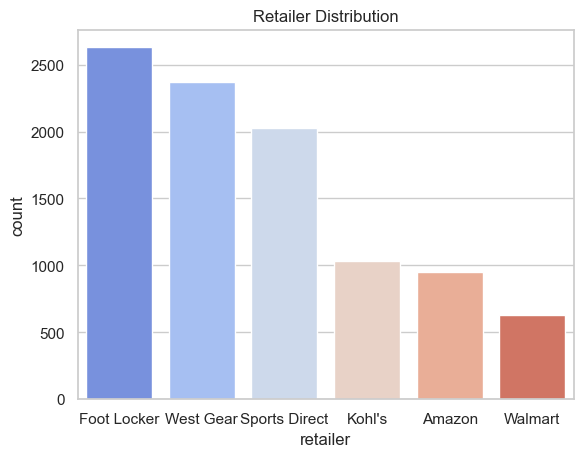

In [14]:
sns.countplot(data=df, x='retailer', order=df['retailer'].value_counts().index, palette='coolwarm').set_title('Retailer Distribution')
plt.show()

#### *Exploring `invoice_date` column:*

In [15]:
df['invoice_date'].nunique()

724

In [16]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'])          # Set datetime data type
df['invoice_date']

0      2021-11-06
1      2020-03-14
2      2021-01-19
3      2021-06-17
4      2021-09-14
          ...    
9632   2021-11-18
9633   2021-10-22
9634   2021-10-22
9635   2021-04-10
9636   2021-10-05
Name: invoice_date, Length: 9637, dtype: datetime64[ns]

In [17]:
df['year'] = df['invoice_date'].dt.year          # Extract year
df['year']

0       2021
1       2020
2       2021
3       2021
4       2021
        ... 
9632    2021
9633    2021
9634    2021
9635    2021
9636    2021
Name: year, Length: 9637, dtype: int32

In [18]:
df['month'] = df['invoice_date'].dt.month          # Extract month
df['month']

0       11
1        3
2        1
3        6
4        9
        ..
9632    11
9633    10
9634    10
9635     4
9636    10
Name: month, Length: 9637, dtype: int32

In [19]:
df['month_name'] = pd.to_datetime(df['month'], format='%m').dt.month_name().str[:3]          # Set month name
df['month_name']

0       Nov
1       Mar
2       Jan
3       Jun
4       Sep
       ... 
9632    Nov
9633    Oct
9634    Oct
9635    Apr
9636    Oct
Name: month_name, Length: 9637, dtype: object

In [20]:
df['day'] = df['invoice_date'].dt.day          # Extract day
df['day']

0        6
1       14
2       19
3       17
4       14
        ..
9632    18
9633    22
9634    22
9635    10
9636     5
Name: day, Length: 9637, dtype: int32

In [21]:
def set_season(month):          # Assign US seasons as per month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

df['season'] = df['month'].apply(set_season)
df['season']

0       Autumn
1       Spring
2       Winter
3       Summer
4       Autumn
         ...  
9632    Autumn
9633    Autumn
9634    Autumn
9635    Spring
9636    Autumn
Name: season, Length: 9637, dtype: object

In [22]:
df['season'] = df['season'].astype('category')          # Set season as category column

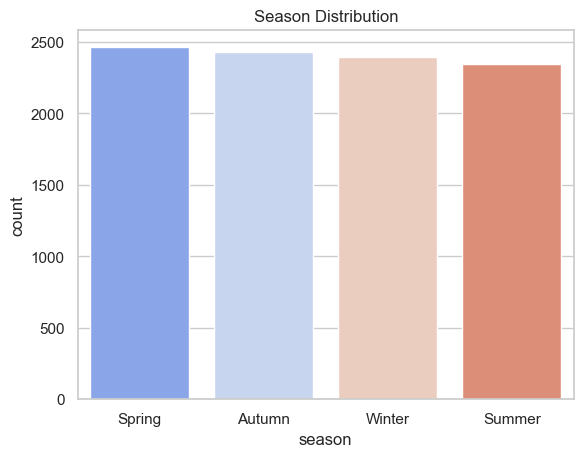

In [23]:
sns.countplot(data=df, x='season', order=df['season'].value_counts().index, palette='coolwarm').set_title('Season Distribution')
plt.show()

#### *Exploring `region` column:*

In [24]:
df['region'].unique()

array(['Southeast', 'Northeast', 'West', 'South', 'Midwest'], dtype=object)

In [25]:
df['region'].nunique()

5

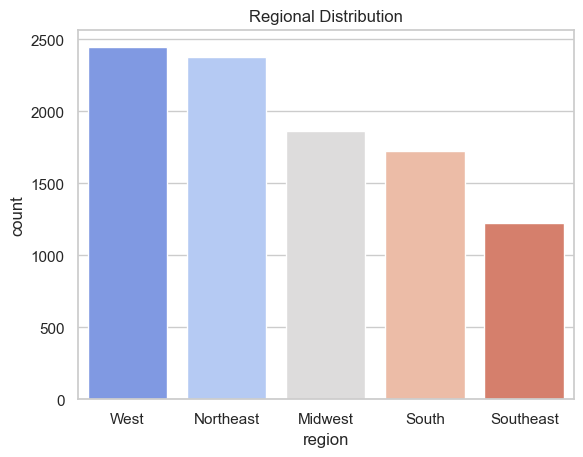

In [26]:
sns.countplot(data=df, x='region', order=df['region'].value_counts().index, palette='coolwarm').set_title('Regional Distribution')
plt.show()

#### *Exploring `state` column:*

In [27]:
df['state'].unique()

array(['South Carolina', 'New York', 'California', 'Florida', 'Alabama',
       'Idaho', 'Texas', 'Louisiana', 'North Carolina', 'Missouri',
       'Mississippi', 'Wisconsin', 'Michigan', 'Utah', 'Arkansas',
       'Oklahoma', 'Kansas', 'South Dakota', 'North Dakota', 'Iowa',
       'Ohio', 'Indiana', 'West Virginia', 'Maryland', 'Delaware',
       'Washington', 'Tennessee', 'Georgia', 'Virginia', 'New Jersey',
       'Oregon', 'Wyoming', 'New Mexico', 'Nevada', 'Minnesota',
       'Kentucky', 'Connecticut', 'Rhode Island', 'Massachusetts',
       'Illinois', 'Nebraska', 'Maine', 'Vermont', 'Arizona', 'Hawaii',
       'New Hampshire', 'Colorado', 'Pennsylvania', 'Montana', 'Alaska'],
      dtype=object)

In [28]:
df['state'].nunique()

50

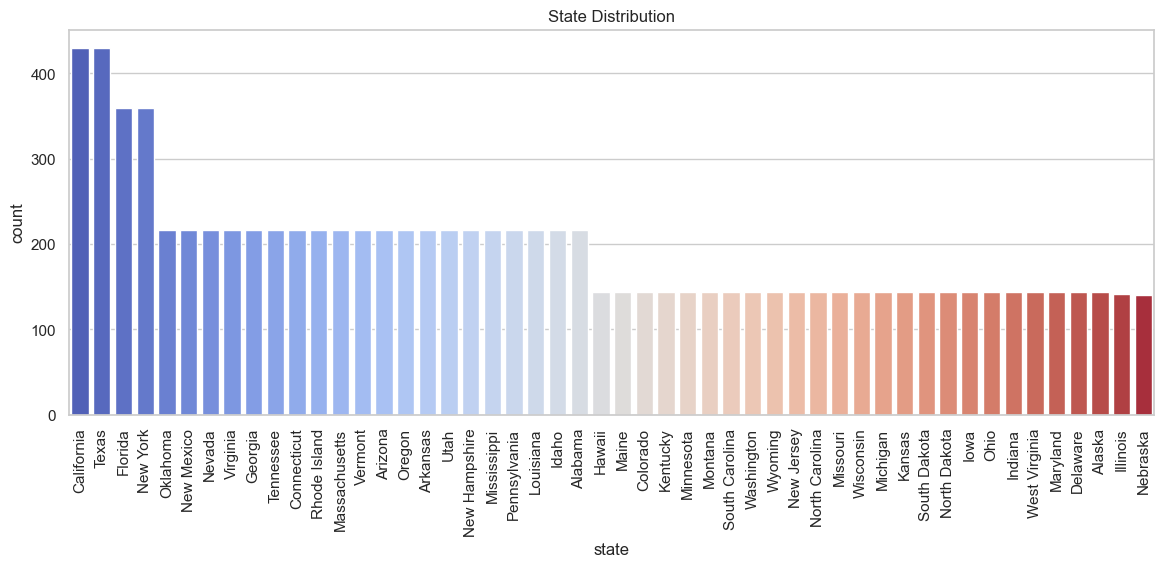

In [29]:
plt.figure(figsize=(14,5))
sns.countplot(data=df, x='state', order=df['state'].value_counts().index, palette='coolwarm').set_title('State Distribution')
plt.xticks(rotation = 90)
plt.show()

#### *Exploring `city` column:*

In [30]:
df['city'].unique()

array(['Charleston', 'New York', 'San Francisco', 'Orlando', 'Birmingham',
       'Boise', 'Houston', 'New Orleans', 'Charlotte', 'St. Louis',
       'Jackson', 'Milwaukee', 'Detroit', 'Salt Lake City', 'Little Rock',
       'Oklahoma City', 'Wichita', 'Sioux Falls', 'Fargo', 'Des Moines',
       'Columbus', 'Indianapolis', 'Baltimore', 'Wilmington',
       'Los Angeles', 'Dallas', 'Seattle', 'Knoxville', 'Atlanta',
       'Richmond', 'Miami', 'Albany', 'Newark', 'Portland', 'Cheyenne',
       'Albuquerque', 'Las Vegas', 'Minneapolis', 'Louisville',
       'Hartford', 'Providence', 'Boston', 'Chicago', 'Omaha',
       'Burlington', 'Phoenix', 'Honolulu', 'Manchester', 'Denver',
       'Philadelphia', 'Billings', 'Anchorage'], dtype=object)

In [31]:
df['city'].nunique()

52

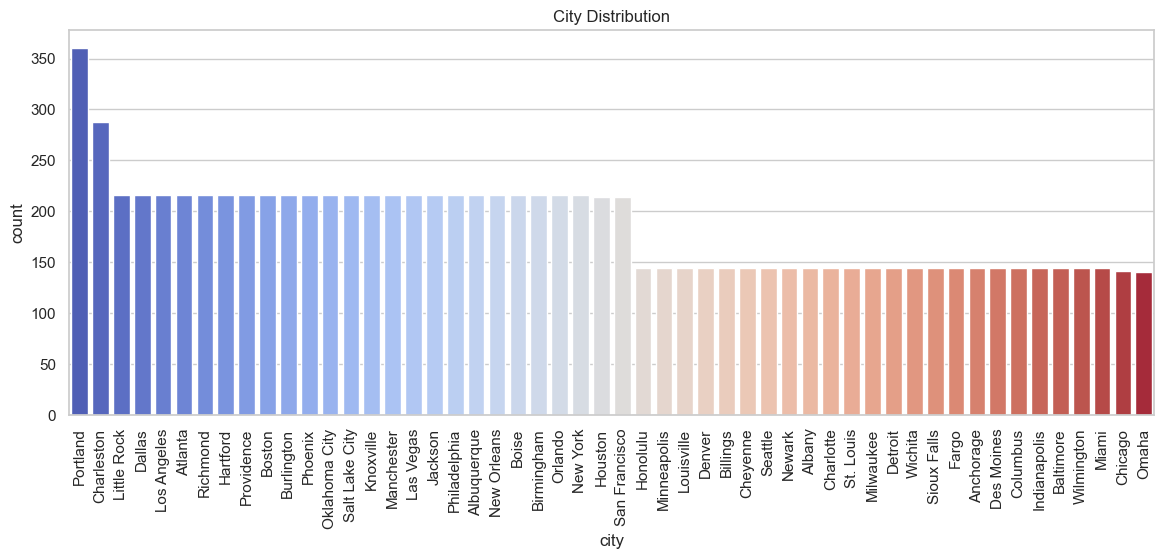

In [32]:
plt.figure(figsize=(14,5))
sns.countplot(data=df, x='city', order=df['city'].value_counts().index, palette='coolwarm').set_title('City Distribution')
plt.xticks(rotation = 90)
plt.show()

#### *Exploring `product` column:*

In [33]:
df['product'].unique()

array(["Men's Street Footwear", "Men's Apparel",
       "Men's Athletic Footwear", "Women's Apparel",
       "Women's Street Footwear", "Women's Athletic Footwear"],
      dtype=object)

In [34]:
df['product'].nunique()

6

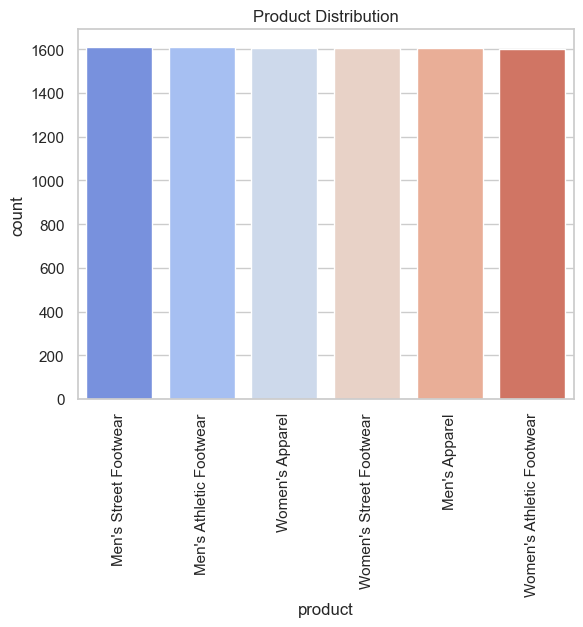

In [35]:
sns.countplot(data=df, x='product', order=df['product'].value_counts().index, palette='coolwarm').set_title('Product Distribution')
plt.xticks(rotation = 90)
plt.show()

#### *Exploring `price_per_unit` column:*

In [36]:
df['price_per_unit'].unique()

array([ 50,  46,  47, 103,  36,  34,  56,  37,  10,  28,  25,  15,  20,
        44,  30,  48,  39,  53,  62,  58,  51,  27,  31,  40,  33,  29,
        38,  55,  60,  67,  63,  41,  54,  43,  61,  86,  35,  23,  26,
        64,  32,  45,  24,  42,  66,  52,  59,  49,  74,  83,  69,  57,
        68,  22,  79,  80,  21,  73,  12,  76,  13,  77,  70,  72,  82,
        19,  65,  88,  14,  17,  71,  92,  18,   7,  81,  16,  87,  78,
        85,   9,  90,  89, 100,  11,  98,  75,  96,  95,  97, 101,  84,
         8, 110, 105], dtype=int64)

In [37]:
df['price_per_unit'].nunique()

94

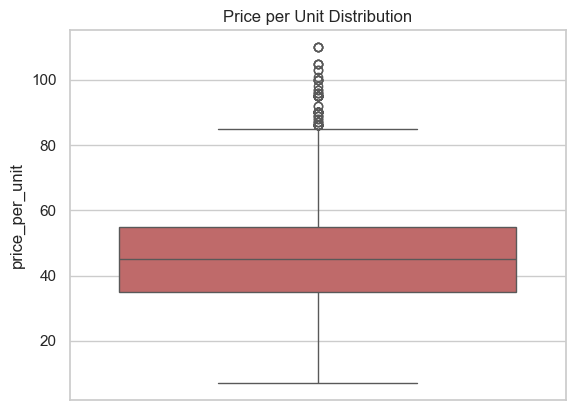

In [38]:
sns.boxplot(data=df, y='price_per_unit', color='indianred').set_title('Price per Unit Distribution')
plt.show()

#### *Exploring `units_sold` column:*

In [39]:
df['units_sold'].nunique()

360

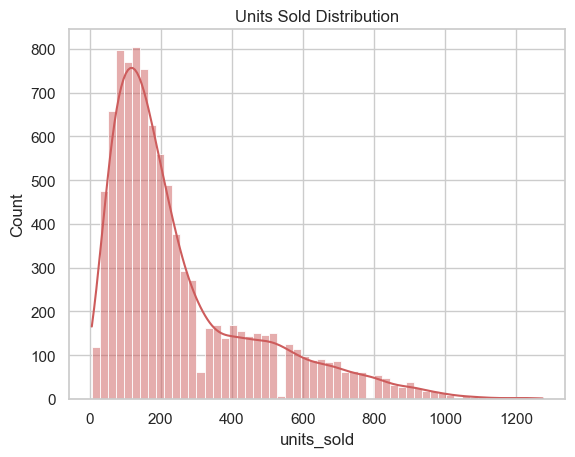

In [40]:
sns.histplot(df['units_sold'], kde=True, color='indianred').set_title('Units Sold Distribution')
plt.show()

#### *Exploring `total_sales` column:*

In [41]:
df['total_sales'].nunique()

3081

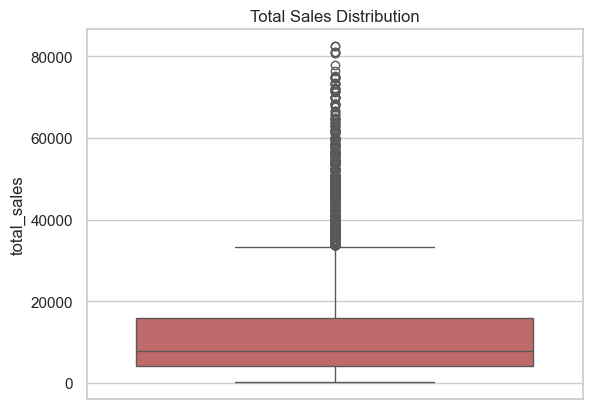

In [42]:
sns.boxplot(data=df, y='total_sales', color='indianred').set_title('Total Sales Distribution')
plt.show()

#### *Exploring `operating_profit` column:*

In [43]:
df['operating_profit'].nunique()

1529

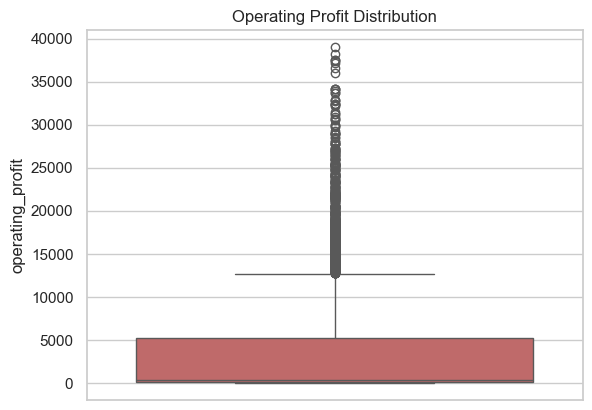

In [44]:
sns.boxplot(data=df, y='operating_profit', color='indianred').set_title('Operating Profit Distribution')
plt.show()

#### *Exploring `operating_profit_pct` column:*

In [45]:
df['operating_profit_pct'] = ((df['operating_profit'] / df['total_sales']) * 100).round(2)          # Created operating profit % column

In [46]:
df['operating_profit_pct'].nunique()

346

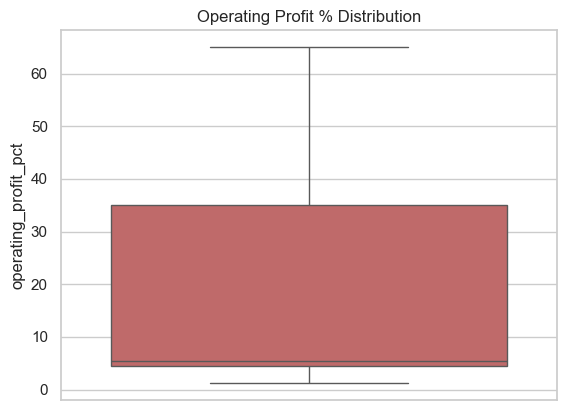

In [47]:
sns.boxplot(data=df, y='operating_profit_pct', color='indianred').set_title('Operating Profit % Distribution')
plt.show()

#### *Exploring `sales_method` column:*

In [48]:
df['sales_method'].unique()

array(['Online', 'Outlet', 'In-store'], dtype=object)

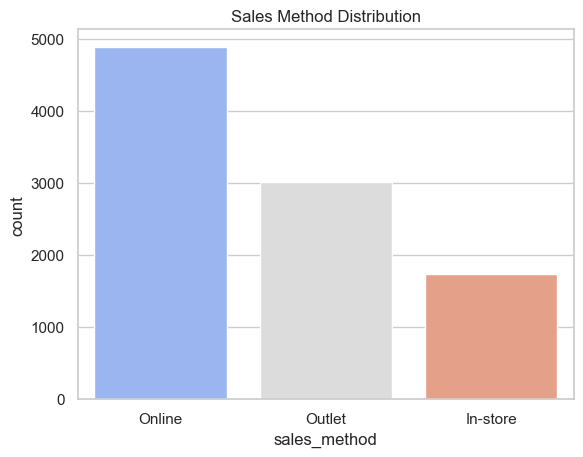

In [49]:
sns.countplot(data=df, x='sales_method', order=df['sales_method'].value_counts().index, palette='coolwarm').set_title('Sales Method Distribution')
plt.show()

---

### IV. Exploratory Data Analysis:

---

#### **A. KPIs Performance Breakdown:**

---

#### **1. Total Sales, Operating Profit & Units Sold by Retailer**

In [50]:
retailer_sales = df.groupby('retailer').sum('total_sales').sort_values('total_sales', ascending=False)
retailer_sales['total_sales_pct'] = ((retailer_sales['total_sales'] / retailer_sales['total_sales'].sum()) * 100).round(2)
retailer_sales['op_profit_pct'] = ((retailer_sales['operating_profit'] / retailer_sales['operating_profit'].sum()) * 100).round(2)
retailer_sales['units_sold_pct'] = ((retailer_sales['units_sold'] / retailer_sales['units_sold'].sum()) * 100).round(2)
retailer_sales[['total_sales', 'operating_profit', 'units_sold', 'total_sales_pct', 'op_profit_pct', 'units_sold_pct']]

total_sales  operating_profit  units_sold  total_sales_pct  \
retailer                                                                    
West Gear         32317808           8538806      624012            26.93   
Foot Locker       29004945           8065150      603919            24.17   
Sports Direct     24557997           7412864      556090            20.47   
Kohl's            13512453           3681153      287375            11.26   
Walmart           10506085           2578226      206225             8.76   
Amazon            10096987           2881885      197990             8.41   

               op_profit_pct  units_sold_pct  
retailer                                      
West Gear              25.75           25.21  
Foot Locker            24.32           24.39  
Sports Direct          22.36           22.46  
Kohl's                 11.10           11.61  
Walmart                 7.78            8.33  
Amazon                  8.69            8.00

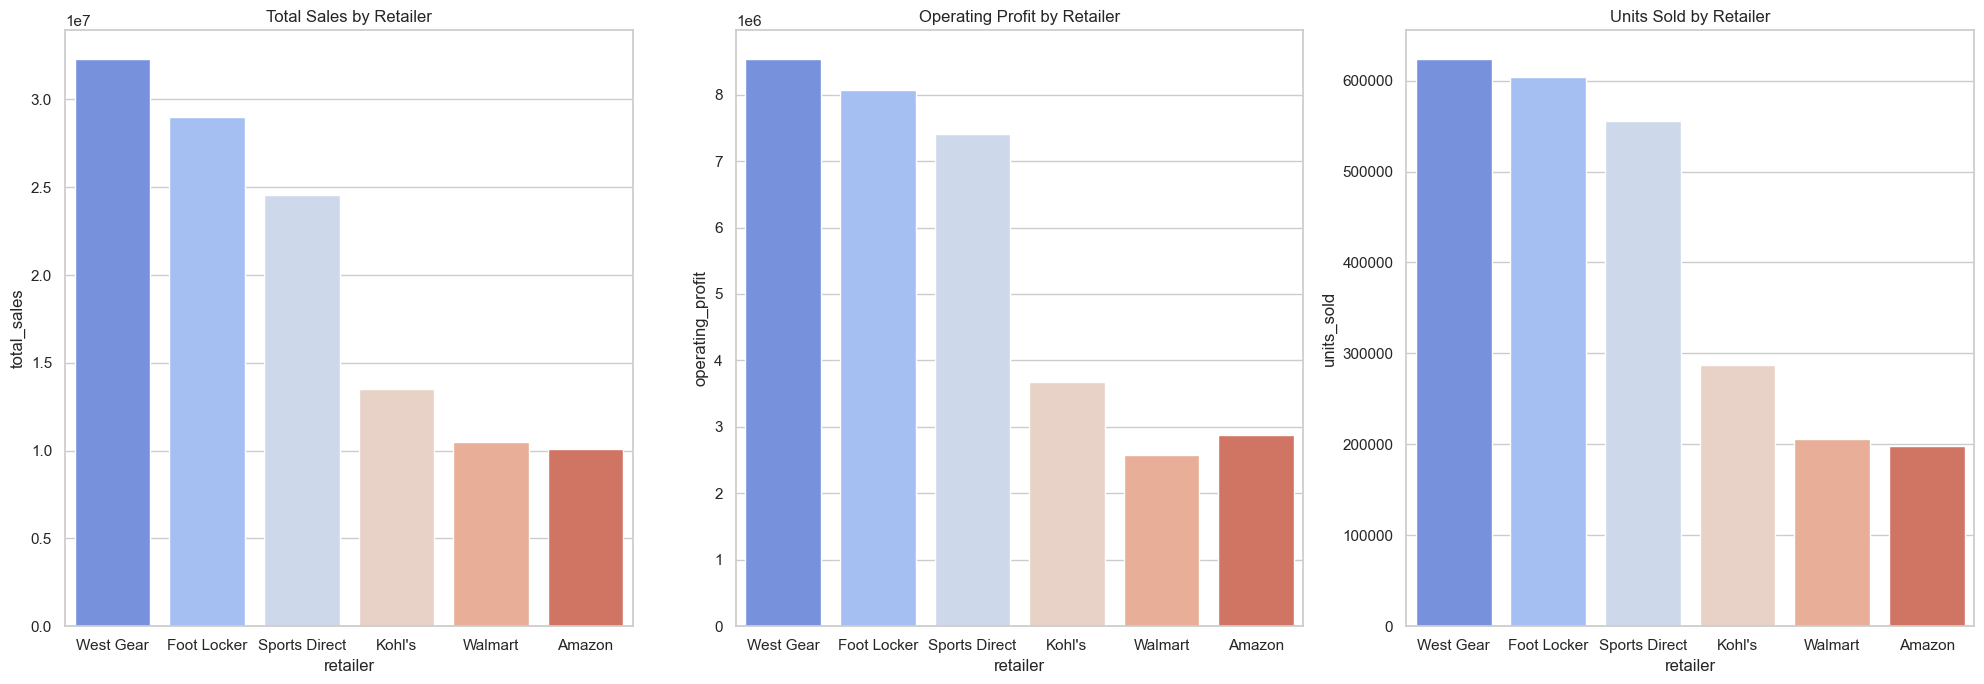

In [51]:
plt.figure(figsize=(20, 7))

plt.subplot(1,3,1)
bp1 = sns.barplot(data=retailer_sales, x='retailer', y='total_sales', palette='coolwarm')
bp1.set_title('Total Sales by Retailer')

plt.subplot(1,3,2)
bp2 = sns.barplot(data=retailer_sales, x='retailer', y='operating_profit', palette='coolwarm')
bp2.set_title('Operating Profit by Retailer')

plt.subplot(1,3,3)
bp3 = sns.barplot(data=retailer_sales, x='retailer', y='units_sold', palette='coolwarm')
bp3.set_title('Units Sold by Retailer')

plt.tight_layout()
plt.show()

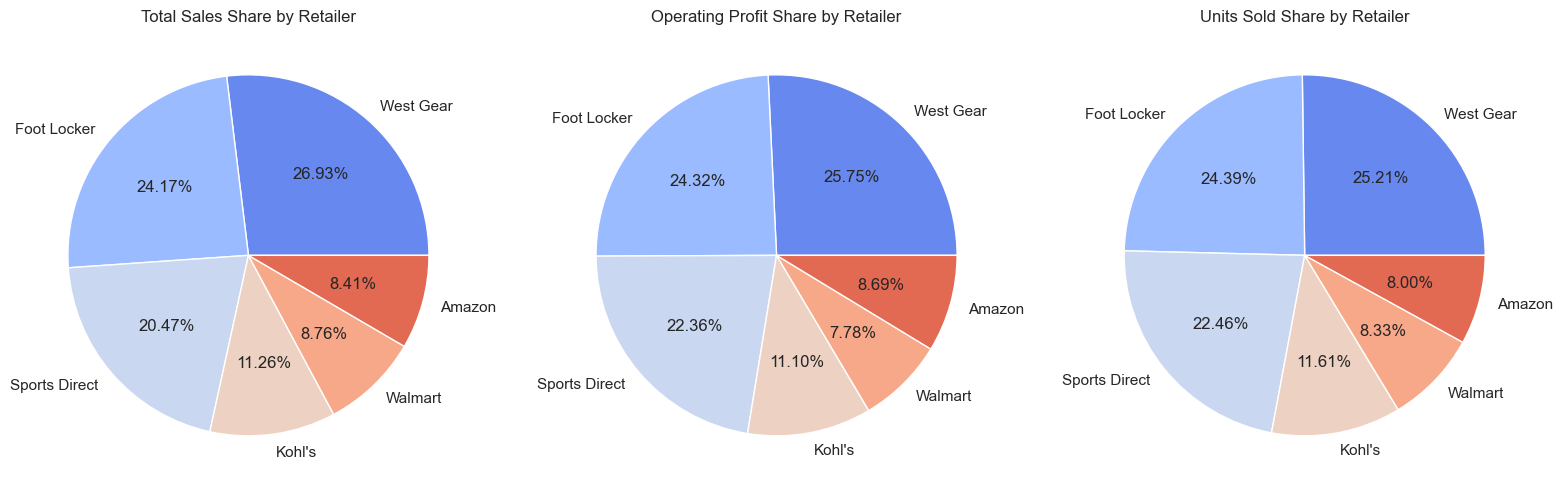

In [52]:
plt.figure(figsize=(16, 7))

plt.subplot(1,3,1)
plt.pie(data=retailer_sales, x='total_sales_pct', labels=retailer_sales.index, autopct='%.2f%%')
plt.title('Total Sales Share by Retailer')

plt.subplot(1,3,2)
plt.pie(data=retailer_sales, x='op_profit_pct', labels=retailer_sales.index, autopct='%.2f%%')
plt.title('Operating Profit Share by Retailer')

plt.subplot(1,3,3)
plt.pie(data=retailer_sales, x='units_sold_pct', labels=retailer_sales.index, autopct='%.2f%%')
plt.title('Units Sold Share by Retailer')

plt.tight_layout()
plt.show()

#### *Insight: West Gear, Foot locker & Sports Direct emerge as the Top Retailers, collectively accounting for 72% of Total Sales, Operating Profit and Units Sold.*

#### *Recommendation: Focus marketing efforts and partnership expansions with top-performing retailers like West Gear and Foot Locker to maintain sales momentum, while identifying ways to improve sales through under performing retailers like Amazon and Walmart.*

---

#### **2. Total Sales, Operating Profit & Units Sold by Region**

In [53]:
region_sales = df.groupby('region').sum('total_sales').sort_values('total_sales', ascending=False)
region_sales['total_sales_pct'] = ((region_sales['total_sales'] / region_sales['total_sales'].sum()) * 100).round(2)
region_sales['op_profit_pct'] = ((region_sales['operating_profit'] / region_sales['operating_profit'].sum()) * 100).round(2)
region_sales['units_sold_pct'] = ((region_sales['units_sold'] / region_sales['units_sold'].sum()) * 100).round(2)
region_sales[['total_sales', 'operating_profit', 'units_sold', 'total_sales_pct', 'op_profit_pct', 'units_sold_pct']]

total_sales  operating_profit  units_sold  total_sales_pct  \
region                                                                  
West          36344407           8932969      685735            30.29   
Northeast     25078267           6802150      501279            20.90   
Southeast     21374436           6055601      407000            17.81   
South         20544731           6093344      490710            17.12   
Midwest       16654434           5274020      390887            13.88   

           op_profit_pct  units_sold_pct  
region                                    
West               26.94           27.70  
Northeast          20.51           20.25  
Southeast          18.26           16.44  
South              18.38           19.82  
Midwest            15.91           15.79

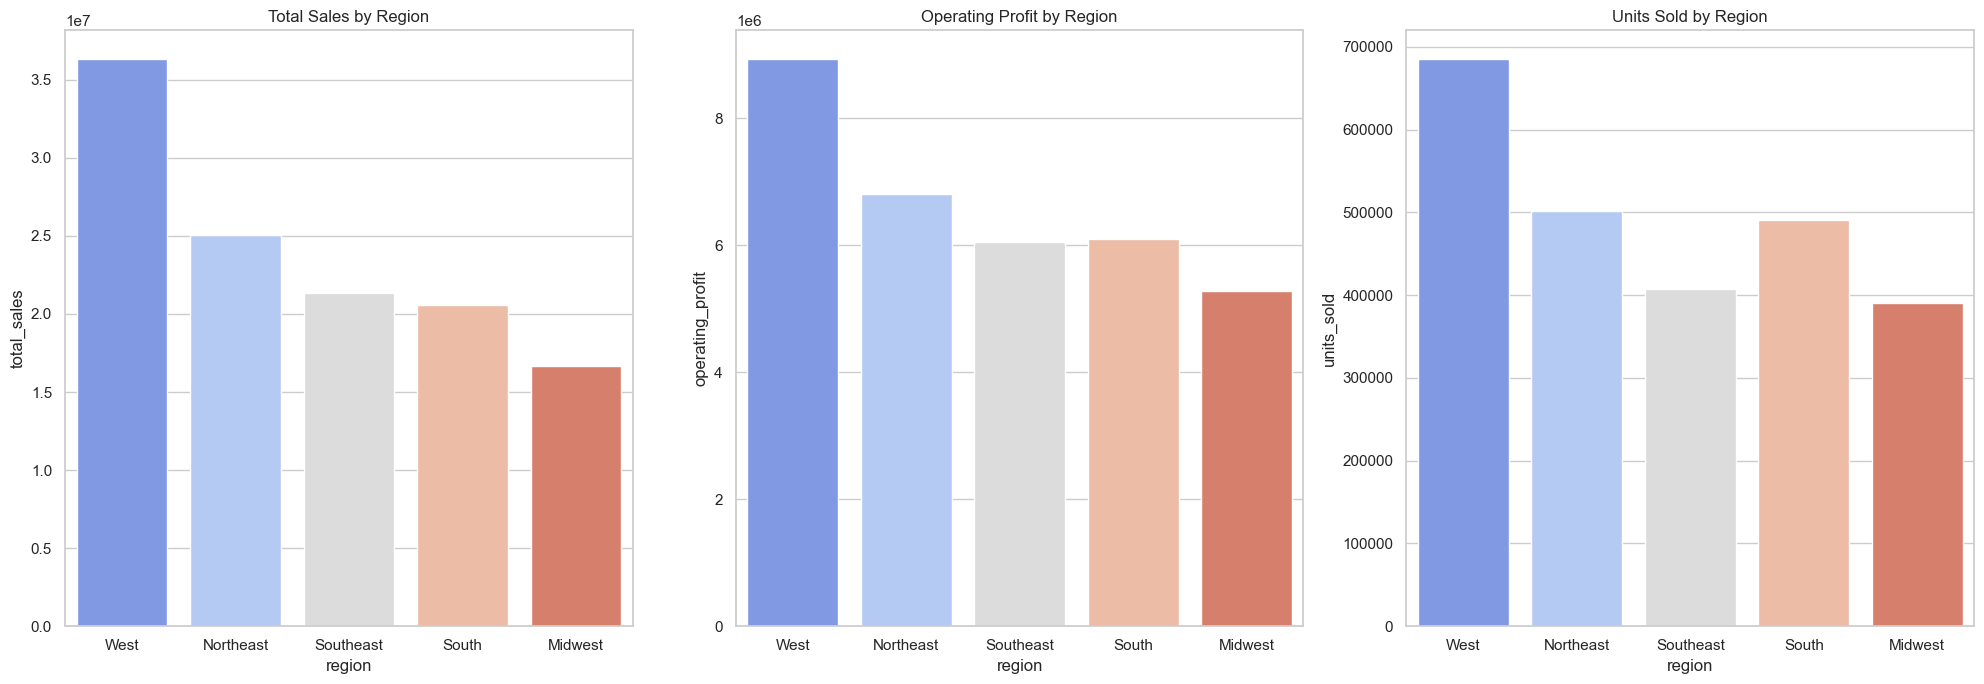

In [54]:
plt.figure(figsize=(20, 7))

plt.subplot(1,3,1)
bp1 = sns.barplot(data=region_sales, x='region', y='total_sales', palette='coolwarm')
bp1.set_title('Total Sales by Region')

plt.subplot(1,3,2)
bp2 = sns.barplot(data=region_sales, x='region', y='operating_profit', palette='coolwarm')
bp2.set_title('Operating Profit by Region')

plt.subplot(1,3,3)
bp3 = sns.barplot(data=region_sales, x='region', y='units_sold', palette='coolwarm')
bp3.set_title('Units Sold by Region')

plt.tight_layout()
plt.show()

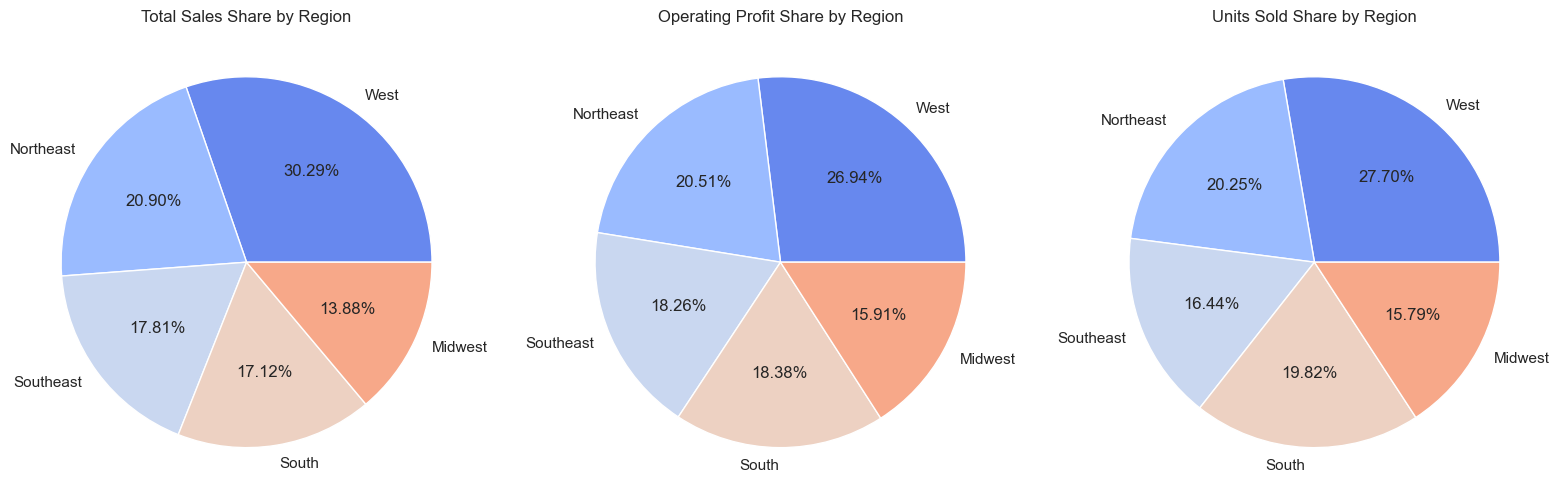

In [55]:
plt.figure(figsize=(16, 7))

plt.subplot(1,3,1)
plt.pie(data=region_sales, x='total_sales_pct', labels=region_sales.index, autopct='%.2f%%')
plt.title('Total Sales Share by Region')

plt.subplot(1,3,2)
plt.pie(data=region_sales, x='op_profit_pct', labels=region_sales.index, autopct='%.2f%%')
plt.title('Operating Profit Share by Region')

plt.subplot(1,3,3)
plt.pie(data=region_sales, x='units_sold_pct', labels=region_sales.index, autopct='%.2f%%')
plt.title('Units Sold Share by Region')

plt.tight_layout()
plt.show()

#### *Insight: West & Northeast emerge as the Top Regions, collectively accounting for 51% of Total Sales, 47% of Operating Profit and 48% of Units Sold.*

#### *Recommendation: Target marketing and distribution strategies in regions outside of West and Northeast to balance out sales distribution and explore operating profit growth in less saturated Midwest and South regions.*

---

#### **3. Total Sales, Operating Profit & Units Sold by Product**

In [56]:
product_sales = df.groupby('product').sum('total_sales').sort_values('total_sales', ascending=False)
product_sales['total_sales_pct'] = ((product_sales['total_sales'] / product_sales['total_sales'].sum()) * 100).round(2)
product_sales['op_profit_pct'] = ((product_sales['operating_profit'] / product_sales['operating_profit'].sum()) * 100).round(2)
product_sales['units_sold_pct'] = ((product_sales['units_sold'] / product_sales['units_sold'].sum()) * 100).round(2)
product_sales[['total_sales', 'operating_profit', 'units_sold', 'total_sales_pct', 'op_profit_pct', 'units_sold_pct']]

total_sales  operating_profit  units_sold  \
product                                                                
Men's Street Footwear         27680769           8280294      593320   
Women's Apparel               23814985           6856750      433127   
Men's Athletic Footwear       20532180           5168997      434451   
Women's Street Footwear       17171938           4499284      391444   
Men's Apparel                 16484882           4456719      306133   
Women's Athletic Footwear     14311521           3896040      317136   

                           total_sales_pct  op_profit_pct  units_sold_pct  
product                                                                    
Men's Street Footwear                23.07          24.97           23.97  
Women's Apparel                      19.85          20.68           17.50  
Men's Athletic Footwear              17.11          15.59           17.55  
Women's Street Footwear              14.31          13.57           15.81  
Men's Apparel                        13.74          13.44           12.37  
Women's Athletic Footwear            11.93          11.75           12.81

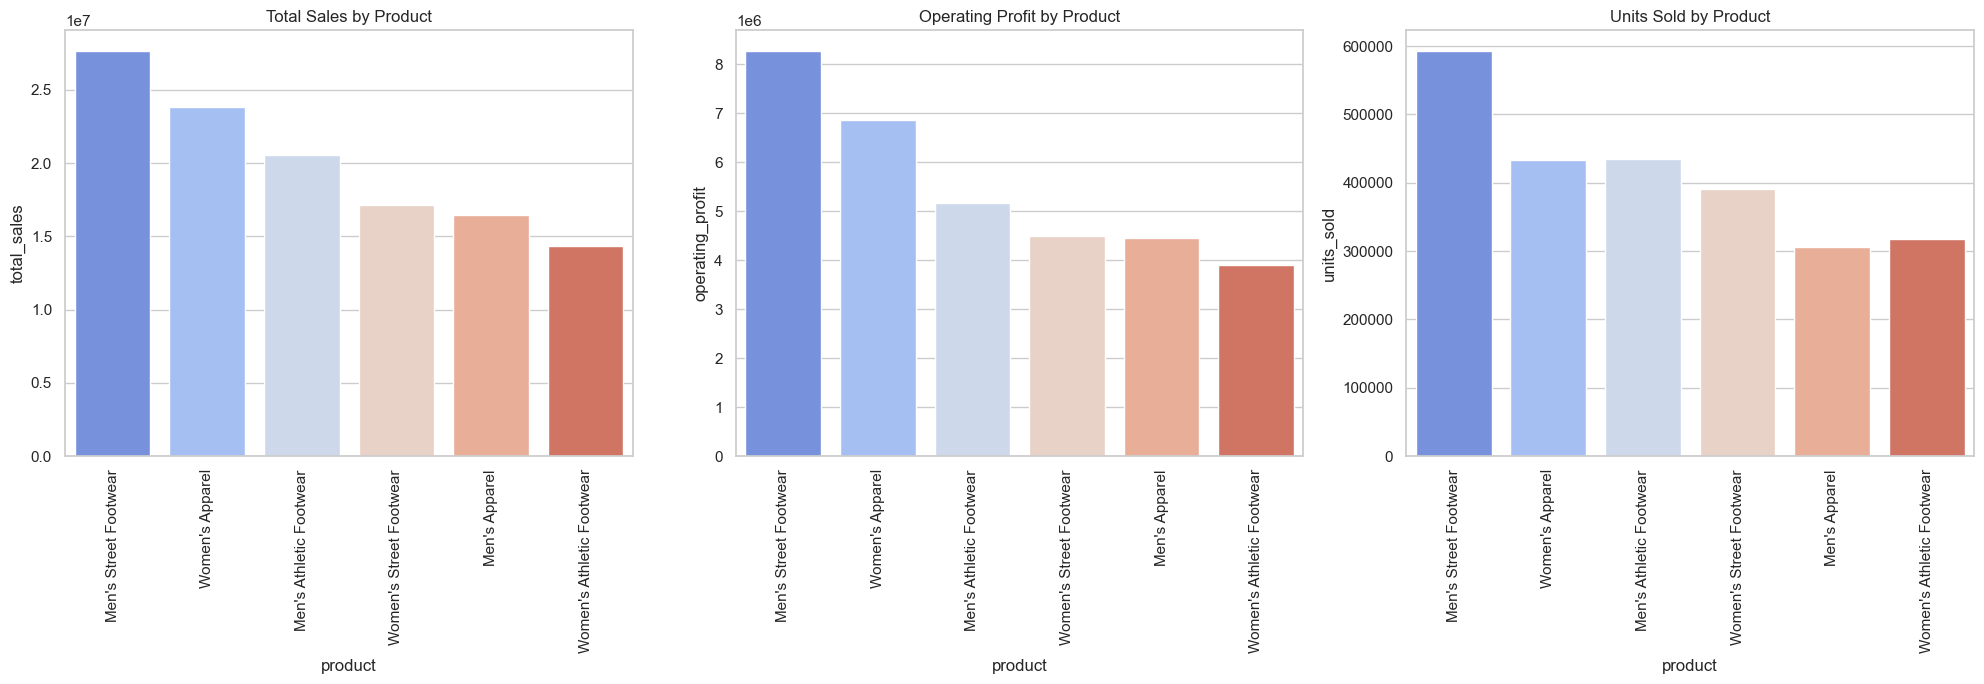

In [57]:
plt.figure(figsize=(20, 7))

plt.subplot(1,3,1)
bp1 = sns.barplot(data=product_sales, x='product', y='total_sales', palette='coolwarm')
bp1.set_title('Total Sales by Product')
plt.xticks(rotation=90)

plt.subplot(1,3,2)
bp2 = sns.barplot(data=product_sales, x='product', y='operating_profit', palette='coolwarm')
bp2.set_title('Operating Profit by Product')
plt.xticks(rotation=90)

plt.subplot(1,3,3)
bp3 = sns.barplot(data=product_sales, x='product', y='units_sold', palette='coolwarm')
bp3.set_title('Units Sold by Product')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

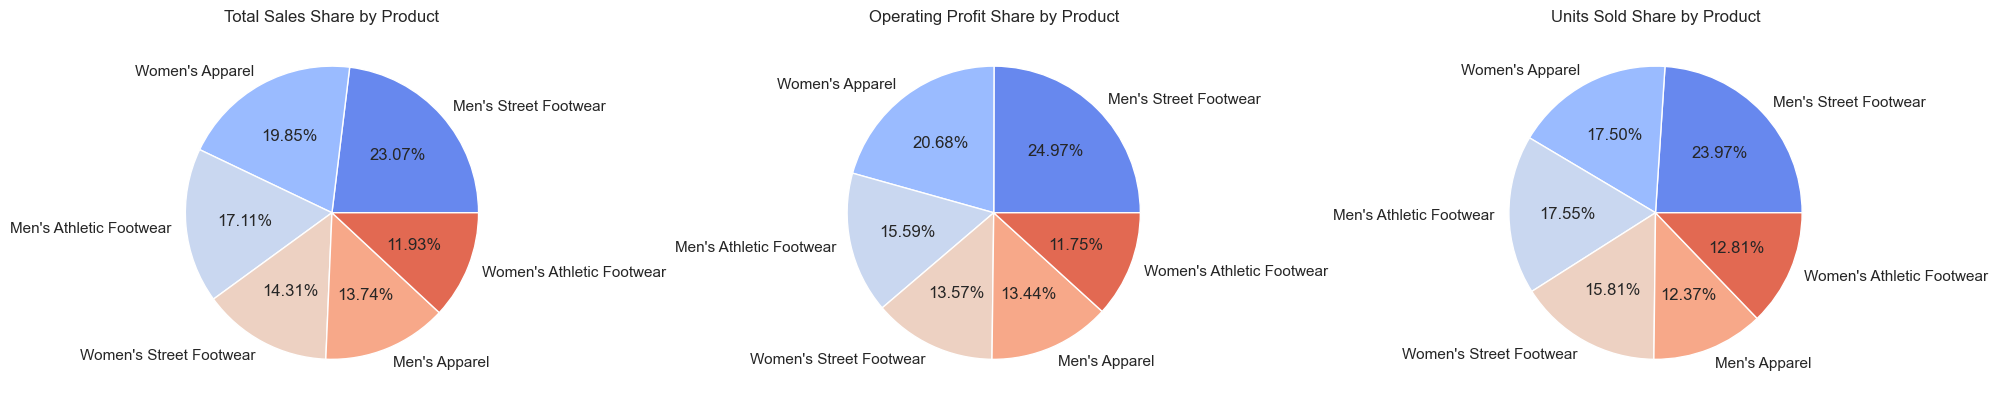

In [58]:
plt.figure(figsize=(20, 7))

plt.subplot(1,3,1)
plt.pie(data=product_sales, x='total_sales_pct', labels=product_sales.index, autopct='%.2f%%')
plt.title('Total Sales Share by Product')

plt.subplot(1,3,2)
plt.pie(data=product_sales, x='op_profit_pct', labels=product_sales.index, autopct='%.2f%%')
plt.title('Operating Profit Share by Product')

plt.subplot(1,3,3)
plt.pie(data=product_sales, x='units_sold_pct', labels=product_sales.index, autopct='%.2f%%')
plt.title('Units Sold Share by Product')

plt.tight_layout()
plt.show()

#### *Insight: Men's Street Footwear, Women's Apparel & Men's Athletic Footwear emerge as the Top Products, collectively accounting for 60% of Total Sales, 61% of Operating Profit and 59% of Units Sold.*

#### *Recommendation: Increase product offerings and seasonal promotions in high-demand categories to maximize sales, while considering opportunities for product diversification in Men’s Apparel and Women’s Athletic Footwear categories.*

---

#### **4. Total Sales, Operating Profit & Units Sold by Season**

In [59]:
season_sales = df.groupby('season').sum('total_sales').sort_values('total_sales', ascending=False)
season_sales['total_sales_pct'] = ((season_sales['total_sales'] / season_sales['total_sales'].sum()) * 100).round(2)
season_sales['op_profit_pct'] = ((season_sales['operating_profit'] / season_sales['operating_profit'].sum()) * 100).round(2)
season_sales['units_sold_pct'] = ((season_sales['units_sold'] / season_sales['units_sold'].sum()) * 100).round(2)
season_sales[['total_sales', 'operating_profit', 'units_sold', 'total_sales_pct', 'op_profit_pct', 'units_sold_pct']]

total_sales  operating_profit  units_sold  total_sales_pct  \
season                                                               
Summer     34568167           9494494      655435            28.81   
Winter     29332202           7784501      612132            24.44   
Spring     28128124           7794619      621991            23.44   
Autumn     27967782           8084470      586053            23.31   

        op_profit_pct  units_sold_pct  
season                                 
Summer          28.63           26.48  
Winter          23.48           24.73  
Spring          23.51           25.12  
Autumn          24.38           23.67

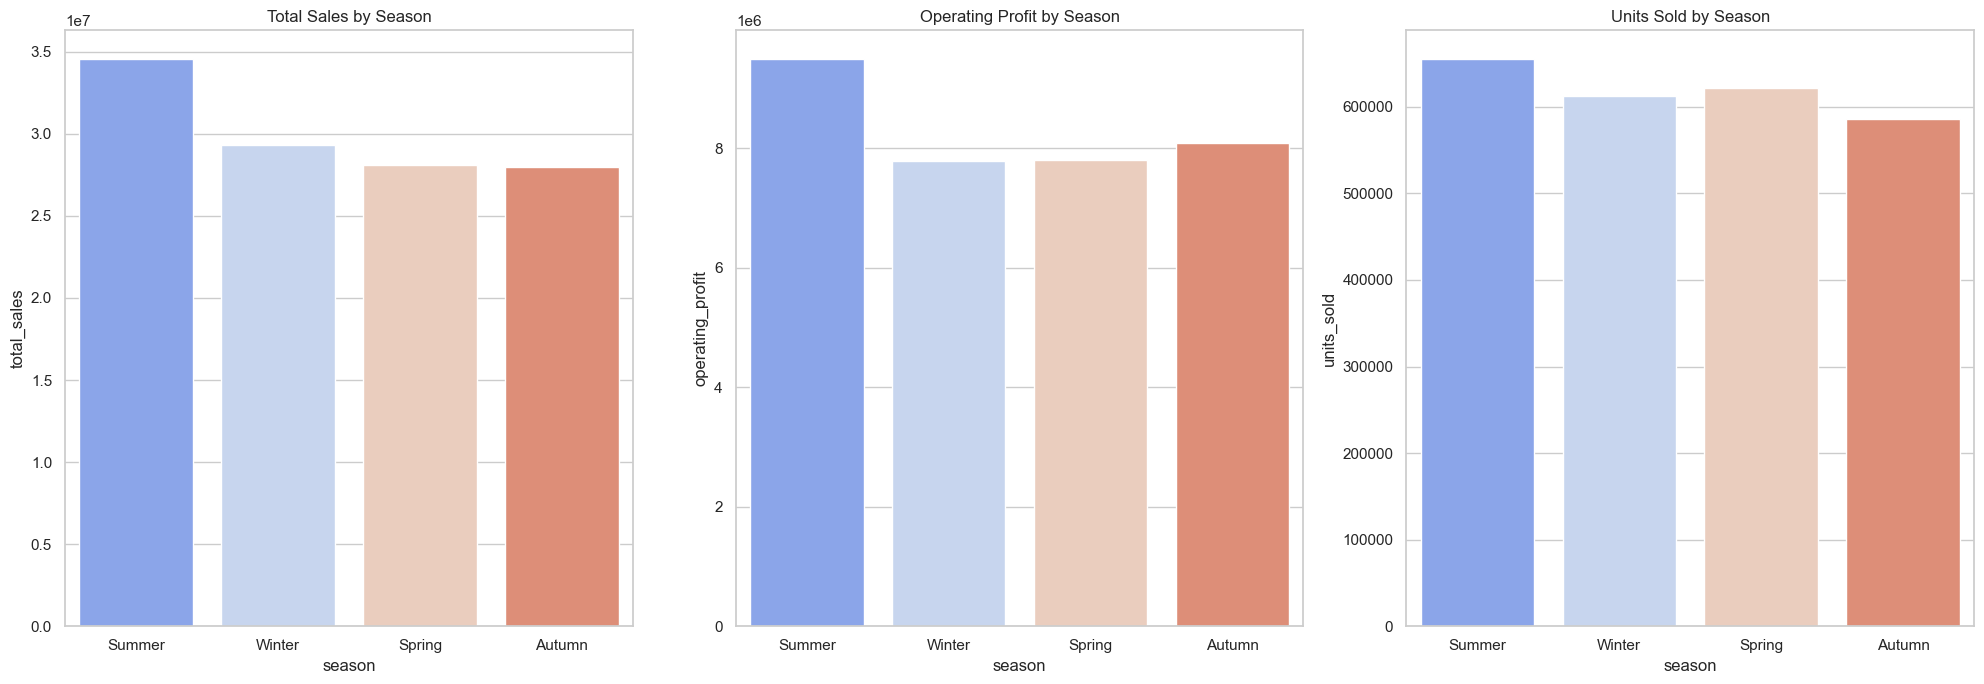

In [60]:
plt.figure(figsize=(20, 7))

plt.subplot(1,3,1)
bp1 = sns.barplot(data=season_sales, x='season', y='total_sales', order=season_sales.index, palette='coolwarm')
bp1.set_title('Total Sales by Season')

plt.subplot(1,3,2)
bp2 = sns.barplot(data=season_sales, x='season', y='operating_profit', order=season_sales.index, palette='coolwarm')
bp2.set_title('Operating Profit by Season')

plt.subplot(1,3,3)
bp3 = sns.barplot(data=season_sales, x='season', y='units_sold', order=season_sales.index, palette='coolwarm')
bp3.set_title('Units Sold by Season')

plt.tight_layout()
plt.show()

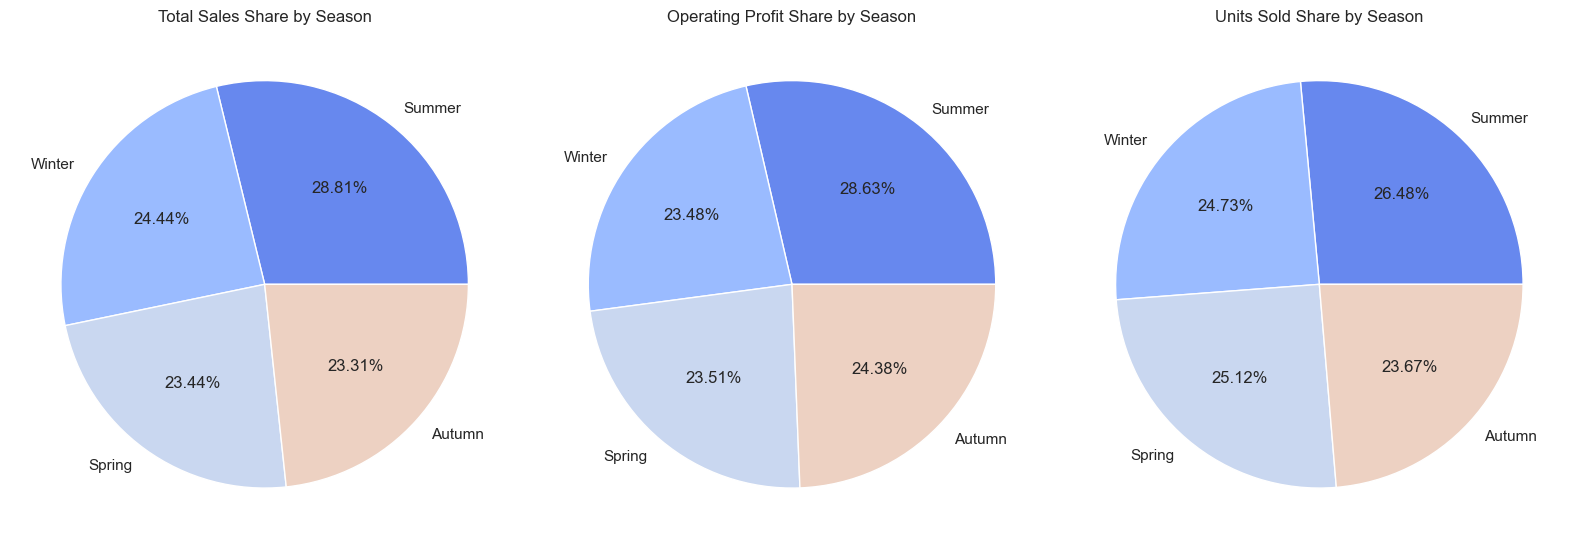

In [61]:
plt.figure(figsize=(16, 7))

plt.subplot(1,3,1)
plt.pie(data=season_sales, x='total_sales_pct', labels=season_sales.index, autopct='%.2f%%')
plt.title('Total Sales Share by Season')

plt.subplot(1,3,2)
plt.pie(data=season_sales, x='op_profit_pct', labels=season_sales.index, autopct='%.2f%%')
plt.title('Operating Profit Share by Season')

plt.subplot(1,3,3)
plt.pie(data=season_sales, x='units_sold_pct', labels=season_sales.index, autopct='%.2f%%')
plt.title('Units Sold Share by Season')

plt.tight_layout()
plt.show()

#### *Insight: Summer emerges as the Top Season, exclusively accounting for 29% of Total Sales, 29% of Operating Profit and 26% of Units Sold. Business surge in Summer can be attributed to Season break shopping.*

#### *Recommendation: Launch seasonal campaigns and discounts during summer, focusing on product lines with proven demand. Enhance year-round sales by analyzing other seasonal sales driving factors.*

---

#### **5. Total Sales, Operating Profit & Units Sold by Sales Method**

In [62]:
method_sales = df.groupby('sales_method').sum('total_sales').sort_values('total_sales', ascending=False)
method_sales['total_sales_pct'] = ((method_sales['total_sales'] / method_sales['total_sales'].sum()) * 100).round(2)
method_sales['op_profit_pct'] = ((method_sales['operating_profit'] / method_sales['operating_profit'].sum()) * 100).round(2)
method_sales['units_sold_pct'] = ((method_sales['units_sold'] / method_sales['units_sold'].sum()) * 100).round(2)
method_sales[['total_sales', 'operating_profit', 'units_sold', 'total_sales_pct', 'op_profit_pct', 'units_sold_pct']]

total_sales  operating_profit  units_sold  total_sales_pct  \
sales_method                                                               
Online           44965657           9655634      939093            37.47   
Outlet           39366243          10743176      846528            32.81   
In-store         35664375          12759274      689990            29.72   

              op_profit_pct  units_sold_pct  
sales_method                                 
Online                29.12           37.93  
Outlet                32.40           34.19  
In-store              38.48           27.87

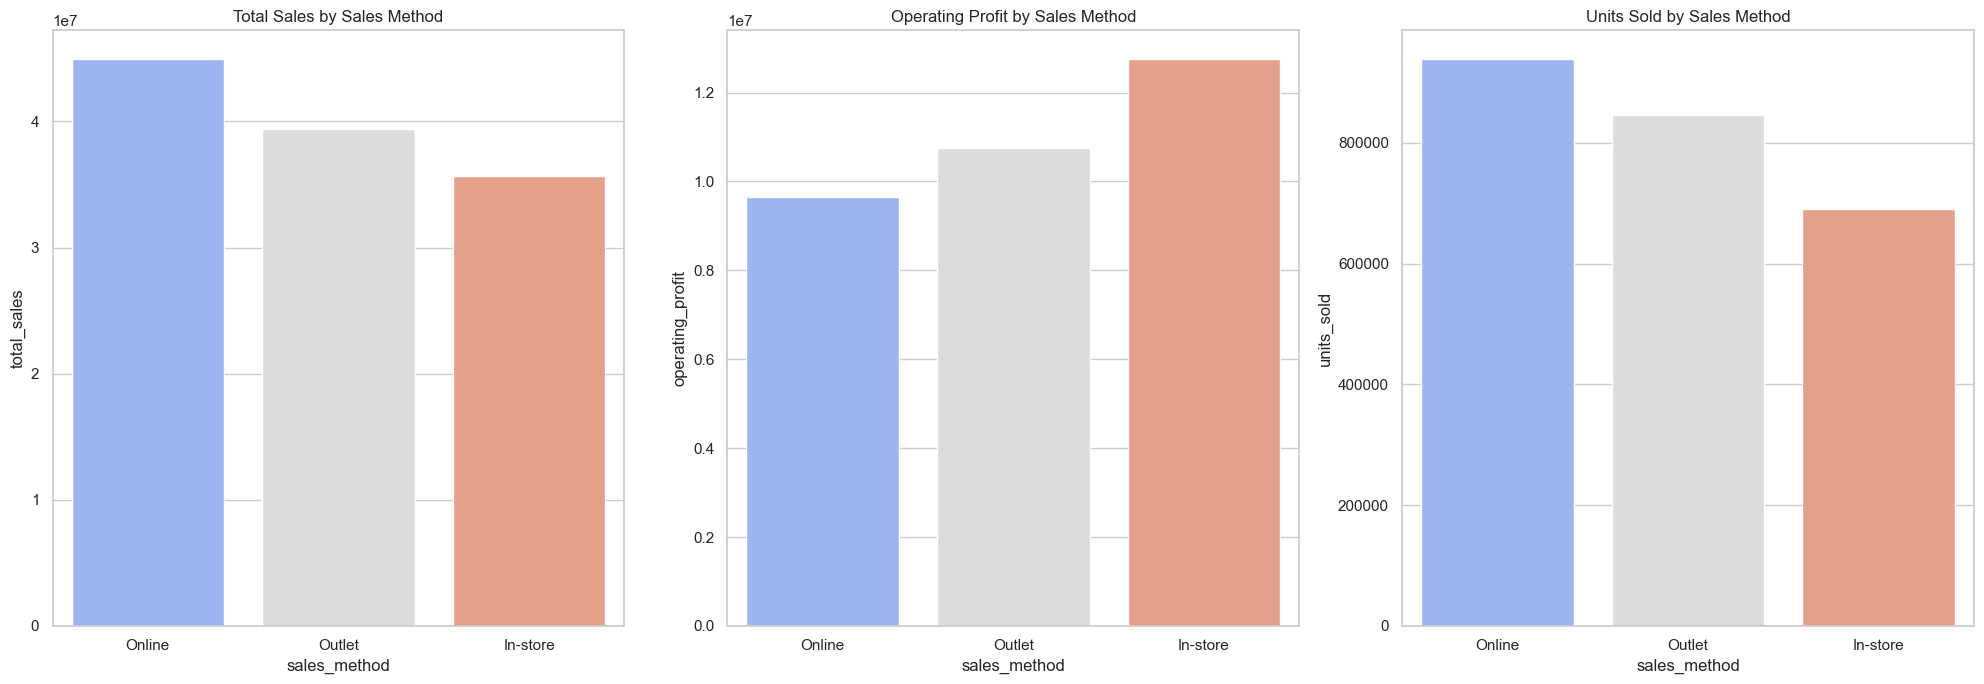

In [63]:
plt.figure(figsize=(20, 7))

plt.subplot(1,3,1)
bp1 = sns.barplot(data=method_sales, x='sales_method', y='total_sales', order=method_sales.index, palette='coolwarm')
bp1.set_title('Total Sales by Sales Method')

plt.subplot(1,3,2)
bp2 = sns.barplot(data=method_sales, x='sales_method', y='operating_profit', order=method_sales.index, palette='coolwarm')
bp2.set_title('Operating Profit by Sales Method')

plt.subplot(1,3,3)
bp3 = sns.barplot(data=method_sales, x='sales_method', y='units_sold', order=method_sales.index, palette='coolwarm')
bp3.set_title('Units Sold by Sales Method')

plt.tight_layout()
plt.show()

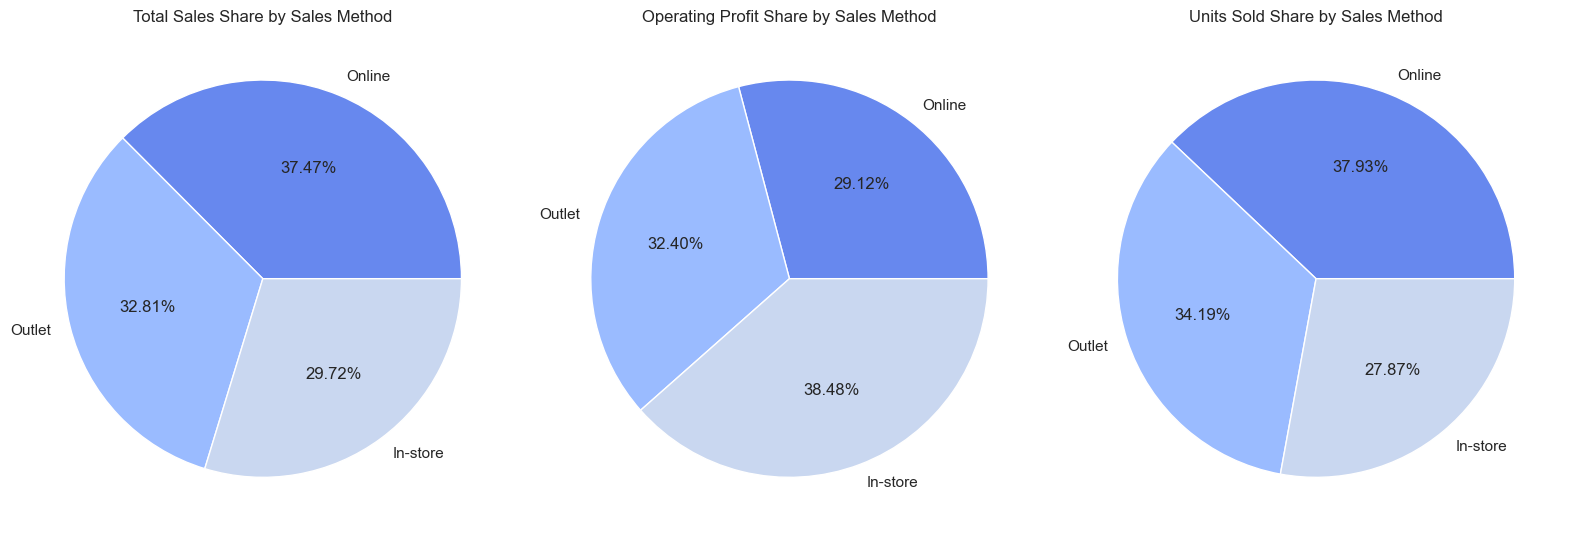

In [64]:
plt.figure(figsize=(16, 7))

plt.subplot(1,3,1)
plt.pie(data=method_sales, x='total_sales_pct', labels=method_sales.index, autopct='%.2f%%')
plt.title('Total Sales Share by Sales Method')

plt.subplot(1,3,2)
plt.pie(data=method_sales, x='op_profit_pct', labels=method_sales.index, autopct='%.2f%%')
plt.title('Operating Profit Share by Sales Method')

plt.subplot(1,3,3)
plt.pie(data=method_sales, x='units_sold_pct', labels=method_sales.index, autopct='%.2f%%')
plt.title('Units Sold Share by Sales Method')

plt.tight_layout()
plt.show()

#### *Insight: Online emerges as the Top Sales method, exclusively accounting for 37% & 38% by Total Sales & Units Sold respectively. While In-store exclusively accounting for 38%, emerges as the Top Sales method by Operating Profit.*

#### *Recommendation: Prioritize omnichannel strategies that enhance both Online sales platforms and Outlet experiences. Further invest in the Online segment to increase profitability and maintain margins.*

---

#### **B. Temporal Analysis:**

---

#### **6. Total Sales, Operating Profit & Units Sold - Monthly Trend**

In [65]:
monthly_stats = df.groupby(['year', 'month']).sum('total_sales').reset_index()
monthly_stats[['year', 'month', 'total_sales', 'operating_profit', 'units_sold']]

year  month  total_sales  operating_profit  units_sold
0   2020      1      2312746            583006       48333
1   2020      2      2140813            520734       37846
2   2020      3      2474202            586207       46972
3   2020      4      3193081            930137       54709
4   2020      5      2164764            587089       35705
5   2020      6      1084194            229274       16269
6   2020      7      2158763            483503       37544
7   2020      8      2606630            721653       61432
8   2020      9      2367686            711980       46125
9   2020     10      1428569            413953       30167
10  2020     11      1168050            278353       25152
11  2020     12      1023202            262828       19845
12  2021      1      7396271           1911547      178749
13  2021      2      6123040           1618560      156113
14  2021      3      5220782           1457799      143988
15  2021      4      6498339           1825811      161717
16  2021      5      8576956           2407576      178900
17  2021      6      8698953           2435020      164295
18  2021      7     10368031           2913754      180481
19  2021      8      9651596           2711290      195414
20  2021      9      8037898           2389027      182425
21  2021     10      7110189           2093927      152834
22  2021     11      7855390           2197230      149350
23  2021     12     10336130           2887826      171246

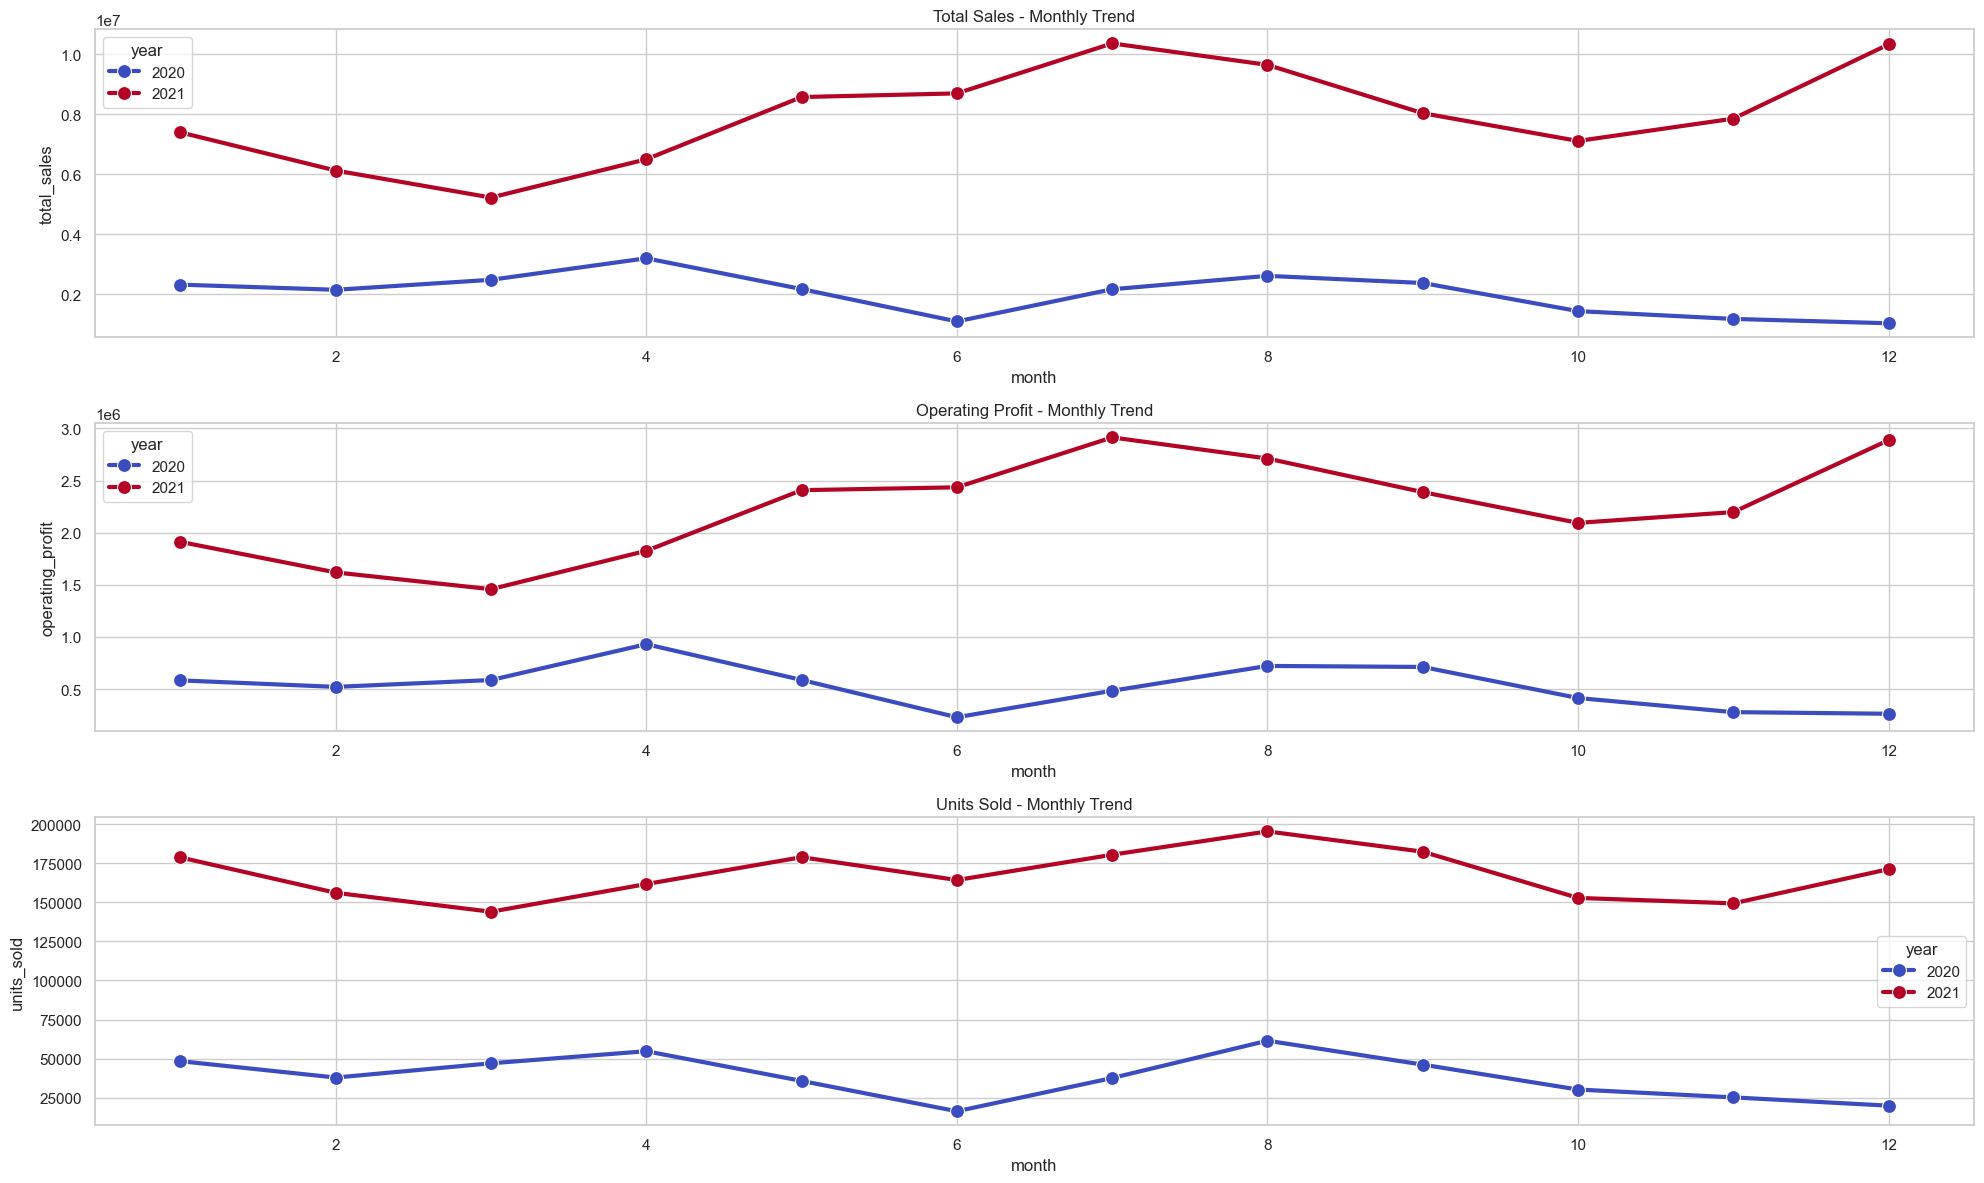

In [66]:
plt.figure(figsize = (20, 12))

plt.subplot(3,1,1)
lp1 = sns.lineplot(data=monthly_stats, x='month', y='total_sales', hue='year', lw=3, marker='o', markersize=10, palette='coolwarm')
lp1.set_title('Total Sales - Monthly Trend')

plt.subplot(3,1,2)
lp2 = sns.lineplot(data=monthly_stats, x='month', y='operating_profit', hue='year', lw=3, marker='o', markersize=10, palette='coolwarm')
lp2.set_title('Operating Profit - Monthly Trend')

plt.subplot(3,1,3)
lp3 = sns.lineplot(data=monthly_stats, x='month', y='units_sold', hue='year', lw=3, marker='o', markersize=10, palette='coolwarm')
lp3.set_title('Units Sold - Monthly Trend')

plt.tight_layout()
plt.show()

#### *Insight: Total Sales, Operating Profit & Units Sold in 2021 were roughly 4 times, 4.5 times & 4.3 times respectively higher on average than in 2020 possibly due to bounce back in consumption post Covid-19.*

#### *Recommendation: Analyze post-COVID purchasing trends to identify and predict consumer behavior changes, leveraging this momentum to strategize for sustained growth in 2022 and beyond.*

---

#### **7. Total Sales, Operating Profit & Units Sold by Retailer - Monthly Trend**

In [67]:
retailer_monthly_stats = df.groupby(['retailer', 'year', 'month']).sum('total_sales').reset_index()
retailer_monthly_stats[['retailer', 'year', 'month', 'total_sales', 'operating_profit', 'units_sold']]

retailer  year  month  total_sales  operating_profit  units_sold
0       Amazon  2021      1       517241            151050       13006
1       Amazon  2021      2       609131            171842       14609
2       Amazon  2021      3       542016            153861       13204
3       Amazon  2021      4       515112            147798       12548
4       Amazon  2021      5       826771            233797       15489
..         ...   ...    ...          ...               ...         ...
99   West Gear  2021      8      1807764            515198       32544
100  West Gear  2021      9       908885            264817       24313
101  West Gear  2021     10      1000883            292150       24314
102  West Gear  2021     11      1487144            425611       31207
103  West Gear  2021     12      2214083            623229       37075

[104 rows x 6 columns]

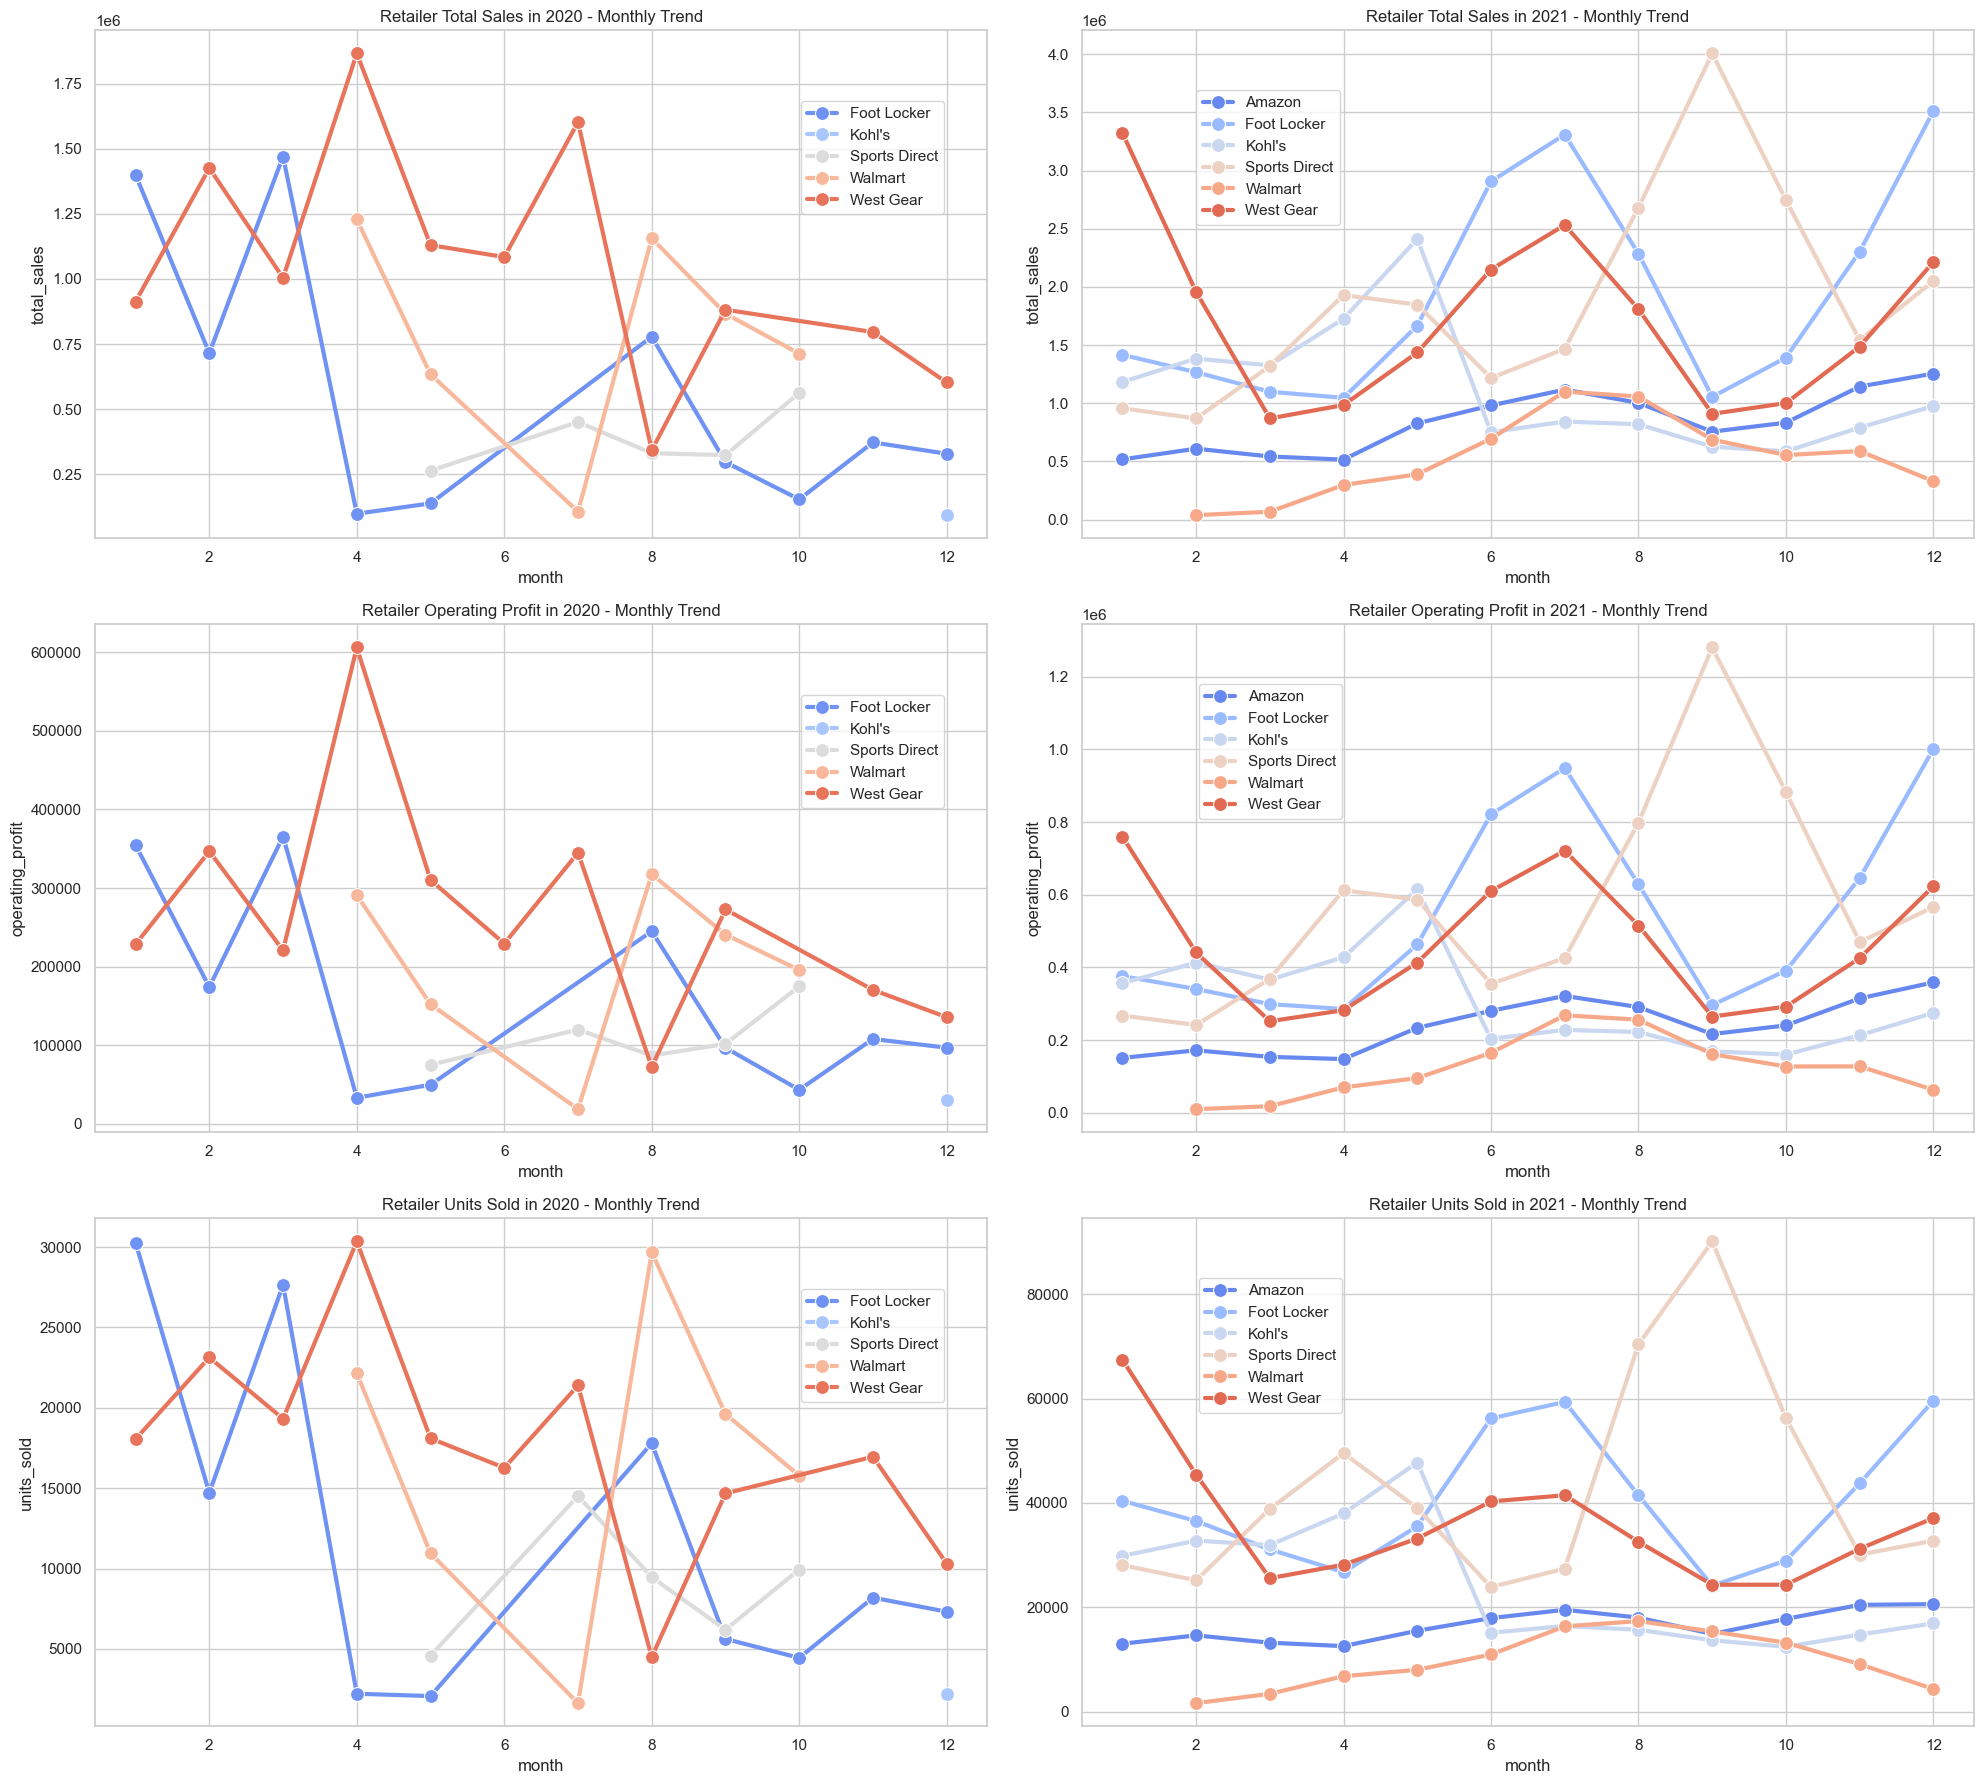

In [68]:
plt.figure(figsize = (20, 18))

plt.subplot(3, 2, 1)
lp1 = sns.lineplot(data=retailer_monthly_stats[retailer_monthly_stats.year == 2020], x='month', y='total_sales', hue='retailer', lw=3, marker='o', markersize=10, palette='coolwarm')
lp1.set_title('Retailer Total Sales in 2020 - Monthly Trend')
plt.legend(loc='center right', bbox_to_anchor=(0.96, 0.75))

plt.subplot(3, 2, 2)
lp2 = sns.lineplot(data=retailer_monthly_stats[retailer_monthly_stats.year == 2021], x='month', y='total_sales', hue='retailer', lw=3, marker='o', markersize=10, palette='coolwarm')
lp2.set_title('Retailer Total Sales in 2021 - Monthly Trend')
plt.legend(loc='center left', bbox_to_anchor=(0.12, 0.75))

plt.subplot(3, 2, 3)
lp3 = sns.lineplot(data=retailer_monthly_stats[retailer_monthly_stats.year == 2020], x='month', y='operating_profit', hue='retailer', lw=3, marker='o', markersize=10, palette='coolwarm')
lp3.set_title('Retailer Operating Profit in 2020 - Monthly Trend')
plt.legend(loc='center right', bbox_to_anchor=(0.96, 0.75))

plt.subplot(3, 2, 4)
lp4 = sns.lineplot(data=retailer_monthly_stats[retailer_monthly_stats.year == 2021], x='month', y='operating_profit', hue='retailer', lw=3, marker='o', markersize=10, palette='coolwarm')
lp4.set_title('Retailer Operating Profit in 2021 - Monthly Trend')
plt.legend(loc='center right', bbox_to_anchor=(0.3, 0.75))

plt.subplot(3, 2, 5)
lp5 = sns.lineplot(data=retailer_monthly_stats[retailer_monthly_stats.year == 2020], x='month', y='units_sold', hue='retailer', lw=3, marker='o', markersize=10, palette='coolwarm')
lp5.set_title('Retailer Units Sold in 2020 - Monthly Trend')
plt.legend(loc='center right', bbox_to_anchor=(0.96, 0.75))

plt.subplot(3, 2, 6)
lp6 = sns.lineplot(data=retailer_monthly_stats[retailer_monthly_stats.year == 2021], x='month', y='units_sold', hue='retailer', lw=3, marker='o', markersize=10, palette='coolwarm')
lp6.set_title('Retailer Units Sold in 2021 - Monthly Trend')
plt.legend(loc='center right', bbox_to_anchor=(0.3, 0.75))

plt.tight_layout()
plt.show()

#### *Insight: All the 3 metrics declined towards the end of 2020 but recovered back to base levels around mid-2021 after Covid-19 lockdown was lifted. While West Gear dominated overall in 2020, it's position was taken over by Foot Locker & Sports Direct in 2021.*

#### *Recommendation: Strengthen partnerships with Foot Locker and Sports Direct by offering exclusive promotions and products, while also revamping marketing strategies for West Gear to boost competitiveness.*

---

#### **8. Total Sales, Operating Profit & Units Sold by Product - Monthly Trend**

In [69]:
product_monthly_stats = df.groupby(['product', 'year', 'month']).sum('total_sales').reset_index()
product_monthly_stats[['product', 'year', 'month', 'total_sales', 'operating_profit', 'units_sold']]

product  year  month  total_sales  operating_profit  \
0              Men's Apparel  2020      1       326362             85723   
1              Men's Apparel  2020      2       326016             99404   
2              Men's Apparel  2020      3       308592             89115   
3              Men's Apparel  2020      4       502349            156560   
4              Men's Apparel  2020      5       391951            120919   
..                       ...   ...    ...          ...               ...   
139  Women's Street Footwear  2021      8      1429235            370790   
140  Women's Street Footwear  2021      9      1167039            327591   
141  Women's Street Footwear  2021     10       956076            263362   
142  Women's Street Footwear  2021     11       967469            251751   
143  Women's Street Footwear  2021     12      1408098            370000   

     units_sold  
0          5902  
1          5400  
2          5320  
3          8258  
4          6064  
..          ...  
139       31297  
140       29146  
141       21973  
142       22019  
143       25524  

[144 rows x 6 columns]

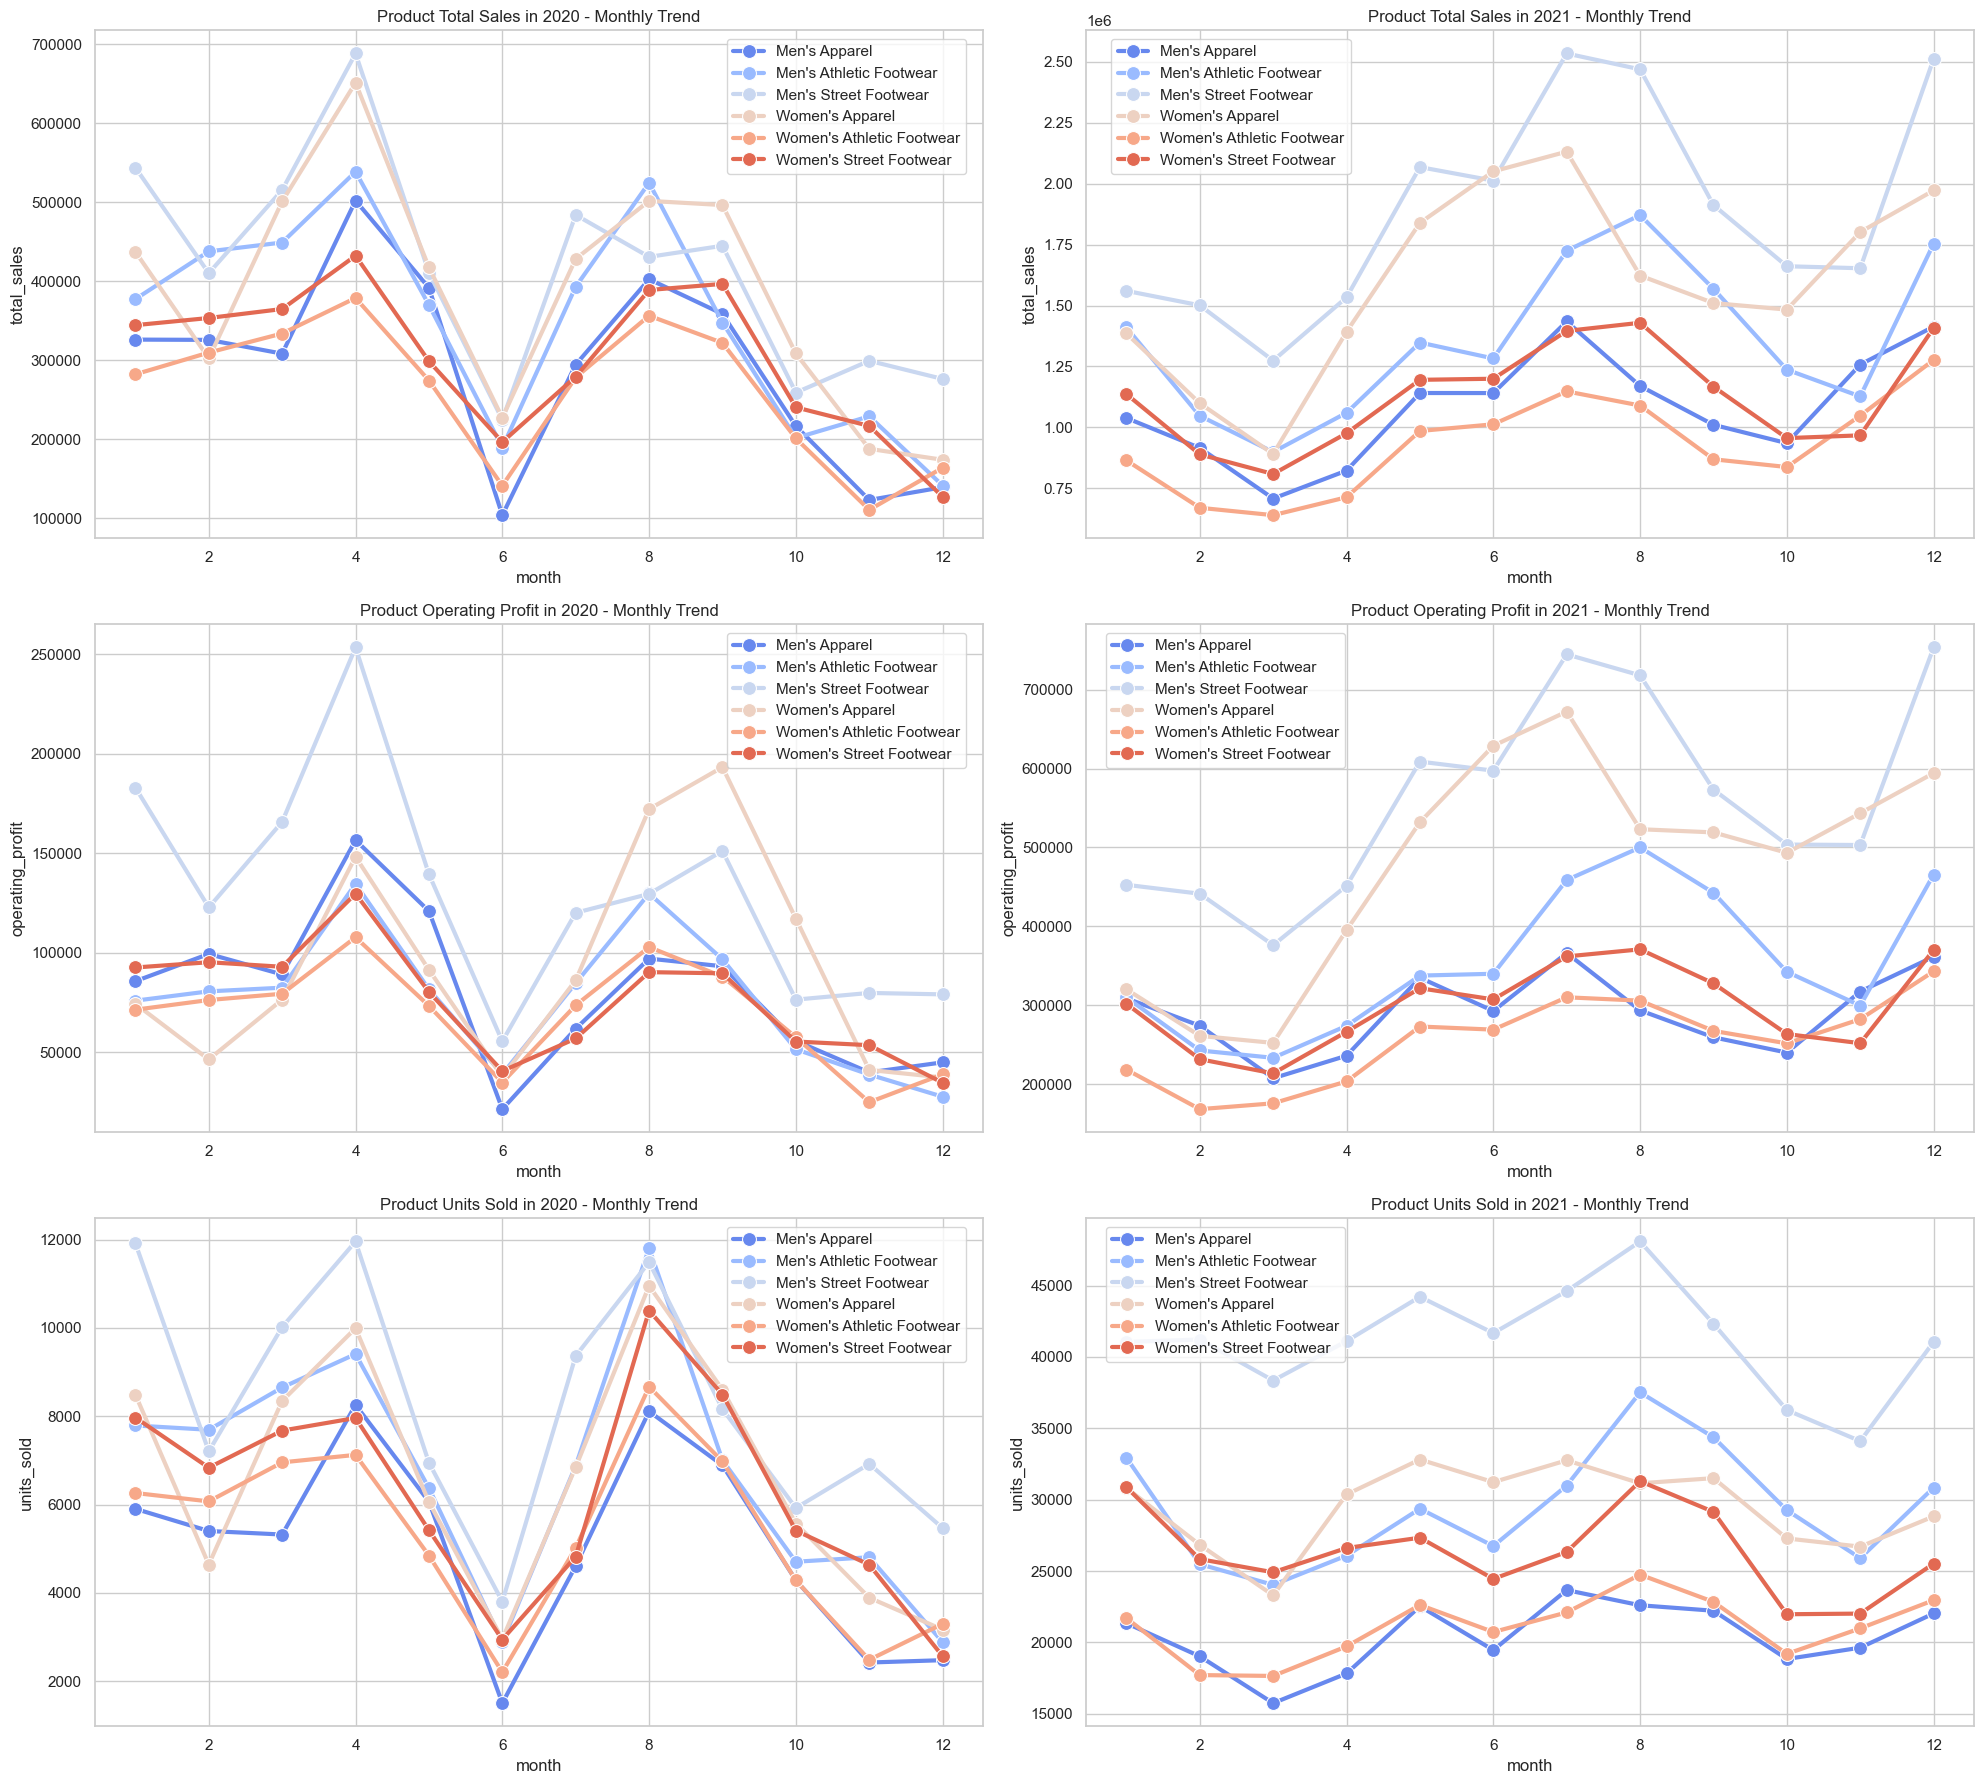

In [70]:
plt.figure(figsize = (20, 18))

plt.subplot(3, 2, 1)
lp1 = sns.lineplot(data=product_monthly_stats[product_monthly_stats.year == 2020], x='month', y='total_sales', hue='product', lw=3, marker='o', markersize=10, palette='coolwarm')
lp1.set_title('Product Total Sales in 2020 - Monthly Trend')
plt.legend(loc='center right', bbox_to_anchor=(0.99, 0.85))

plt.subplot(3, 2, 2)
lp2 = sns.lineplot(data=product_monthly_stats[product_monthly_stats.year == 2021], x='month', y='total_sales', hue='product', lw=3, marker='o', markersize=10, palette='coolwarm')
lp2.set_title('Product Total Sales in 2021 - Monthly Trend')
plt.legend(loc='center left', bbox_to_anchor=(0.02, 0.85))

plt.subplot(3, 2, 3)
lp3 = sns.lineplot(data=product_monthly_stats[product_monthly_stats.year == 2020], x='month', y='operating_profit', hue='product', lw=3, marker='o', markersize=10, palette='coolwarm')
lp3.set_title('Product Operating Profit in 2020 - Monthly Trend')
plt.legend(loc='center right', bbox_to_anchor=(0.99, 0.85))

plt.subplot(3, 2, 4)
lp4 = sns.lineplot(data=product_monthly_stats[product_monthly_stats.year == 2021], x='month', y='operating_profit', hue='product', lw=3, marker='o', markersize=10, palette='coolwarm')
lp4.set_title('Product Operating Profit in 2021 - Monthly Trend')
plt.legend(loc='center right', bbox_to_anchor=(0.3, 0.85))

plt.subplot(3, 2, 5)
lp5 = sns.lineplot(data=product_monthly_stats[product_monthly_stats.year == 2020], x='month', y='units_sold', hue='product', lw=3, marker='o', markersize=10, palette='coolwarm')
lp5.set_title('Product Units Sold in 2020 - Monthly Trend')
plt.legend(loc='center right', bbox_to_anchor=(0.99, 0.85))

plt.subplot(3, 2, 6)
lp6 = sns.lineplot(data=product_monthly_stats[product_monthly_stats.year == 2021], x='month', y='units_sold', hue='product', lw=3, marker='o', markersize=10, palette='coolwarm')
lp6.set_title('Product Units Sold in 2021 - Monthly Trend')
plt.legend(loc='center right', bbox_to_anchor=(0.3, 0.85))

plt.tight_layout()
plt.show()

#### *Insight: All the 3 metrics reached their lowest values in June 2020 and climbed back to their highest value in July - Aug 2021. Men's Street Footwear category dominates all metrics across both years.*

#### *Recommendation: Use Predictive analysis to prepare for future seasonal demand spikes, particularly for Men’s Street Footwear, ensuring sufficient inventory and targeted promotions during peak periods.*

---

#### **9. Total Sales, Operating Profit & Units Sold by Region - Monthly Trend**

In [71]:
regional_monthly_stats = df.groupby(['region', 'year', 'month']).sum('total_sales').reset_index()
regional_monthly_stats[['region', 'year', 'month', 'total_sales', 'operating_profit', 'units_sold']]

region  year  month  total_sales  operating_profit  units_sold
0   Midwest  2020     10       110889             31896        3111
1   Midwest  2020     11       372083            107931        8193
2   Midwest  2020     12       420946            127205        9534
3   Midwest  2021      1      1365837            432704       37230
4   Midwest  2021      2      1514938            480000       39136
..      ...   ...    ...          ...               ...         ...
84     West  2021      8      2150828            546662       38552
85     West  2021      9      1523052            390818       31686
86     West  2021     10      1327709            343199       28350
87     West  2021     11      1746712            448773       33613
88     West  2021     12      2118459            545656       36976

[89 rows x 6 columns]

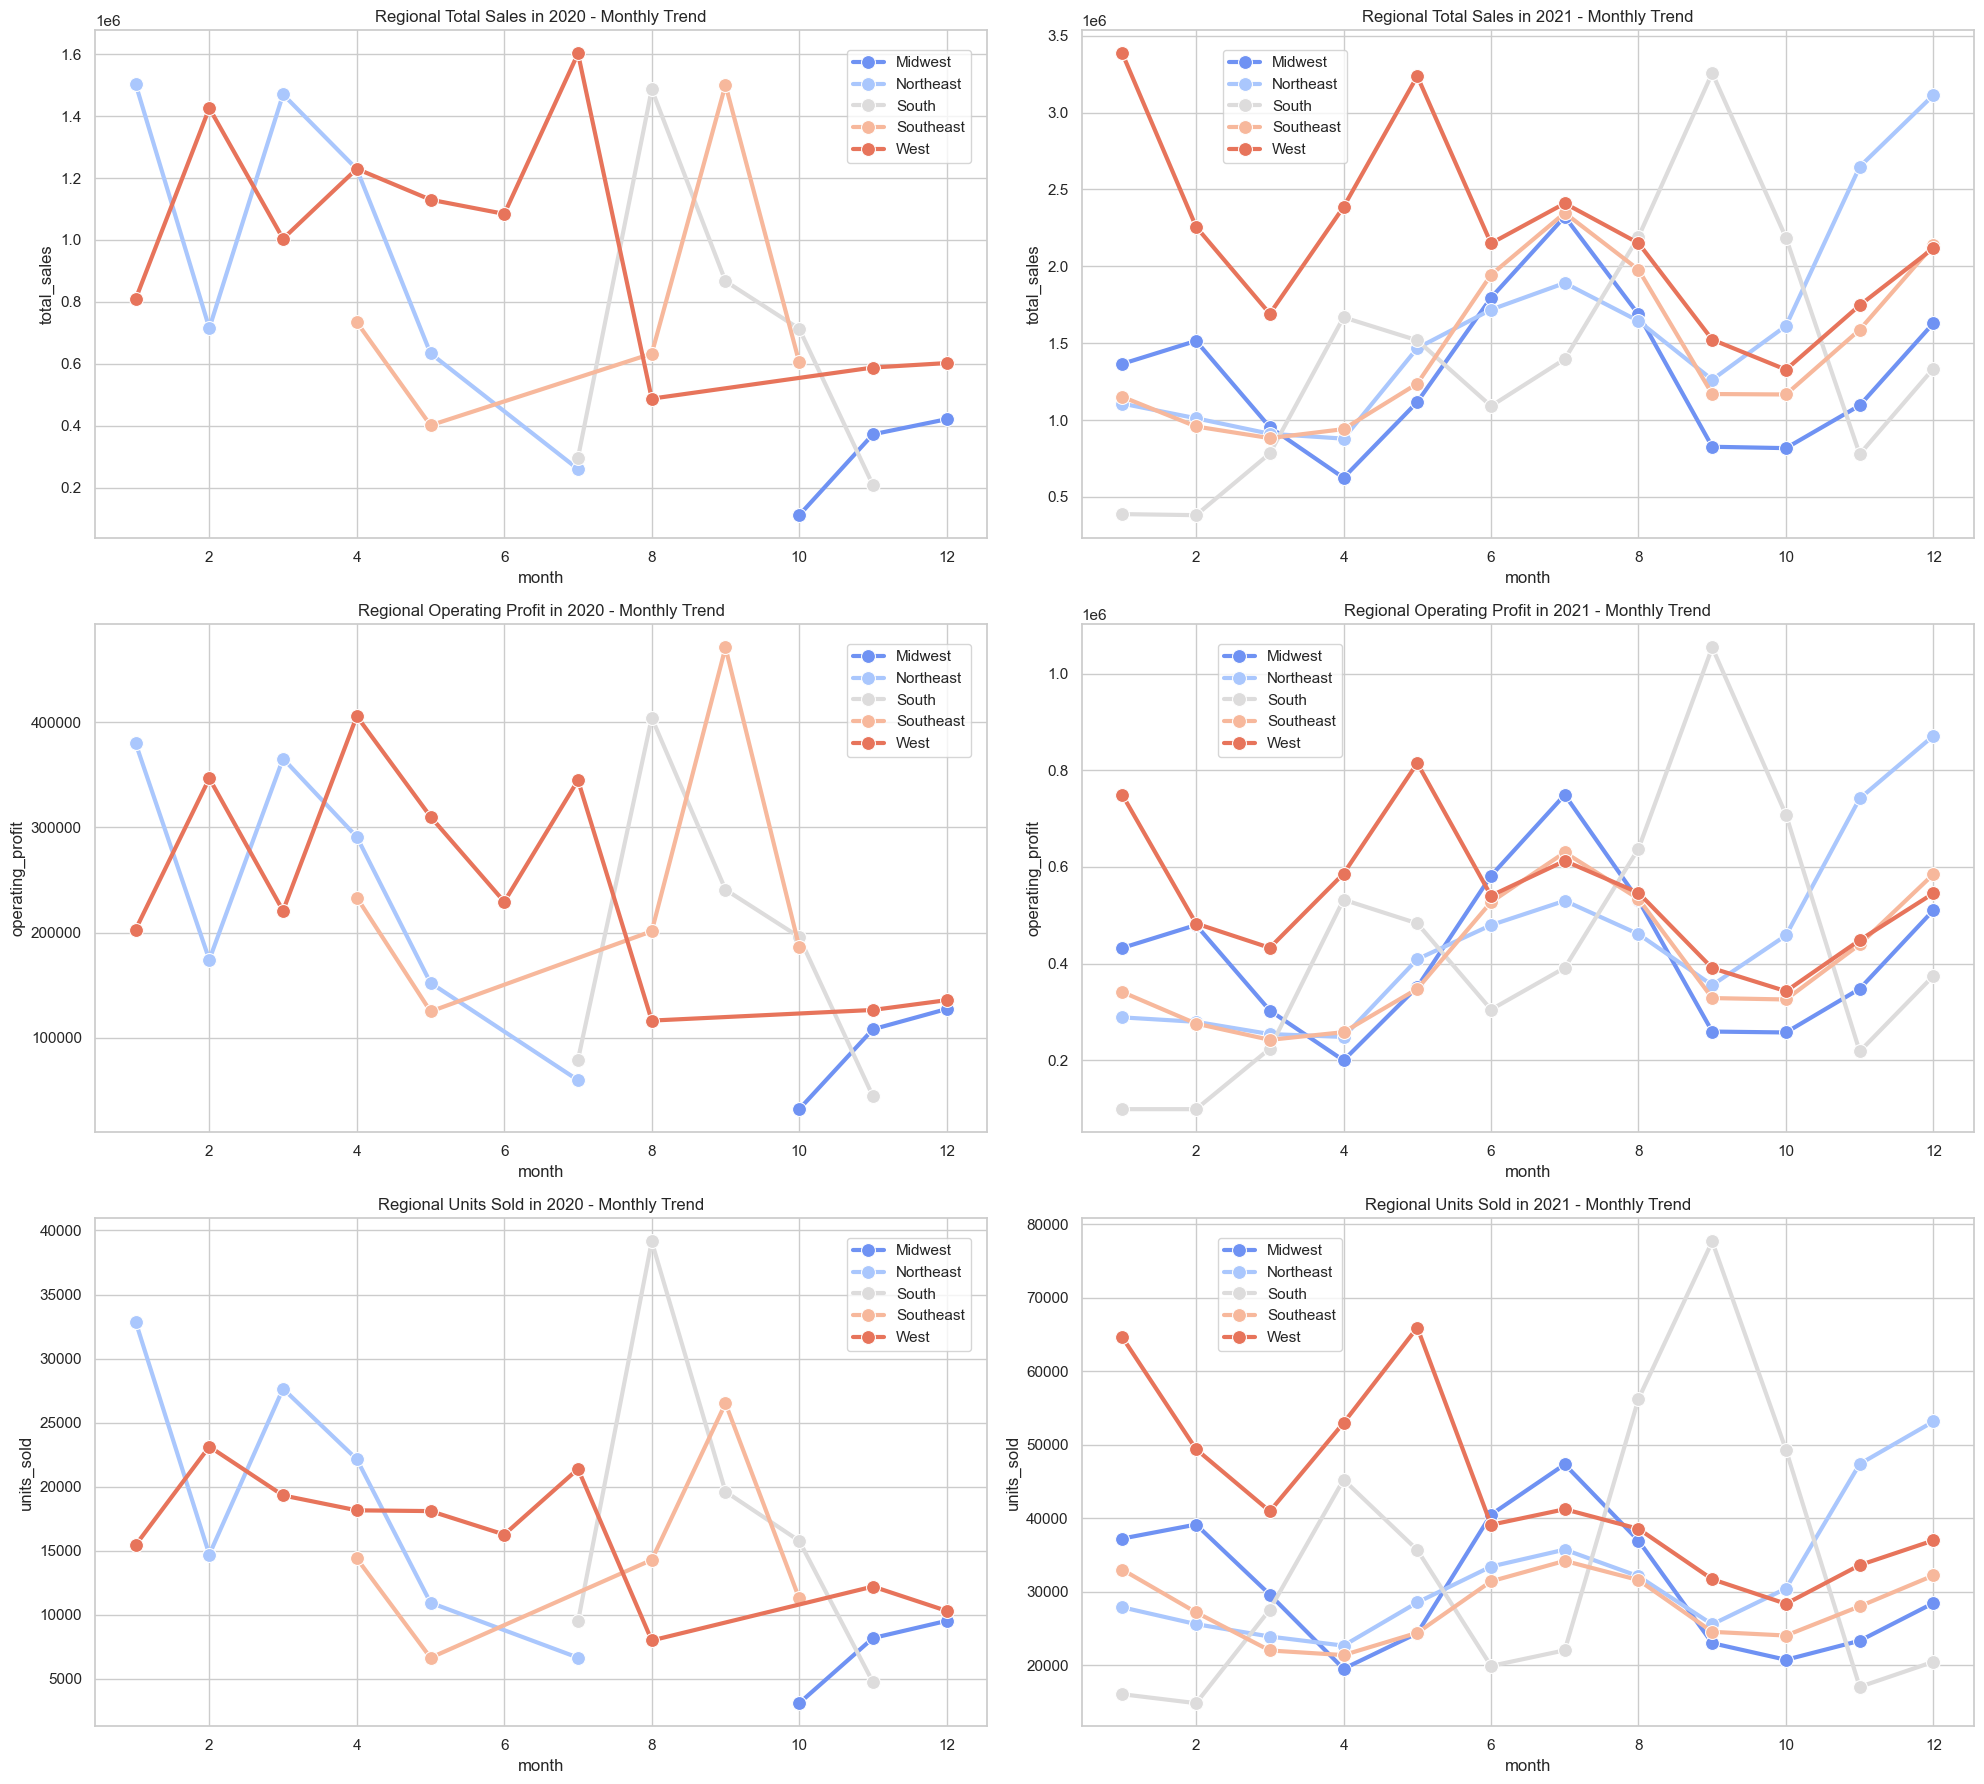

In [72]:
plt.figure(figsize = (20, 18))

plt.subplot(3, 2, 1)
lp1 = sns.lineplot(data=regional_monthly_stats[regional_monthly_stats.year == 2020], x='month', y='total_sales', hue='region', lw=3, marker='o', markersize=10, palette='coolwarm')
lp1.set_title('Regional Total Sales in 2020 - Monthly Trend')
plt.legend(loc='center right', bbox_to_anchor=(0.99, 0.85))

plt.subplot(3, 2, 2)
lp2 = sns.lineplot(data=regional_monthly_stats[regional_monthly_stats.year == 2021], x='month', y='total_sales', hue='region', lw=3, marker='o', markersize=10, palette='coolwarm')
lp2.set_title('Regional Total Sales in 2021 - Monthly Trend')
plt.legend(loc='center left', bbox_to_anchor=(0.15, 0.85))

plt.subplot(3, 2, 3)
lp3 = sns.lineplot(data=regional_monthly_stats[regional_monthly_stats.year == 2020], x='month', y='operating_profit', hue='region', lw=3, marker='o', markersize=10, palette='coolwarm')
lp3.set_title('Regional Operating Profit in 2020 - Monthly Trend')
plt.legend(loc='center right', bbox_to_anchor=(0.99, 0.85))

plt.subplot(3, 2, 4)
lp4 = sns.lineplot(data=regional_monthly_stats[regional_monthly_stats.year == 2021], x='month', y='operating_profit', hue='region', lw=3, marker='o', markersize=10, palette='coolwarm')
lp4.set_title('Regional Operating Profit in 2021 - Monthly Trend')
plt.legend(loc='center right', bbox_to_anchor=(0.3, 0.85))

plt.subplot(3, 2, 5)
lp5 = sns.lineplot(data=regional_monthly_stats[regional_monthly_stats.year == 2020], x='month', y='units_sold', hue='region', lw=3, marker='o', markersize=10, palette='coolwarm')
lp5.set_title('Regional Units Sold in 2020 - Monthly Trend')
plt.legend(loc='center right', bbox_to_anchor=(0.99, 0.85))

plt.subplot(3, 2, 6)
lp6 = sns.lineplot(data=regional_monthly_stats[regional_monthly_stats.year == 2021], x='month', y='units_sold', hue='region', lw=3, marker='o', markersize=10, palette='coolwarm')
lp6.set_title('Regional Units Sold in 2021 - Monthly Trend')
plt.legend(loc='center right', bbox_to_anchor=(0.3, 0.85))

plt.tight_layout()
plt.show()

#### *Insight: While West region dominates all 3 metrics in the first half of 2021, it's position is periodically challenged post June 2021 by MidWest, South & Northeast regions. South region experience a sudden surge of all 3 metrics in the month of August & September.*

#### *Recommendation: Reallocate resources and marketing focus to regions like South and Northeast during times of surging demand like August and September to capitalize on market shifts and seasonal sales variations.*

---

#### **10. Total Sales, Operating Profit & Units Sold by Product - Seasonal Trend**

In [73]:
seasonal_stats = df.groupby(['season', 'product']).sum('total_sales').sort_values('total_sales', ascending=False).reset_index()
seasonal_stats[['season', 'product', 'total_sales', 'operating_profit', 'units_sold']]

season                    product  total_sales  operating_profit  \
0   Summer      Men's Street Footwear      8155436           2365653   
1   Summer            Women's Apparel      6962304           2120380   
2   Winter      Men's Street Footwear      6804249           2032334   
3   Spring      Men's Street Footwear      6490943           1994817   
4   Autumn      Men's Street Footwear      6230141           1887490   
5   Summer    Men's Athletic Footwear      5986385           1552094   
6   Autumn            Women's Apparel      5788477           1907263   
7   Spring            Women's Apparel      5692924           1495411   
8   Winter            Women's Apparel      5371280           1333696   
9   Winter    Men's Athletic Footwear      5168680           1202386   
10  Summer    Women's Street Footwear      4890043           1227746   
11  Autumn    Men's Athletic Footwear      4711412           1271255   
12  Spring    Men's Athletic Footwear      4665703           1143262   
13  Summer              Men's Apparel      4547025           1132570   
14  Winter    Women's Street Footwear      4259860           1125889   
15  Winter              Men's Apparel      4159781           1174231   
16  Spring    Women's Street Footwear      4076886           1104234   
17  Summer  Women's Athletic Footwear      4026974           1096051   
18  Autumn    Women's Street Footwear      3945149           1041415   
19  Autumn              Men's Apparel      3902985           1005346   
20  Spring              Men's Apparel      3875091           1144572   
21  Winter  Women's Athletic Footwear      3568352            915965   
22  Autumn  Women's Athletic Footwear      3389618            971701   
23  Spring  Women's Athletic Footwear      3326577            912323   

    units_sold  
0       159054  
1       115891  
2       147927  
3       152616  
4       133723  
5       116836  
6       103565  
7       110884  
8       102787  
9       107644  
10      100241  
11      106055  
12      103916  
13       79946  
14       99607  
15       76170  
16       99921  
17       83467  
18       91675  
19       74279  
20       75738  
21       77997  
22       76756  
23       78916

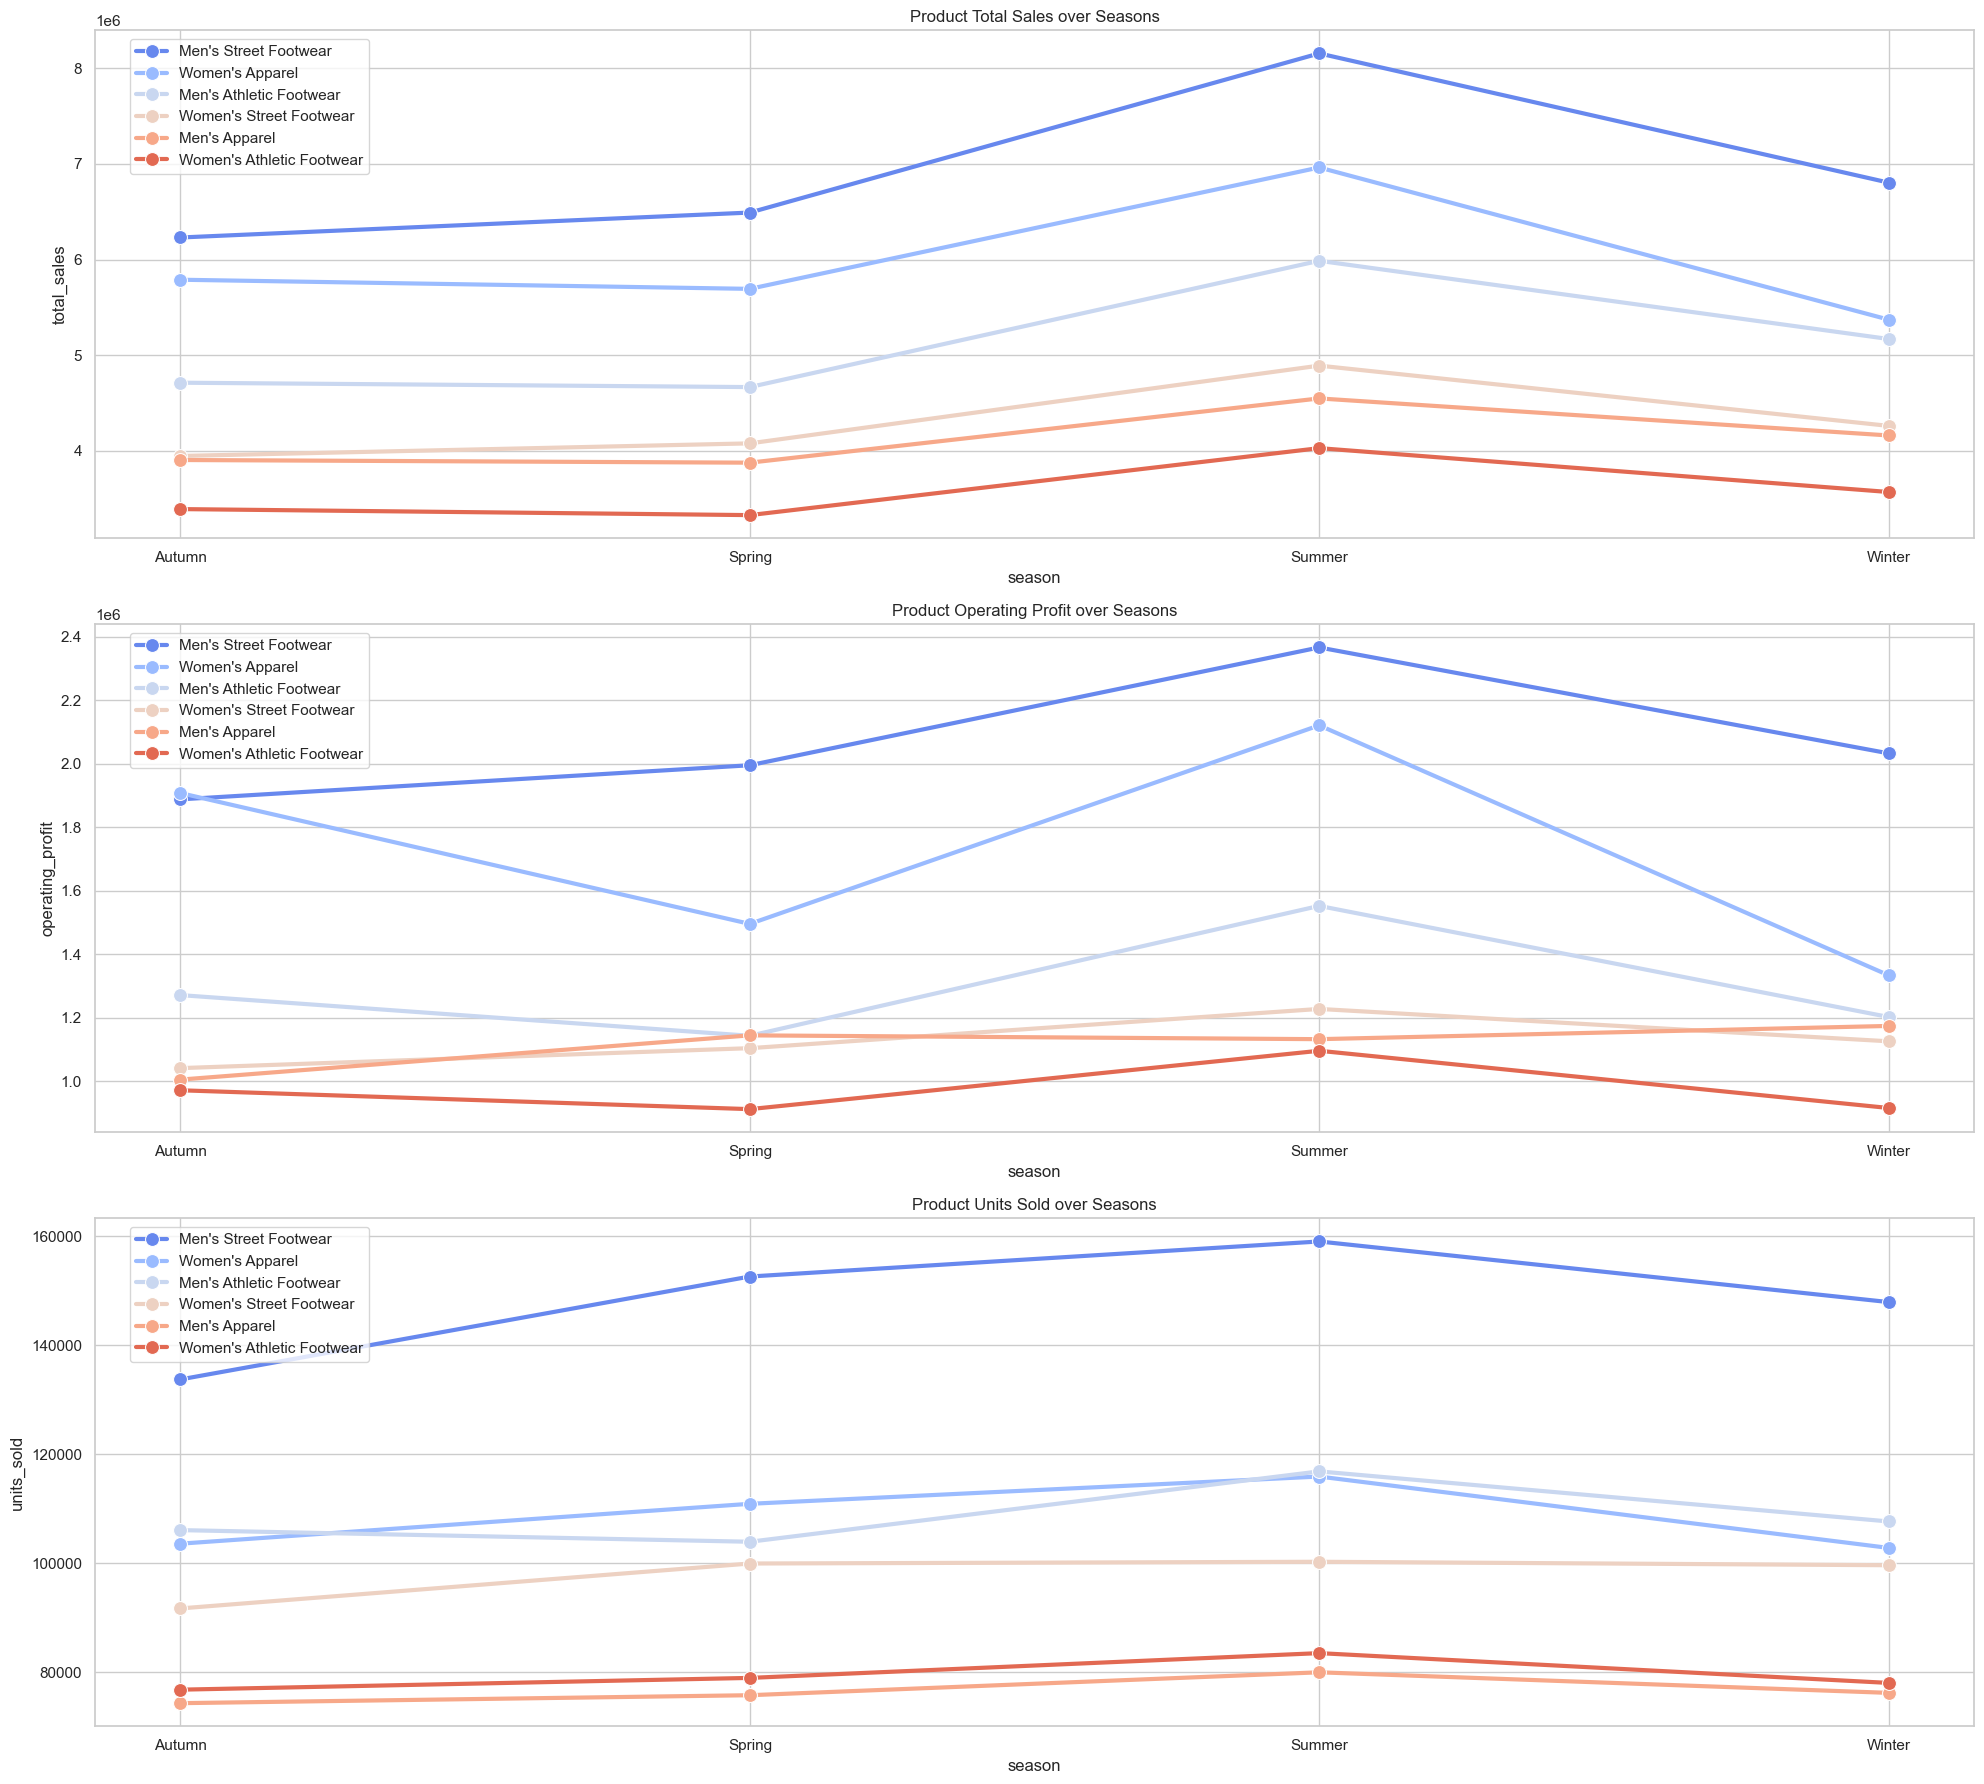

In [74]:
plt.figure(figsize = (20, 18))

plt.subplot(3, 1, 1)
bp1 = sns.lineplot(data=seasonal_stats, x='season', y='total_sales', hue='product', lw=3, marker='o', markersize=10, palette='coolwarm')
bp1.set_title('Product Total Sales over Seasons')
plt.legend(loc='center right', bbox_to_anchor=(0.15, 0.85))

plt.subplot(3, 1, 2)
bp2 = sns.lineplot(data=seasonal_stats, x='season', y='operating_profit', hue='product', lw=3, marker='o', markersize=10, palette='coolwarm')
bp2.set_title('Product Operating Profit over Seasons')
plt.legend(loc='center right', bbox_to_anchor=(0.15, 0.85))

plt.subplot(3, 1, 3)
bp3 = sns.lineplot(data=seasonal_stats, x='season', y='units_sold', hue='product', lw=3, marker='o', markersize=10, palette='coolwarm')
bp3.set_title('Product Units Sold over Seasons')
plt.legend(loc='center right', bbox_to_anchor=(0.15, 0.85))

plt.tight_layout()
plt.show()

#### *Insight: Women's Apparel sells more units than Men's Athletic Footwear in Spring unlike rest of the seasons.*

#### *Recommendation: Tailor marketing campaigns to promote Women’s Apparel during the Spring season, capitalizing on the higher demand and ensuring stock levels are optimized for this trend.*

---

#### **C. Comparative Analysis:**

---

#### **11. Total Sales, Operating Profit & Units Sold of Product by Retailer**

In [75]:
retailer_product_stats = df.groupby(['retailer', 'product']).sum('total_sales').sort_values('total_sales', ascending=False).reset_index()
retailer_product_stats[['retailer', 'product', 'total_sales', 'operating_profit', 'units_sold']]

retailer                    product  total_sales  operating_profit  \
0     Foot Locker      Men's Street Footwear      7538775           2306113   
1       West Gear      Men's Street Footwear      7058194           2053771   
2       West Gear            Women's Apparel      6228637           1531646   
3       West Gear    Men's Athletic Footwear      5735977           1322907   
4     Foot Locker            Women's Apparel      5682864           1719310   
5   Sports Direct      Men's Street Footwear      5162570           1583789   
6   Sports Direct            Women's Apparel      5023757           1783312   
7       West Gear    Women's Street Footwear      4868996           1254915   
8     Foot Locker    Men's Athletic Footwear      4817415           1237442   
9       West Gear              Men's Apparel      4400061           1345721   
10  Sports Direct    Men's Athletic Footwear      4142734           1181328   
11      West Gear  Women's Athletic Footwear      4025943           1029846   
12    Foot Locker              Men's Apparel      3883745            994264   
13    Foot Locker    Women's Street Footwear      3867147            961868   
14  Sports Direct    Women's Street Footwear      3751737           1023137   
15  Sports Direct              Men's Apparel      3342286            872409   
16    Foot Locker  Women's Athletic Footwear      3214999            846153   
17  Sports Direct  Women's Athletic Footwear      3134913            968889   
18         Kohl's      Men's Street Footwear      2948898            921985   
19         Amazon      Men's Street Footwear      2877127            870767   
20         Kohl's            Women's Apparel      2681989            559620   
21         Kohl's    Men's Athletic Footwear      2373816            572584   
22        Walmart            Women's Apparel      2163724            634848   
23        Walmart      Men's Street Footwear      2095205            543869   
24         Amazon            Women's Apparel      2034014            628014   
25         Kohl's    Women's Street Footwear      1972166            575383   
26        Walmart    Men's Athletic Footwear      1899279            402930   
27         Kohl's              Men's Apparel      1872090            594508   
28         Kohl's  Women's Athletic Footwear      1663494            457073   
29        Walmart              Men's Apparel      1622180            316663   
30         Amazon    Men's Athletic Footwear      1562959            451806   
31        Walmart    Women's Street Footwear      1488030            356007   
32         Amazon              Men's Apparel      1364520            333154   
33        Walmart  Women's Athletic Footwear      1237667            323909   
34         Amazon    Women's Street Footwear      1223862            327974   
35         Amazon  Women's Athletic Footwear      1034505            270170   

    units_sold  
0       159081  
1       145653  
2       106349  
3       111400  
4       104489  
5       124879  
6        99390  
7       101289  
8       103567  
9        76782  
10       99328  
11       82539  
12       71543  
13       92235  
14       91636  
15       67160  
16       73004  
17       73697  
18       66844  
19       54883  
20       49012  
21       51012  
22       38002  
23       41980  
24       35885  
25       45910  
26       37157  
27       36080  
28       38517  
29       30506  
30       31987  
31       31745  
32       24062  
33       26835  
34       28629  
35       22544

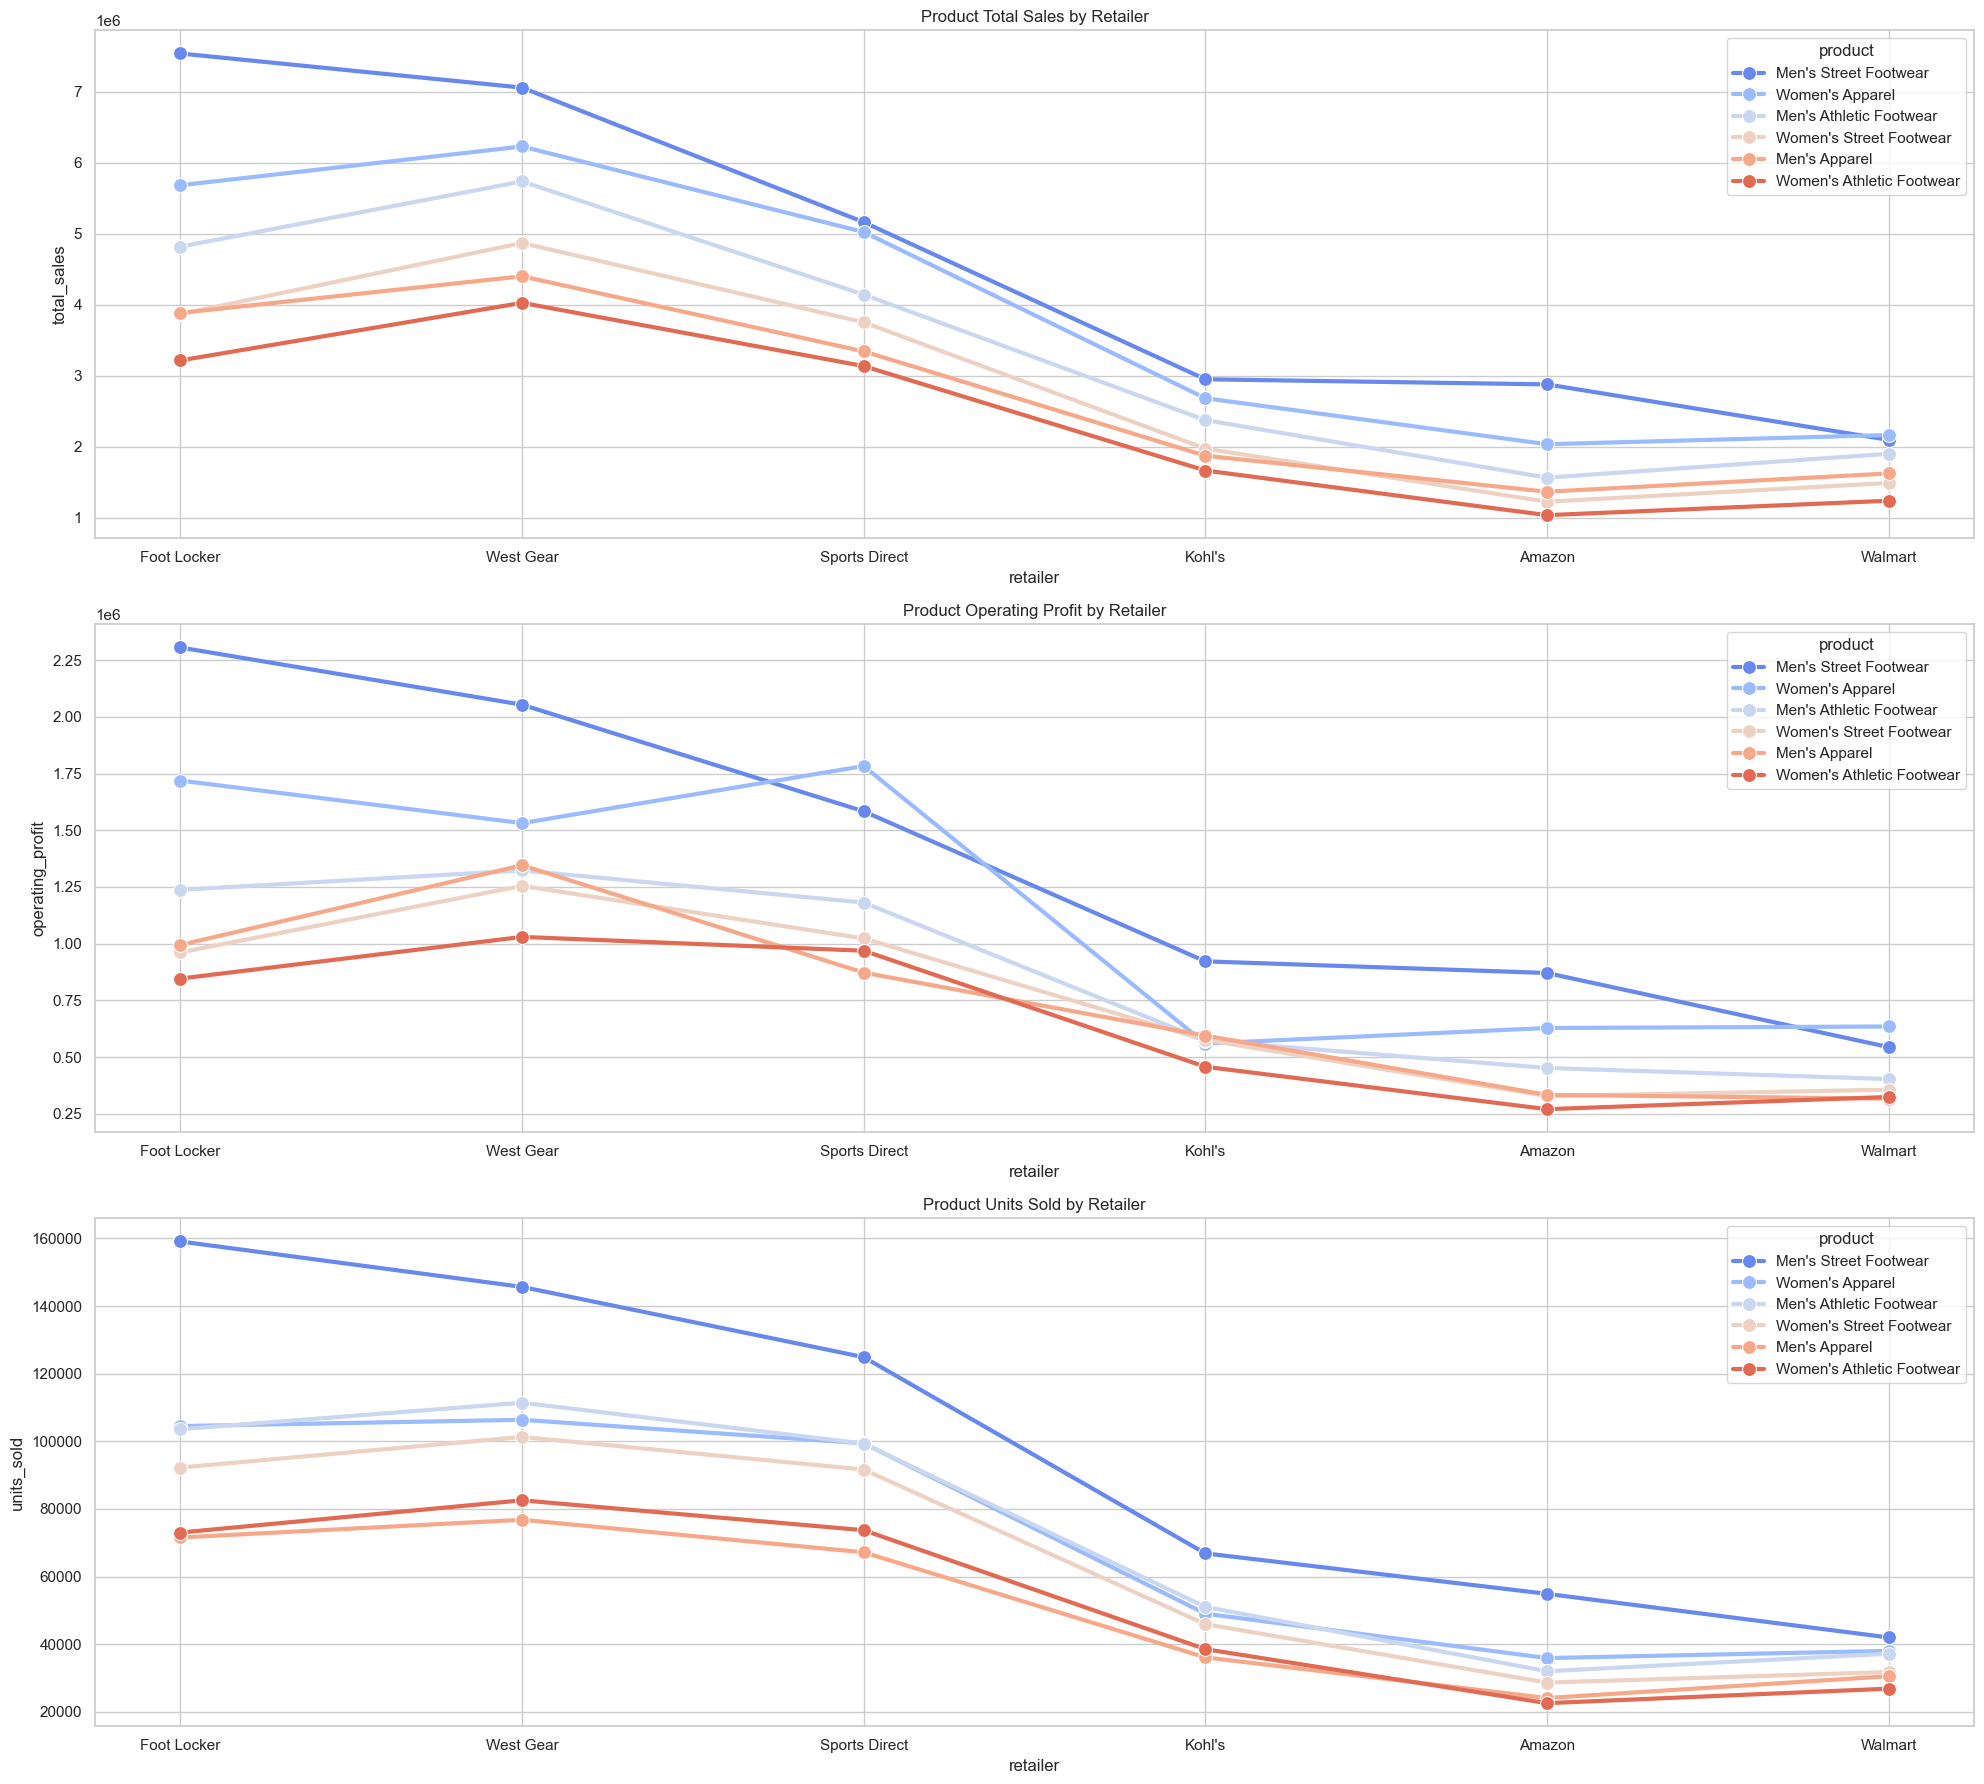

In [76]:
plt.figure(figsize = (20, 18))

plt.subplot(3, 1, 1)
bp1 = sns.lineplot(data=retailer_product_stats, x='retailer', y='total_sales', hue='product', lw=3, marker='o', markersize=10, palette='coolwarm')
bp1.set_title('Product Total Sales by Retailer')

plt.subplot(3, 1, 2)
bp2 = sns.lineplot(data=retailer_product_stats, x='retailer', y='operating_profit', hue='product', lw=3, marker='o', markersize=10, palette='coolwarm')
bp2.set_title('Product Operating Profit by Retailer')

plt.subplot(3, 1, 3)
bp3 = sns.lineplot(data=retailer_product_stats, x='retailer', y='units_sold', hue='product', lw=3, marker='o', markersize=10, palette='coolwarm')
bp3.set_title('Product Units Sold by Retailer')

plt.tight_layout()
plt.show()

#### *Insight: Contrasting overall trend, Sports Direct & Walmart generate more Operating Profit from Women's Apparel than Men's Street Footwear.*

#### *Recommendation: Increase Women’s Apparel inventory and promotions through Sports Direct & Walmart, optimizing profitability from these retailers by aligning product lines with customer preferences.*

---

#### **12. Total Sales, Operating Profit & Units Sold by Retailer over Region**

In [77]:
region_retailersales = df.groupby(['region', 'retailer'])[['total_sales', 'operating_profit', 'units_sold']].sum().sort_values(['region', 'total_sales'], ascending = [True, False]).reset_index()
region_retailersales

region       retailer  total_sales  operating_profit  units_sold
0     Midwest    Foot Locker      5868769           1817390      140831
1     Midwest  Sports Direct      3219616           1068467       74415
2     Midwest      West Gear      2766236            849477       68323
3     Midwest         Kohl's      2731365            855304       62393
4     Midwest         Amazon      2068448            683382       44925
5   Northeast    Foot Locker      8991649           2391502      179087
6   Northeast         Amazon      4998840           1339907       95020
7   Northeast      West Gear      3991433           1252228       80991
8   Northeast  Sports Direct      3404772            839520       74310
9   Northeast        Walmart      1968355            461718       34726
10  Northeast         Kohl's      1723218            517275       37145
11      South  Sports Direct      9234346           2972443      230145
12      South        Walmart      4712683           1302115      117113
13      South      West Gear      4710481           1300383       94214
14      South    Foot Locker      1322450            368000       34786
15      South         Kohl's       506680            135709       12778
16      South         Amazon        58091             14694        1674
17  Southeast    Foot Locker      7768368           2253207      150781
18  Southeast  Sports Direct      7040593           2075579      143599
19  Southeast        Walmart      2992039            644670       42013
20  Southeast      West Gear      2241428            652628       40985
21  Southeast         Amazon      1332008            429517       29622
22       West      West Gear     18608230           4484090      339499
23       West         Kohl's      8551190           2172865      175059
24       West    Foot Locker      5053709           1235051       98434
25       West  Sports Direct      1658670            456855       33621
26       West         Amazon      1639600            414385       26749
27       West        Walmart       833008            169723       12373

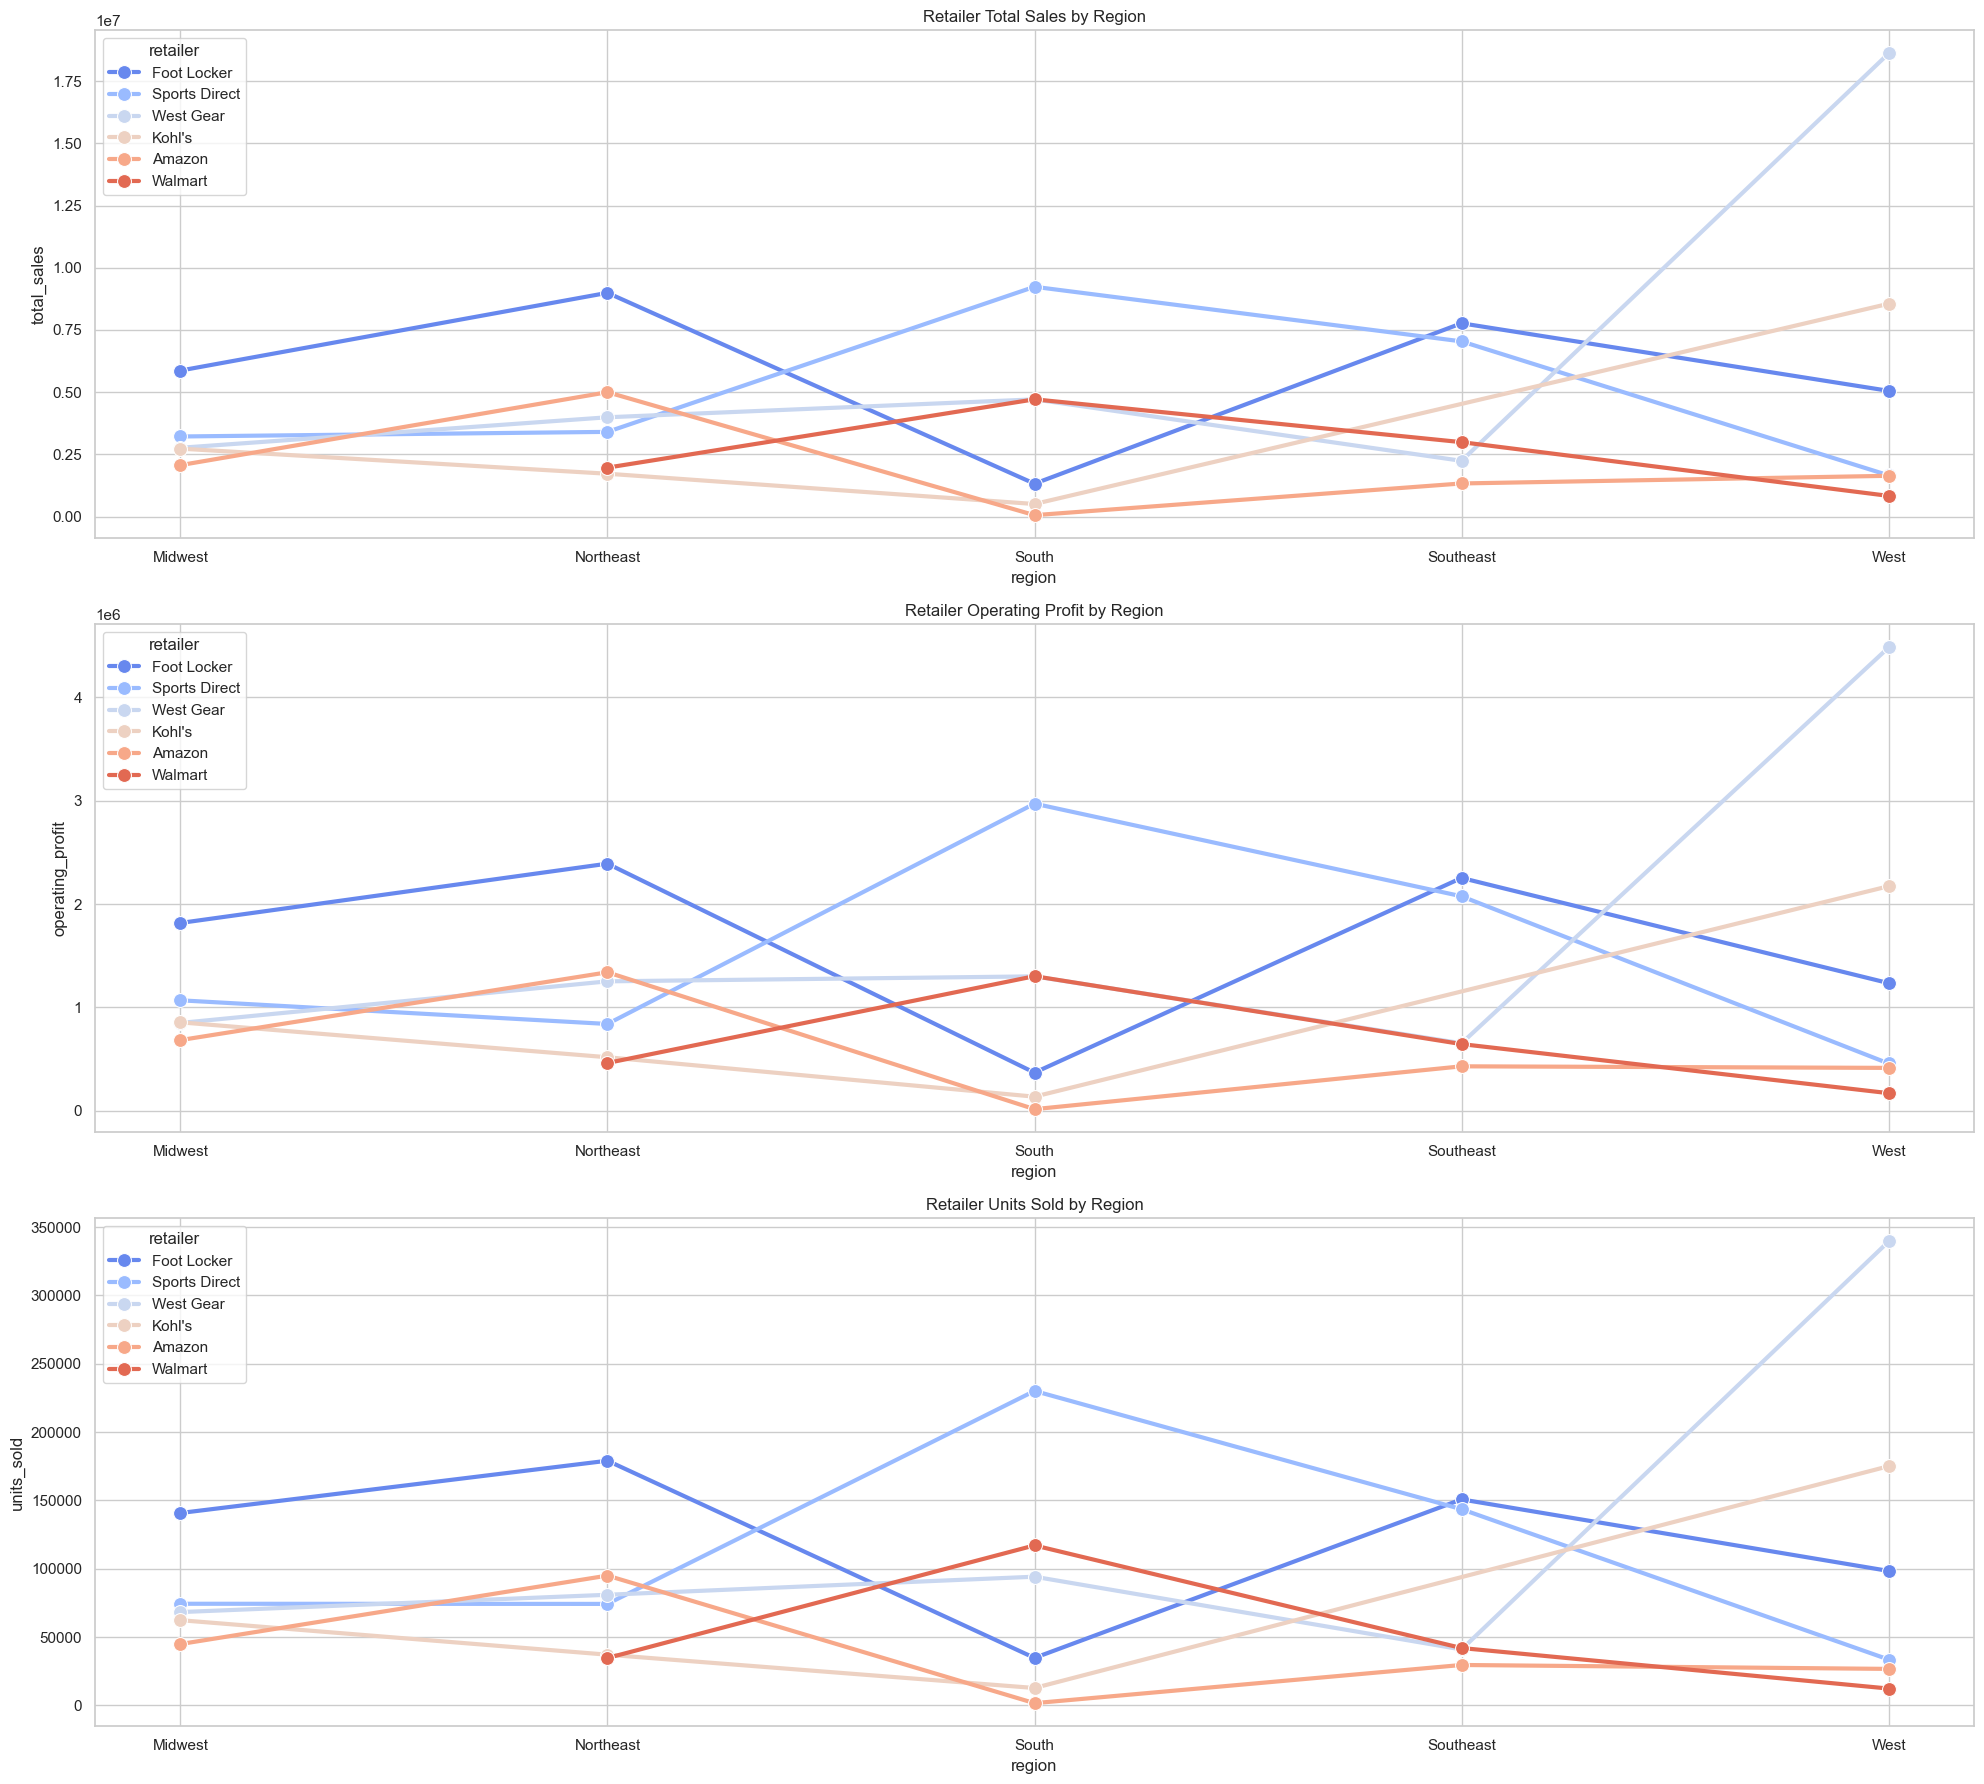

In [78]:
plt.figure(figsize = (20, 18))

plt.subplot(3, 1, 1)
bp1 = sns.lineplot(data=region_retailersales, x='region', y='total_sales', hue='retailer', lw=3, marker='o', markersize=10, palette='coolwarm')
bp1.set_title('Retailer Total Sales by Region')

plt.subplot(3, 1, 2)
bp2 = sns.lineplot(data=region_retailersales, x='region', y='operating_profit', hue='retailer', lw=3, marker='o', markersize=10, palette='coolwarm')
bp2.set_title('Retailer Operating Profit by Region')

plt.subplot(3, 1, 3)
bp3 = sns.lineplot(data=region_retailersales, x='region', y='units_sold', hue='retailer', lw=3, marker='o', markersize=10, palette='coolwarm')
bp3.set_title('Retailer Units Sold by Region')

plt.tight_layout()
plt.show()

#### *Insight: Foot Locker emerges as the Top Retailer across all 3 metrics in Midwest, Northeast & Southeast regions, while Sports Direct & West Gear take over that top spot for South & West regions respectively.*

#### *Recommendation: Refine region-specific strategies by leveraging Foot Locker’s success in some regions and strengthening Sports Direct & West Gear’s market presence in South & West regions with exclusive product offerings or targeted promotions.*

---

#### **13. Total Sales, Operating Profit & Units Sold by Product over Region**

In [79]:
region_productsales = df.groupby(['region', 'product'])[['total_sales', 'operating_profit', 'units_sold']].sum().sort_values(['region', 'total_sales'], ascending = [True, False]).reset_index()
region_productsales

region                    product  total_sales  operating_profit  \
0     Midwest      Men's Street Footwear      4707360           1499751   
1     Midwest            Women's Apparel      3453008           1232525   
2     Midwest    Men's Athletic Footwear      2609289            737195   
3     Midwest              Men's Apparel      2223786            723263   
4     Midwest    Women's Street Footwear      1991448            578487   
5     Midwest  Women's Athletic Footwear      1669543            502799   
6   Northeast      Men's Street Footwear      6841324           2135651   
7   Northeast            Women's Apparel      5045208           1349926   
8   Northeast    Men's Athletic Footwear      3895862           1025074   
9   Northeast              Men's Apparel      3475037            816184   
10  Northeast    Women's Street Footwear      3152823            795684   
11  Northeast  Women's Athletic Footwear      2668013            679631   
12      South            Women's Apparel      4224937           1465518   
13      South      Men's Street Footwear      4048261           1150797   
14      South    Men's Athletic Footwear      3612045            986922   
15      South    Women's Street Footwear      3219197            917343   
16      South              Men's Apparel      2811194            724617   
17      South  Women's Athletic Footwear      2629097            848147   
18  Southeast      Men's Street Footwear      4693836           1462292   
19  Southeast            Women's Apparel      4109786           1387964   
20  Southeast    Men's Athletic Footwear      3653645            951640   
21  Southeast              Men's Apparel      3183237            828420   
22  Southeast    Women's Street Footwear      3059884            733022   
23  Southeast  Women's Athletic Footwear      2674048            692263   
24       West      Men's Street Footwear      7389988           2031803   
25       West            Women's Apparel      6982046           1420817   
26       West    Men's Athletic Footwear      6761339           1468166   
27       West    Women's Street Footwear      5748586           1474748   
28       West              Men's Apparel      4791628           1364235   
29       West  Women's Athletic Footwear      4670820           1173200   

    units_sold  
0       109861  
1        69435  
2        64920  
3        45304  
4        56659  
5        44708  
6       134252  
7        90048  
8        81474  
9        62031  
10       74010  
11       59464  
12       88740  
13      106545  
14       89204  
15       81582  
16       60641  
17       63998  
18       91867  
19       68839  
20       71129  
21       54385  
22       65488  
23       55292  
24      150795  
25      116065  
26      127724  
27      113705  
28       83772  
29       93674

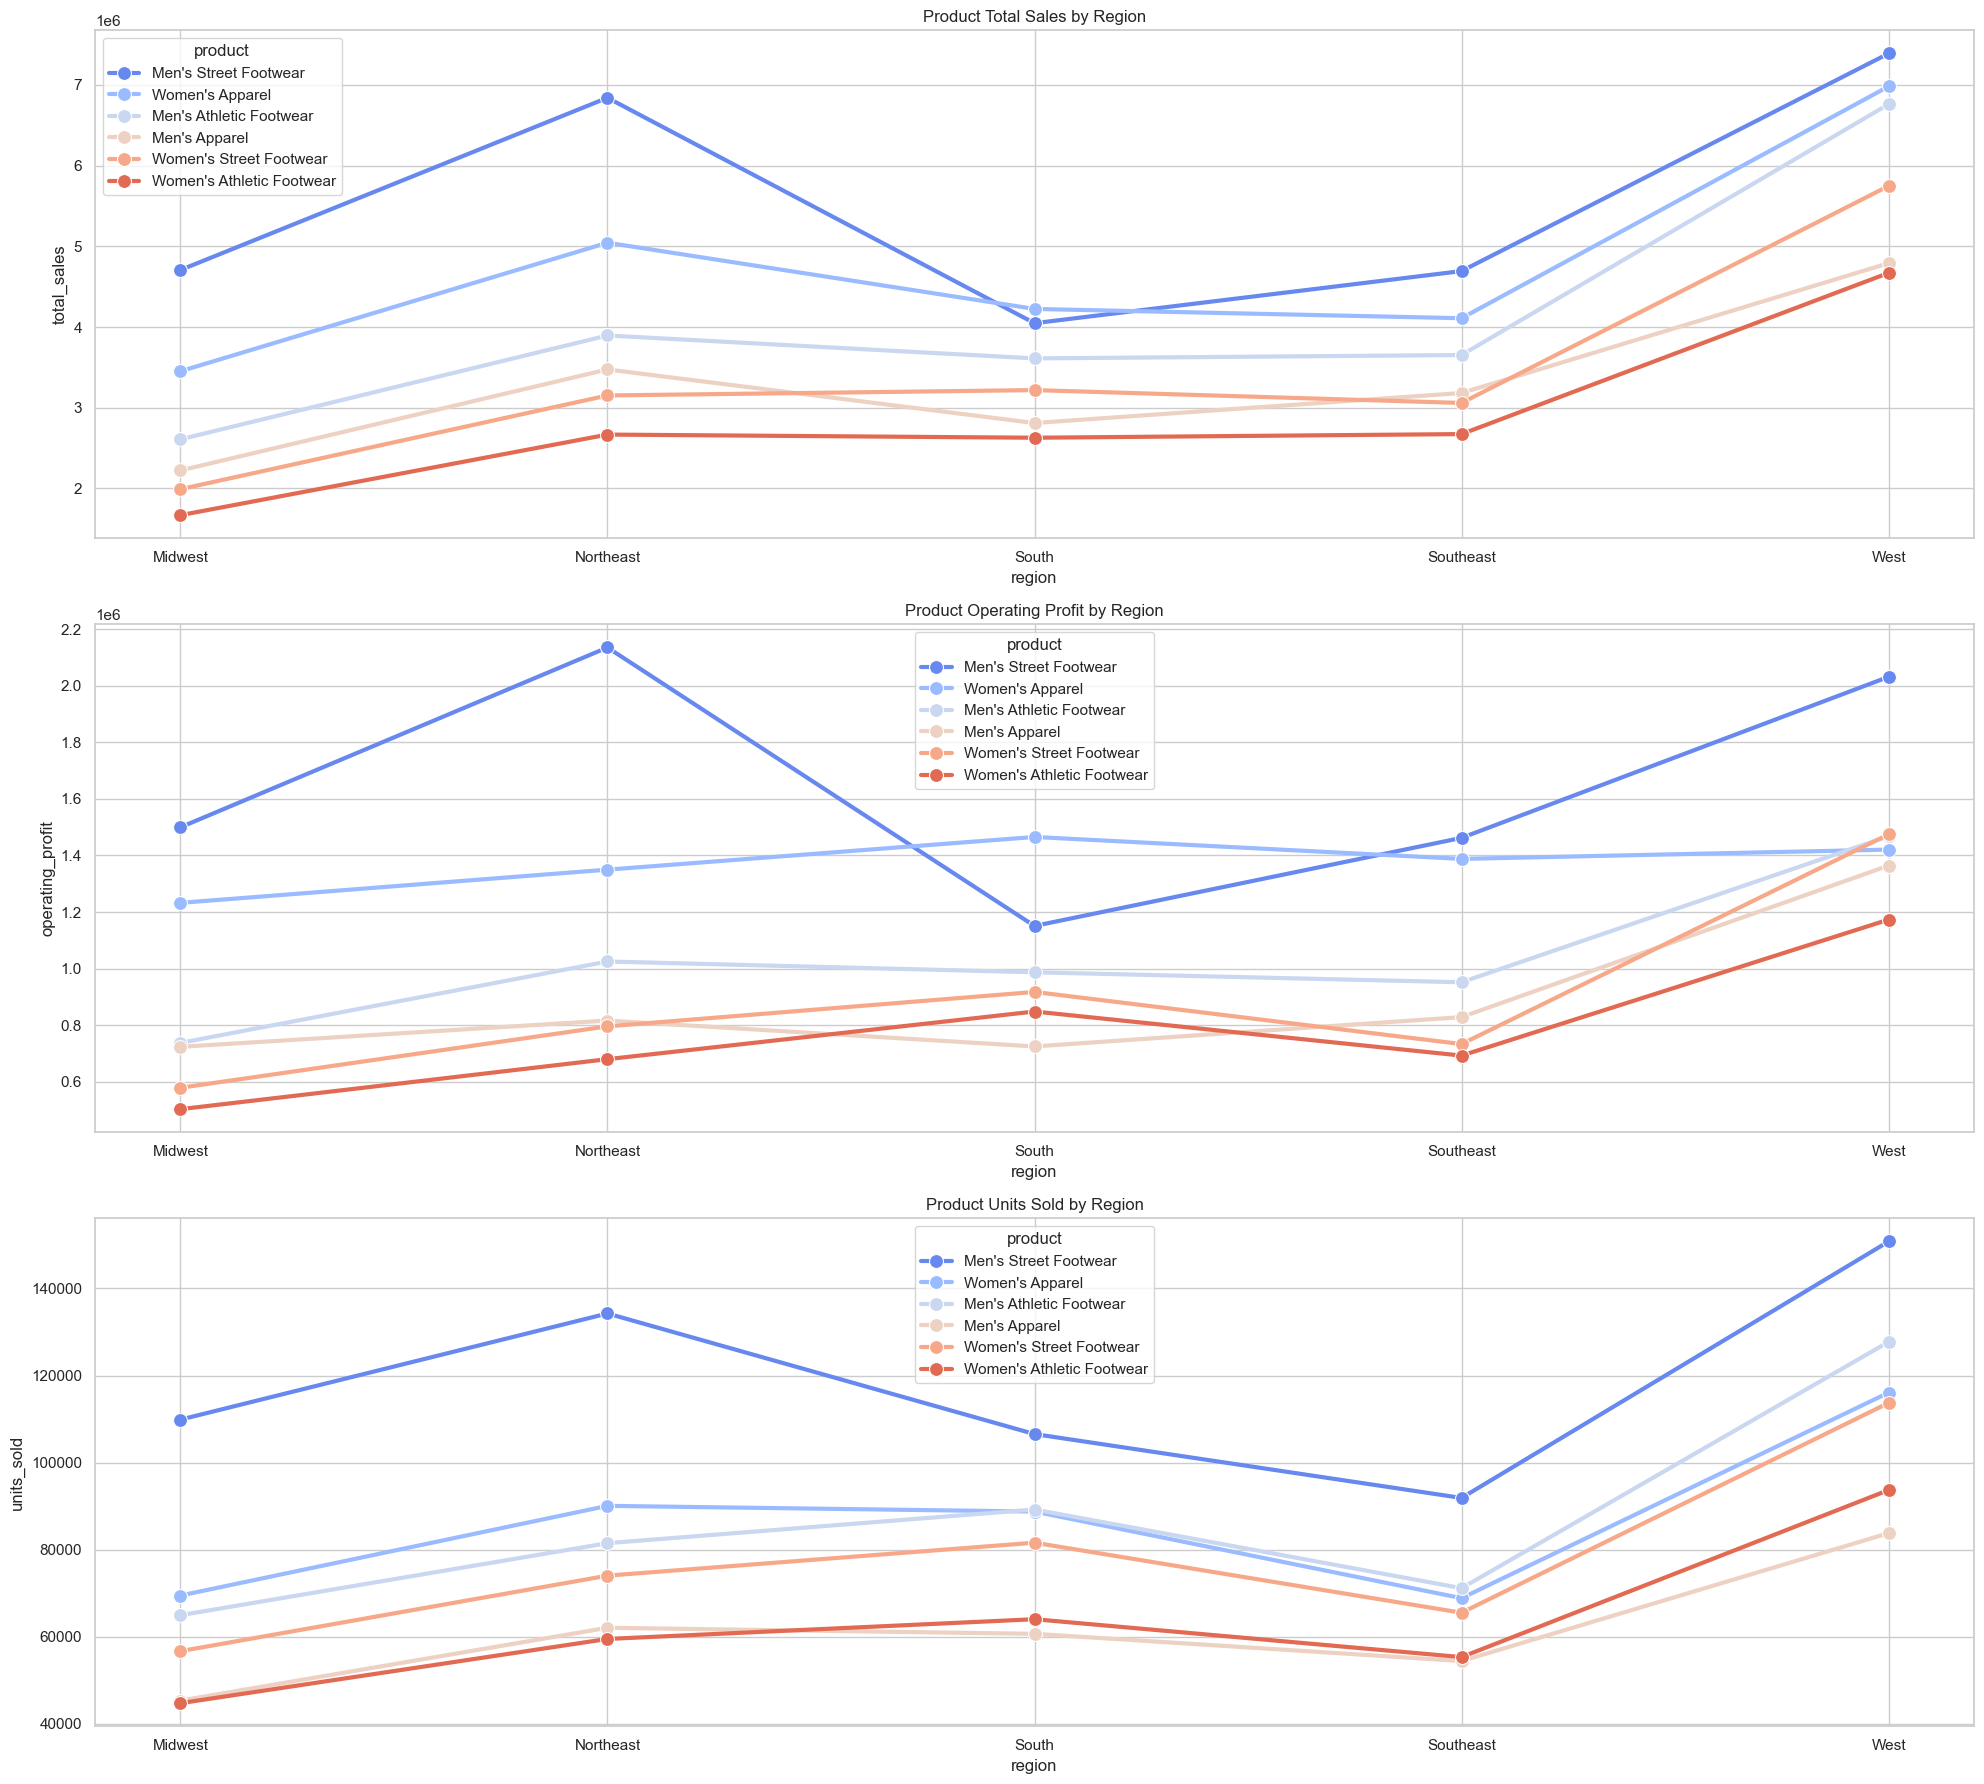

In [80]:
plt.figure(figsize = (20, 18))

plt.subplot(3, 1, 1)
bp1 = sns.lineplot(data=region_productsales, x='region', y='total_sales', hue='product', lw=3, marker='o', markersize=10, palette='coolwarm')
bp1.set_title('Product Total Sales by Region')

plt.subplot(3, 1, 2)
bp2 = sns.lineplot(data=region_productsales, x='region', y='operating_profit', hue='product', lw=3, marker='o', markersize=10, palette='coolwarm')
bp2.set_title('Product Operating Profit by Region')

plt.subplot(3, 1, 3)
bp3 = sns.lineplot(data=region_productsales, x='region', y='units_sold', hue='product', lw=3, marker='o', markersize=10, palette='coolwarm')
bp3.set_title('Product Units Sold by Region')

plt.tight_layout()
plt.show()

#### *Insight: Contrasting overall trend, in South region Women's Apparel dominates Men's Street Footwear in Total Sales & Operating Profit. In West region, Men's Athletic Footwear dominates Women's Apparel in Units Sold.*

#### *Recommendation: Prioritize Women’s Apparel marketing campaigns and promotions in the South region, focusing on demand growth opportunities for this product line to maximize revenue.*

---

#### **D. Geospatial Analysis:**

---

#### **14. Total Sales, Operating Profit & Units Sold by Top 20 States and Cities**

In [81]:
state_sales = df.groupby('state')[['total_sales', 'operating_profit', 'units_sold']].sum().sort_values('total_sales', ascending = False)[:20].reset_index()
state_sales

state  total_sales  operating_profit  units_sold
0         New York      8670464           2333001      169140
1       California      8488758           1902069      162034
2          Florida      7820589           2092645      133430
3            Texas      6553746           1848325      157950
4   South Carolina      3593112           1132433       72610
5        Louisiana      3377031            941727       57615
6       Washington      3222093            699147       46611
7         Virginia      3074415            771951       52969
8           Oregon      3047049            757322       50536
9           Nevada      2981134            706069       51831
10  North Carolina      2936581            975646       62936
11      New Mexico      2824641            673807       52633
12           Idaho      2742753            812123       63827
13          Hawaii      2734457            584990       40375
14         Georgia      2708591            689336       56391
15        Colorado      2569036            771362       41378
16       Tennessee      2567190            849369       66077
17         Alabama      2513424            914772       63327
18   New Hampshire      2339267            578634       40812
19        Michigan      2287283            813604       50095

In [82]:
city_sales = df.groupby('city')[['total_sales', 'operating_profit', 'units_sold']].sum().sort_values('total_sales', ascending = False)[:20].reset_index()
city_sales

city  total_sales  operating_profit  units_sold
0        New York      5676160           1390007      111954
1      Charleston      4904272           1560731      102483
2   San Francisco      4837470            997571       85650
3        Portland      4176777           1076096       72946
4         Orlando      3946476            875762       60295
5           Miami      3874113           1216883       73135
6     Los Angeles      3651288            904498       76384
7         Houston      3571007            964005       88772
8     New Orleans      3377031            941727       57615
9         Seattle      3222093            699147       46611
10       Richmond      3074415            771951       52969
11         Albany      2994304            942994       57186
12         Dallas      2982739            884320       69178
13      Las Vegas      2981134            706069       51831
14      Charlotte      2936581            975646       62936
15    Albuquerque      2824641            673807       52633
16          Boise      2742753            812123       63827
17       Honolulu      2734457            584990       40375
18        Atlanta      2708591            689336       56391
19         Denver      2569036            771362       41378

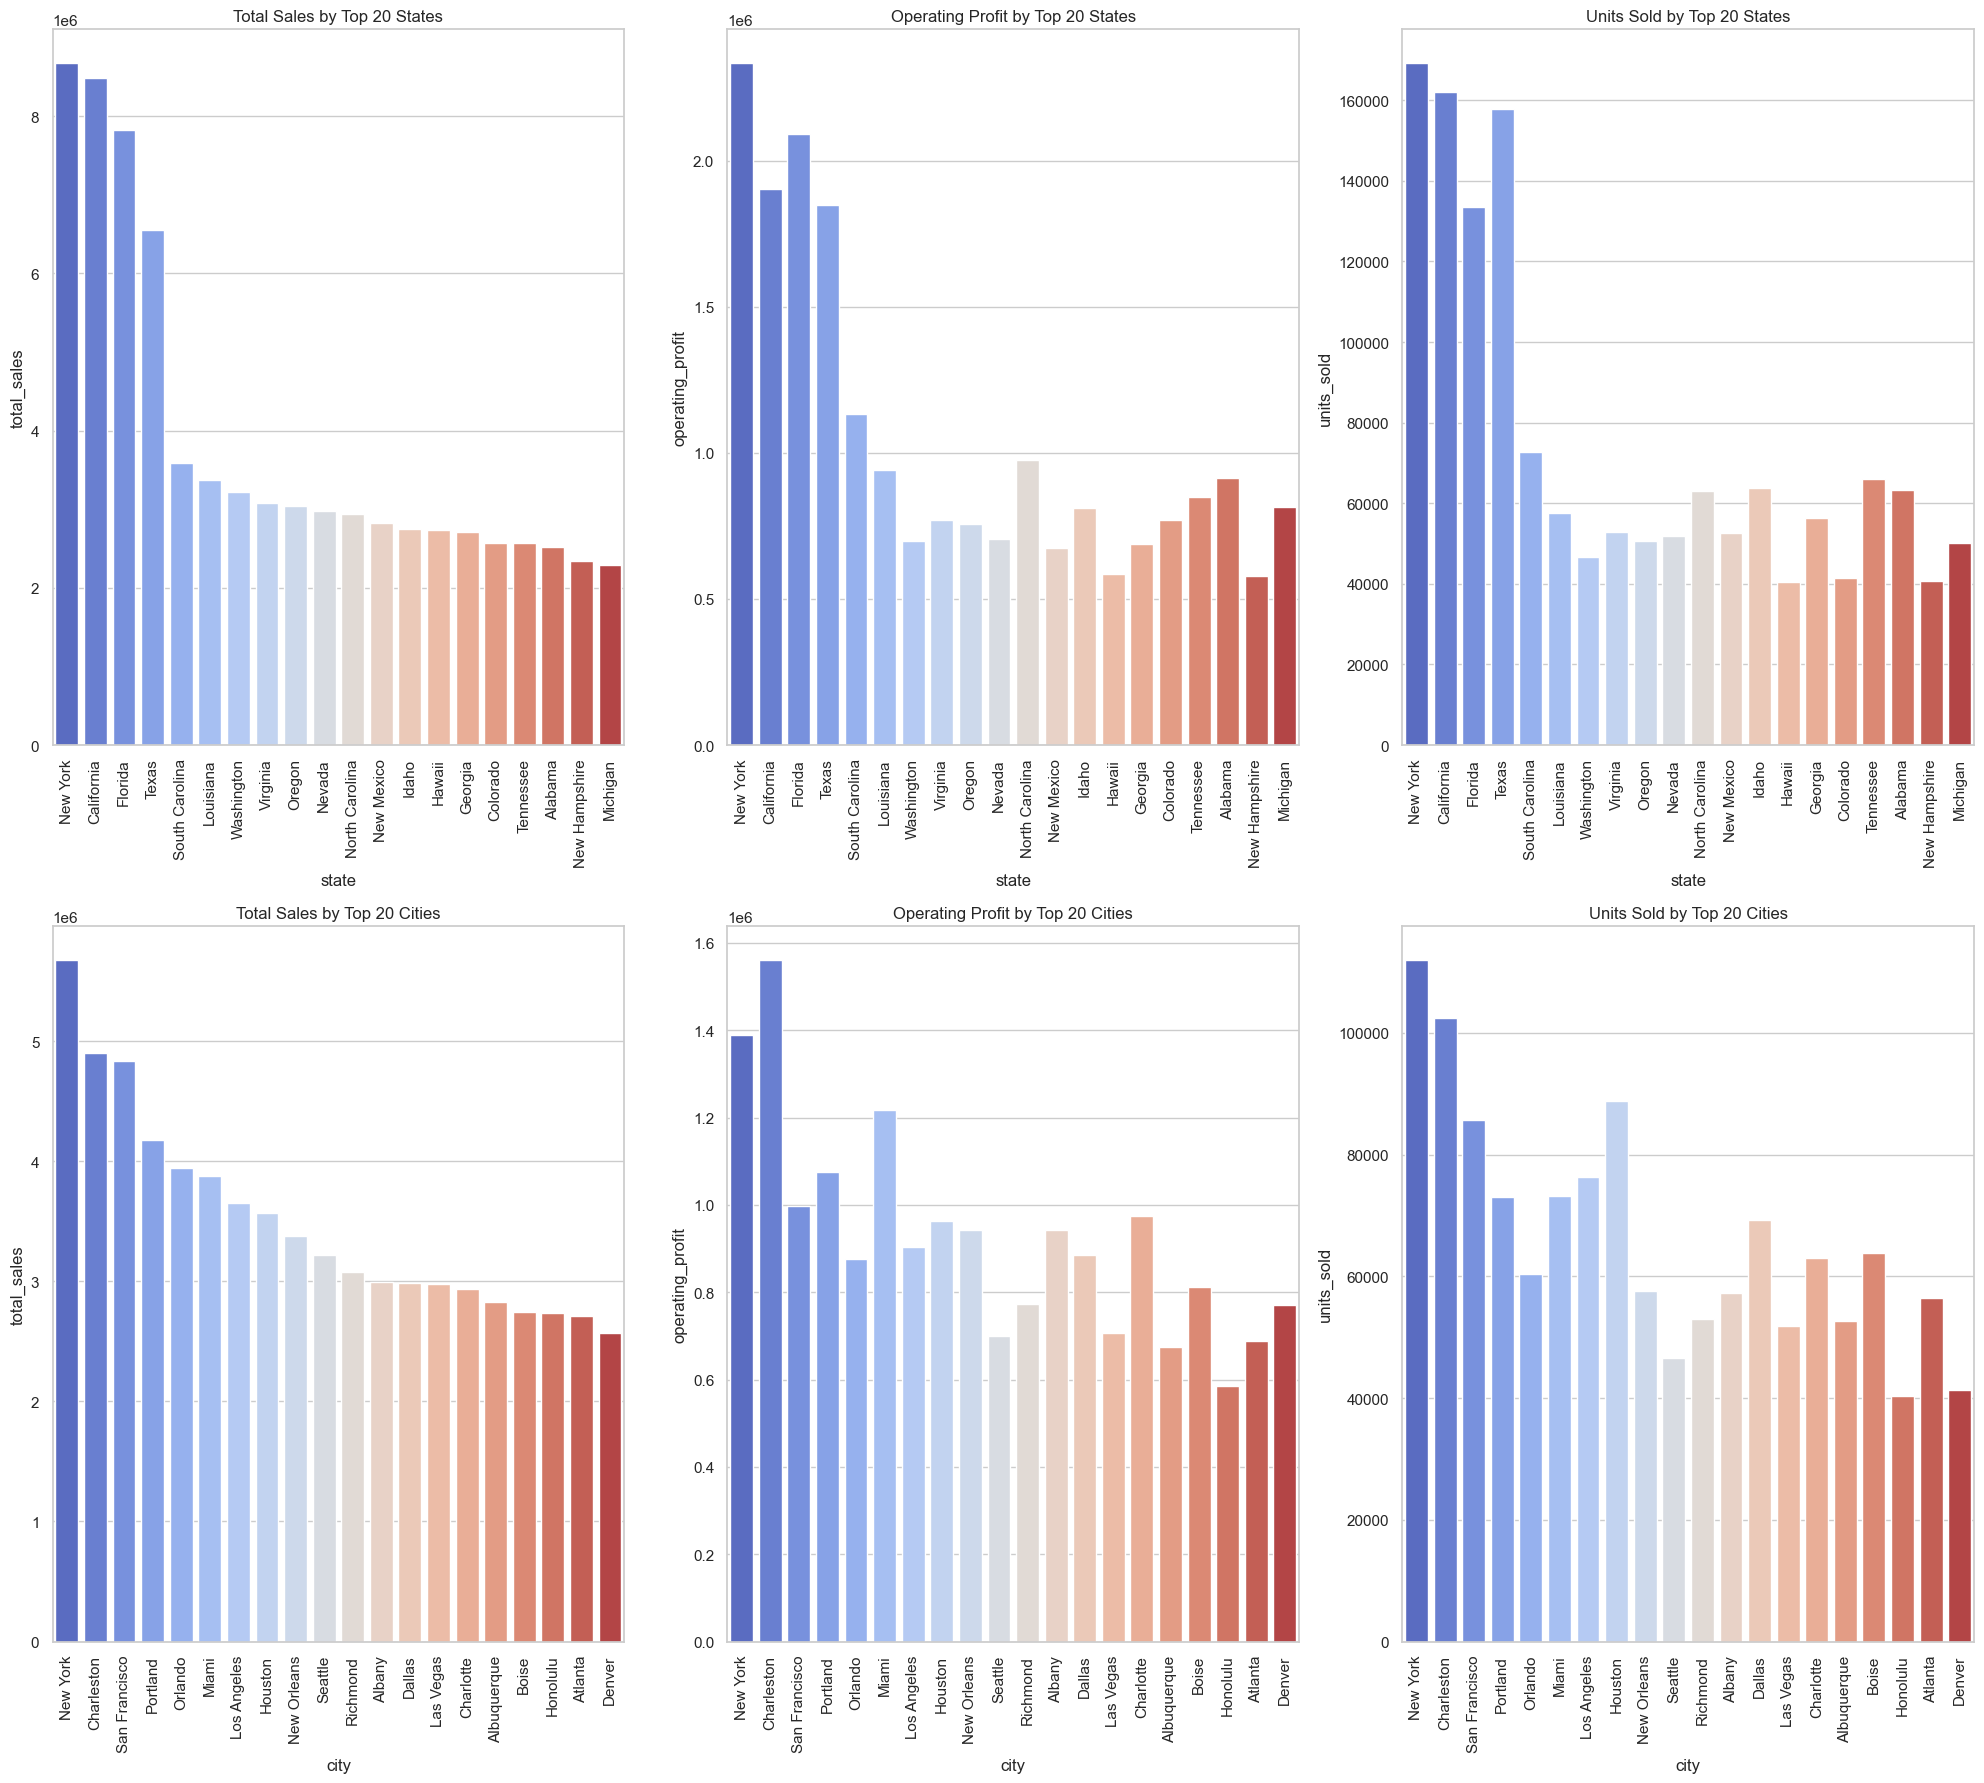

In [83]:
plt.figure(figsize = (20, 18))

# State - Total Sales Plot
plt.subplot(2, 3, 1)
bp1 = sns.barplot(data=state_sales, x='state', y="total_sales", palette='coolwarm')
bp1.set_title('Total Sales by Top 20 States')
plt.xticks(rotation = 90)

# State - Operating Profit Plot
plt.subplot(2, 3, 2)
bp2 = sns.barplot(data=state_sales, x='state', y="operating_profit", palette='coolwarm')
bp2.set_title('Operating Profit by Top 20 States')
plt.xticks(rotation = 90)

# State - Units Sold Plot
plt.subplot(2, 3, 3)
bp3 = sns.barplot(data=state_sales, x='state', y="units_sold", palette='coolwarm')
bp3.set_title('Units Sold by Top 20 States')
plt.xticks(rotation = 90)

# City - Total Sales Plot
plt.subplot(2, 3, 4)
bp4 = sns.barplot(data=city_sales, x='city', y="total_sales", palette='coolwarm')
bp4.set_title('Total Sales by Top 20 Cities')
plt.xticks(rotation = 90)

# City - Operating Profit Plot
plt.subplot(2, 3, 5)
bp5 = sns.barplot(data=city_sales, x='city', y="operating_profit", palette='coolwarm')
bp5.set_title('Operating Profit by Top 20 Cities')
plt.xticks(rotation = 90)

# City - Units Sold Plot
plt.subplot(2, 3, 6)
bp6 = sns.barplot(data=city_sales, x='city', y="units_sold", palette='coolwarm')
bp6.set_title('Units Sold by Top 20 Cities')
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

#### *Insight: New York, California and Florida emerge as the Top 3 States by Total Sales & Operating Profit while New York, California and Texas emerge as the Top 3 States by Units Sold. New York, Charleston and San Francisco emerge as the Top 3 Cities by Total Sales. Charleston, New York and Miami emerge as the Top 3 Cities by Operating Profit. New York, Charleston and Houston emerge as the Top 3 Cities by Units Sold.*

#### *Recommendation: Focus efforts on improving sales performance in Texas by understanding the local market dynamics and launching targeted marketing campaigns to boost overall sales and profitability.*

---

#### **15. Total Sales, Operating Profit & Units Sold by States - Choropleth Plot**

In [84]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [85]:
df['state_abbrev'] = df['state'].map(us_state_to_abbrev)            # Mapping State Abbreviations for Choropleth Plots

In [86]:
df.head()

retailer invoice_date     region           state           city  \
0    Foot Locker   2021-11-06  Southeast  South Carolina     Charleston   
1    Foot Locker   2020-03-14  Northeast        New York       New York   
2      West Gear   2021-01-19       West      California  San Francisco   
3        Walmart   2021-06-17  Southeast         Florida        Orlando   
4  Sports Direct   2021-09-14      South         Alabama     Birmingham   

                   product  price_per_unit  units_sold  total_sales  \
0    Men's Street Footwear              50         278        13900   
1            Men's Apparel              46         278        12788   
2  Men's Athletic Footwear              47         278        13066   
3          Women's Apparel             103         218        22454   
4  Women's Street Footwear              36         278        10008   

   operating_profit sales_method  year  month month_name  day  season  \
0               792       Online  2021     11        Nov    6  Autumn   
1               435       Outlet  2020      3        Mar   14  Spring   
2               287       Outlet  2021      1        Jan   19  Winter   
3              1257       Online  2021      6        Jun   17  Summer   
4               530       Outlet  2021      9        Sep   14  Autumn   

   operating_profit_pct state_abbrev  
0                   5.7           SC  
1                   3.4           NY  
2                   2.2           CA  
3                   5.6           FL  
4                   5.3           AL

In [87]:
state_stats= df.groupby(['state', 'state_abbrev'])[['total_sales', 'operating_profit', 'units_sold']].sum().sort_values('total_sales', ascending = False).reset_index()
state_stats

state state_abbrev  total_sales  operating_profit  units_sold
0         New York           NY      8670464           2333001      169140
1       California           CA      8488758           1902069      162034
2          Florida           FL      7820589           2092645      133430
3            Texas           TX      6553746           1848325      157950
4   South Carolina           SC      3593112           1132433       72610
5        Louisiana           LA      3377031            941727       57615
6       Washington           WA      3222093            699147       46611
7         Virginia           VA      3074415            771951       52969
8           Oregon           OR      3047049            757322       50536
9           Nevada           NV      2981134            706069       51831
10  North Carolina           NC      2936581            975646       62936
11      New Mexico           NM      2824641            673807       52633
12           Idaho           ID      2742753            812123       63827
13          Hawaii           HI      2734457            584990       40375
14         Georgia           GA      2708591            689336       56391
15        Colorado           CO      2569036            771362       41378
16       Tennessee           TN      2567190            849369       66077
17         Alabama           AL      2513424            914772       63327
18   New Hampshire           NH      2339267            578634       40812
19        Michigan           MI      2287283            813604       50095
20         Wyoming           WY      2282342            654408       50228
21            Ohio           OH      2269283            752886       47781
22         Arizona           AZ      2254096            534486       46919
23     Mississippi           MS      2218609            636913       56814
24         Vermont           VT      2041598            578602       38685
25         Montana           MT      1930761            623203       42713
26          Alaska           AK      1810428            449840       30815
27        Arkansas           AR      1802672            491575       48468
28     Connecticut           CT      1646448            415241       34696
29   Massachusetts           MA      1578435            335396       32895
30        Oklahoma           OK      1512059            410663       40459
31        Delaware           DE      1508537            452445       30275
32    Pennsylvania           PA      1478794            415676       27662
33            Utah           UT      1387620            387346       48548
34   West Virginia           WV      1311160            428298       29873
35        Kentucky           KY      1241148            393590       28664
36          Kansas           KS      1225314            351025       29463
37      New Jersey           NJ      1220446            365725       26540
38    Rhode Island           RI      1202256            304587       27473
39        Missouri           MO      1189515            390725       36404
40        Illinois           IL      1184063            384845       24957
41           Maine           ME      1129728            318774       22410
42         Indiana           IN      1084723            337932       26332
43    South Dakota           SD      1041101            294340       22973
44        Maryland           MD       951134            275771       20818
45    North Dakota           ND       950930            268858       22781
46       Wisconsin           WI       948894            280092       23950
47            Iowa           IA       909811            265526       23446
48       Minnesota           MN       903918            267032       20838
49        Nebraska           NE       728838            243952       19154

In [88]:
data1 = dict(type = 'choropleth',
            locations = state_stats['state_abbrev'],
            locationmode = 'USA-states',
            colorscale = 'Portland',
            text = state_stats['state'],
            z = state_stats['total_sales'],
            colorbar = {'title':'Sales in USD'})
layout1 = dict(title = 'Total Sales by State',
              geo = {'scope':'usa'})
choromap = go.Figure(data = [data1],layout = layout1)
iplot(choromap)

data2 = dict(type = 'choropleth',
            locations = state_stats['state_abbrev'],
            locationmode = 'USA-states',
            colorscale = 'Portland',
            text = state_stats['state'],
            z = state_stats['operating_profit'],
            colorbar = {'title':'Operating Profit in USD'})
layout2 = dict(title = 'Operating Profit by State',
              geo = {'scope':'usa'})
choromap = go.Figure(data = [data2],layout = layout2)
iplot(choromap)

data3 = dict(type = 'choropleth',
            locations = state_stats['state_abbrev'],
            locationmode = 'USA-states',
            colorscale = 'Portland',
            text = state_stats['state'],
            z = state_stats['units_sold'],
            colorbar = {'title':'Nbr. of Units Sold'})
layout3 = dict(title = 'Units Sold by State',
              geo = {'scope':'usa'})
choromap = go.Figure(data = [data3],layout = layout3)
iplot(choromap)

#### *Insight: New York, California, Florida and Texas emerge as the Top 4 States across all 3 metrics. Between the Top 4 States, Texas lags behind in Total Sales, California & Texas lag behind in Operating Profit and Florida lags behind in Units Sold.*

#### *Recommendation: Implement targeted regional strategies to address the specific underperformance in these states, such as customized pricing strategies, localized advertising, or new retail partnerships.*

---

#### **E. Distribution & Correlation Analysis:**

---

#### **15. Price per Unit Distribution by Products**

In [89]:
product_prices = df[['product', 'price_per_unit']]
product_prices

product  price_per_unit
0         Men's Street Footwear              50
1                 Men's Apparel              46
2       Men's Athletic Footwear              47
3               Women's Apparel             103
4       Women's Street Footwear              36
...                         ...             ...
9632              Men's Apparel              65
9633  Women's Athletic Footwear              65
9634              Men's Apparel              75
9635              Men's Apparel              65
9636              Men's Apparel              65

[9637 rows x 2 columns]

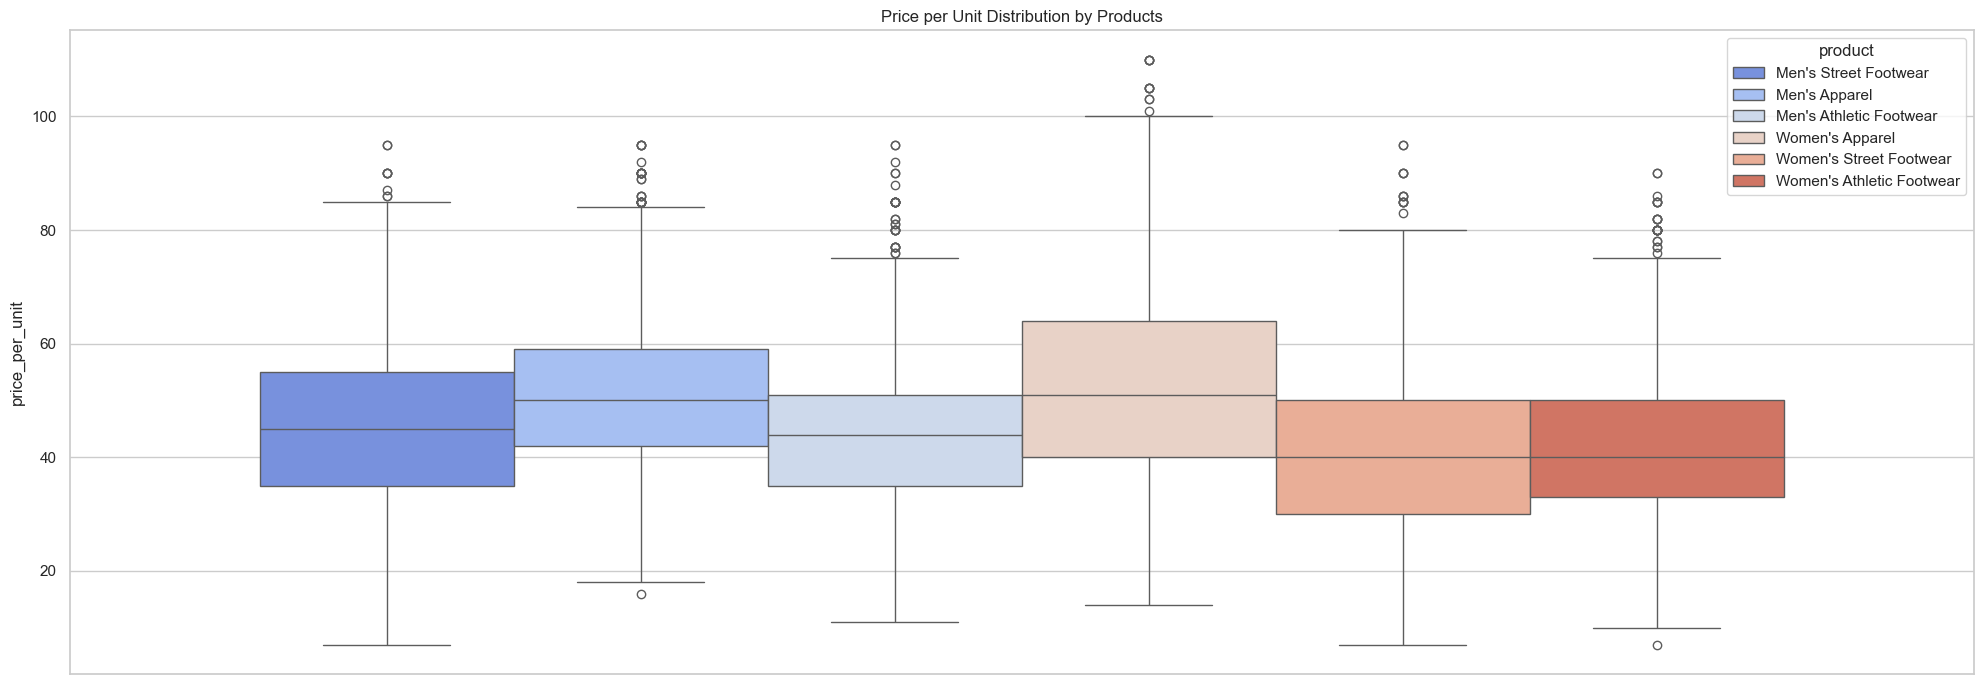

In [90]:
plt.figure(figsize = (20, 7))

bp = sns.boxplot(data=product_prices, y='price_per_unit', hue='product', palette='coolwarm')
bp.set_title('Price per Unit Distribution by Products')

plt.tight_layout()
plt.show()

#### *Insight: While Women's Apparel has the highest price per unit outliers, Women's Apparel & Men's Apparel emerge as the highest median price products with the cost of 51 USD and 50 USD per unit respectively.*

#### *Recommendation: Increase investment in premium pricing strategies for Women’s Apparel to maintain profitability, while also exploring opportunities to introduce higher-end product lines in other categories.*

---

#### **16. Operating Profit % Distribution by Products**

In [91]:
product_op_pct = df[['product', 'operating_profit_pct']]
product_op_pct

product  operating_profit_pct
0         Men's Street Footwear                  5.70
1                 Men's Apparel                  3.40
2       Men's Athletic Footwear                  2.20
3               Women's Apparel                  5.60
4       Women's Street Footwear                  5.30
...                         ...                   ...
9632              Men's Apparel                 25.01
9633  Women's Athletic Footwear                 25.01
9634              Men's Apparel                 25.00
9635              Men's Apparel                 30.00
9636              Men's Apparel                 30.00

[9637 rows x 2 columns]

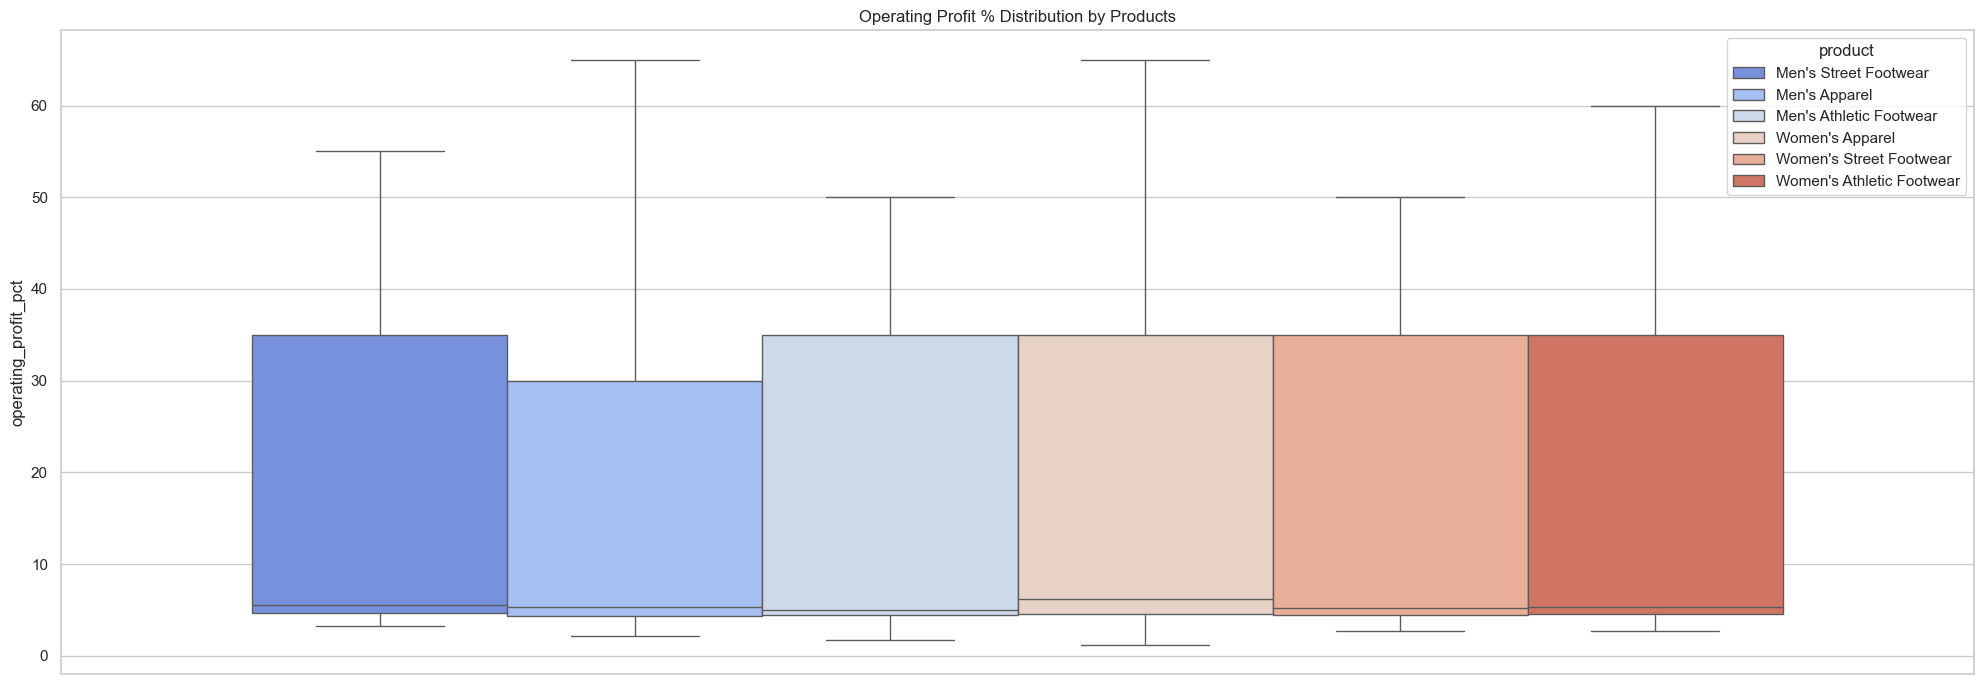

In [92]:
plt.figure(figsize = (20, 7))

bp = sns.boxplot(data=product_op_pct, y='operating_profit_pct', hue='product', palette='coolwarm')
bp.set_title('Operating Profit % Distribution by Products')

plt.tight_layout()
plt.show()

#### *Insight: Men's & Women's Apparel have the highest Operating Profit % outliers and Women's Apparel has the highest median Operating Profit % of roughly around 7 %.*

#### *Recommendation: Adidas should prioritize expanding its apparel lines, particularly Women's Apparel. Strategic investments in product development, targeted marketing, and optimized inventory for these categories can help capitalize on high profitability potential.*

---

#### **17. Key Sales Metrics Correlation**

In [93]:
sales_metrics = df[['total_sales', 'operating_profit', 'units_sold', 'price_per_unit']]
sales_metrics.corr()

total_sales  operating_profit  units_sold  price_per_unit
total_sales          1.000000          0.928685    0.919377        0.539156
operating_profit     0.928685          1.000000    0.892586        0.394311
units_sold           0.919377          0.892586    1.000000        0.265418
price_per_unit       0.539156          0.394311    0.265418        1.000000

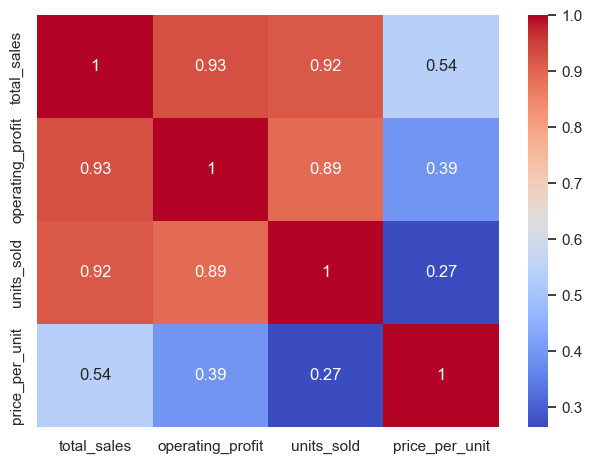

In [94]:
sns.heatmap(sales_metrics.corr(), cmap='coolwarm', annot=True)
plt.tight_layout()
plt.show()

#### *Insight: Total Sales and Operating Profit metrics show strongest correlation while Total Sales and Price per Unit metrics show weakest correlation.*

#### *Recommendation: Focus on driving sales volume through strategic pricing and promotional tactics to boost profitability, while exploring ways to optimize price per unit for better margin control.*

---

### V. Exporting Data:

In [95]:
df.to_csv('Adidas Report Data', index=False)         # Data Exported to create Adidas PBI Report

---